```
Trabalho para conclusão do Nanodegree em Data Science da Udacity.

Aluno: Ítalo dos Santos Barreto
```
[Clique aqui ](https://medium.com/@talobarreto/seu-professor-vai-continuar-na-escola-dc9fb146963e) para ler toda a jornada de desenvolvimento.


# Montagem do Dataset


## Introdução
Em um problema real dificilmente iremos encontrar um dataset pronto, portanto resolvi esse parâmetro para o trabalho de conclusão de curso.

Visando criar a base de estudo:
 - criei o arquivo raw_data/inep_files.py para baixar e descompactar os arquivos do InepData.
 - criei o código abaixo para analisar o conteúdo dos arquivos baixados e criar o arquivo model_vars.csv.
 


In [99]:
#importacoes de bibliotecas
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import os
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy import stats
from sklearn import metrics
from tqdm import tqdm
from IPython.core.display import display, HTML
import folium
from sklearn import cluster 
from sklearn.preprocessing import MinMaxScaler

#Arquivos criados para deixar o codigo do notebook mais clean.
import modelagem
from raw_data import constantes as CONST
from vo.Docentes import DocentesVO
from vo.Professores import ProfessoresVO
from vo.Alunos import AlunosVO
from vo.Turmas import TurmasVO
from educ_utils import Visualizacao
from educ_utils import df_inep_utils as DIU

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#Configuracao para mostrar duas casas decimais.
pd.options.display.float_format = '{:.2f}'.format
anos_psq = [2007,2009,2011,2013,2014,2015,2017]


Os arquivos analisados foram:
 - DOCENTES.CSV
 - ESCOLAS.CSV
 - MATRICULAS.CSV
 - TURMAS.CSV


In [4]:
#Tratamento de DOCENTES.csv que é o principal arquivo do estudo.
docentes = DocentesVO(CONST.SG_CENTRO_OESTE)
dfs = docentes.get_dict_docentes()

## Professores
    Professores que dão aula em escolas da rede estadual/distrital, localizadas no DF,  concursados, estáveis, que estão há mais de um ano na SEDF e que também estavam no Censo de 2017.

In [6]:
professores = ProfessoresVO()

In [7]:
#Cria o DataFrame de professores
prof_pbc_df15 = professores.get_df_prof_15(dfs)

In [8]:
#mostra o que foi importado.
display(prof_pbc_df15.shape)
prof_pbc_df15.head()

(9908, 54)

NU_IDADE_REFERENCIA         ...           NU_QTD_ESCOLAS_2015
CO_PESSOA_FISICA                              ...                              
115161698917                       41         ...                             2
115111512003                       54         ...                             1
115075856674                       41         ...                             1
115075569420                       47         ...                             1
115076358503                       41         ...                             1

[5 rows x 54 columns]

'0.0% de registros nulos'

'Variância: 57.08771032654555'

count   9908.00
mean      42.79
std        7.56
min       24.00
25%       37.00
50%       43.00
75%       47.00
max       69.00
Name: NU_IDADE_REFERENCIA, dtype: float64

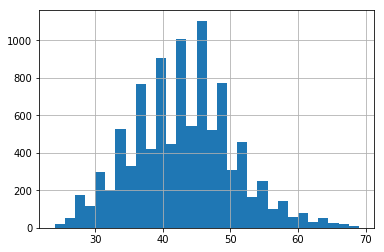

'0.0% de registros nulos'

'Variância: 0.009893085631781297'

qtd   pc
0  9809 0.99
1    99 0.01

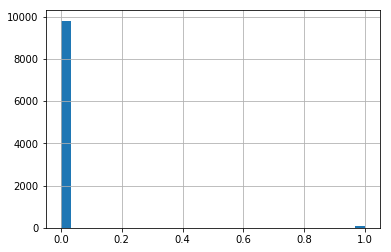

'0.0% de registros nulos'

'Variância: 0.0005044937133789062'

qtd   pc
0.00  9903 1.00
1.00     5 0.00

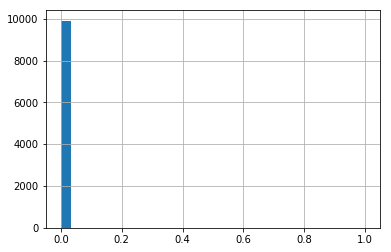

'0.0% de registros nulos'

'Variância: 0.0020160675048828125'

qtd   pc
0.00  9888 1.00
1.00    20 0.00

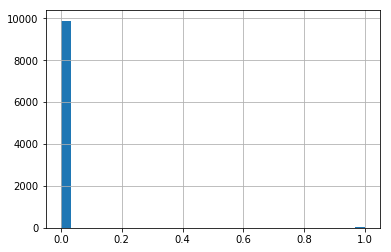

'0.0% de registros nulos'

'Variância: 0.0004036426544189453'

qtd   pc
0.00  9904 1.00
1.00     4 0.00

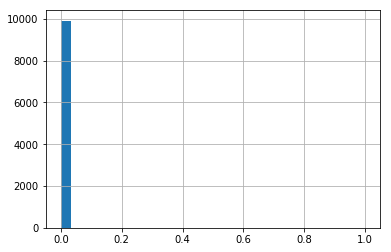

'0.0% de registros nulos'

'Variância: 0.0012102127075195312'

qtd   pc
0.00  9896 1.00
1.00    12 0.00

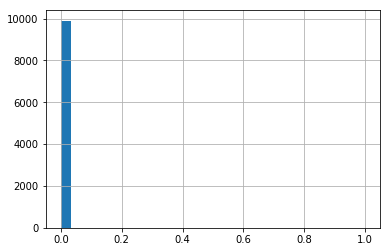

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  9908 1.00

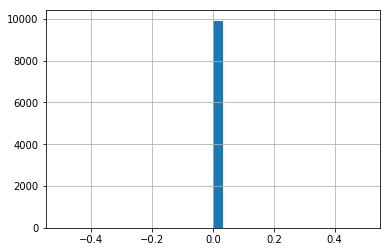

'0.0% de registros nulos'

'Variância: 0.006023406982421875'

qtd   pc
0.00  9848 0.99
1.00    60 0.01

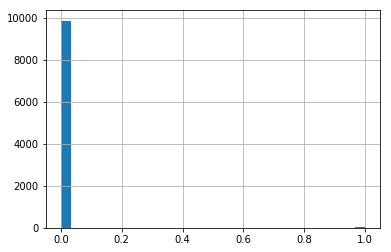

'0.0% de registros nulos'

'Variância: 0.0'

qtd   pc
0.00  9908 1.00

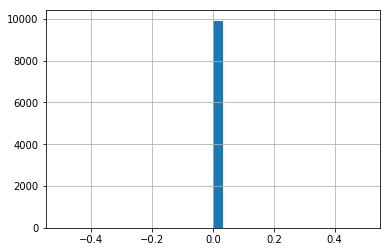

'0.0% de registros nulos'

'Variância: 0.00020182132720947266'

qtd   pc
0.00  9906 1.00
1.00     2 0.00

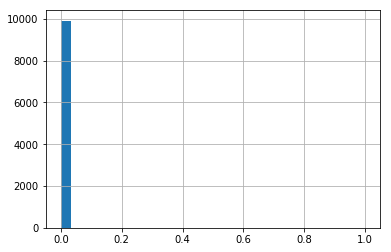

'0.0% de registros nulos'

'Variância: 0.021713440853795767'

qtd   pc
4  9688 0.98
3   220 0.02

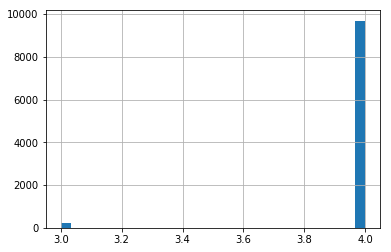

'0.0% de registros nulos'

'Variância: 0.2479248046875'

qtd   pc
1.00  5409 0.55
0.00  4499 0.45

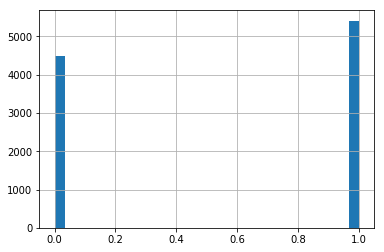

'0.0% de registros nulos'

'Variância: 0.0293731689453125'

qtd   pc
0.00  9608 0.97
1.00   300 0.03

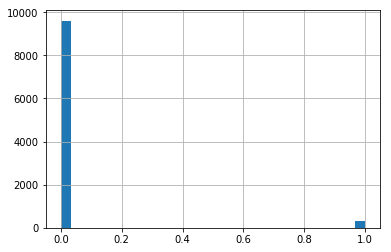

'0.0% de registros nulos'

'Variância: 0.002216339111328125'

qtd   pc
0.00  9886 1.00
1.00    22 0.00

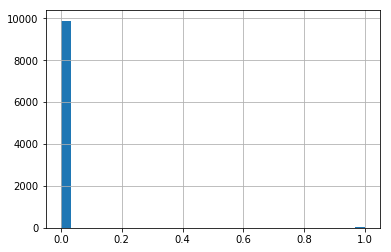

'0.0% de registros nulos'

'Variância: 0.2418212890625'

qtd   pc
0.00  5851 0.59
1.00  4057 0.41

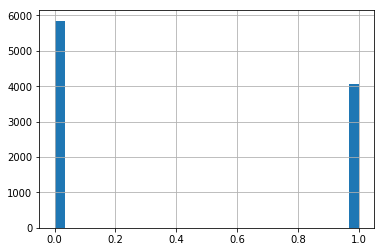

'0.0% de registros nulos'

'Variância: 0.01813061512437082'

qtd   pc
1  9725 0.98
0   183 0.02

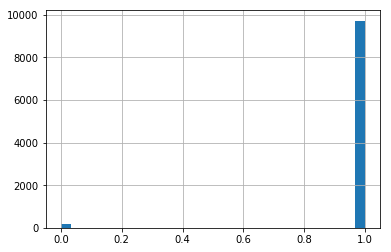

'0.0% de registros nulos'

'Variância: 0.25001544439997664'

qtd   pc
1  4985 0.50
0  4923 0.50

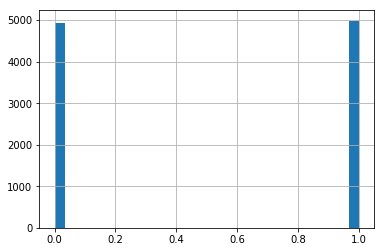

'0.0% de registros nulos'

'Variância: 0.19918141420091792'

qtd   pc
1  7188 0.73
0  2720 0.27

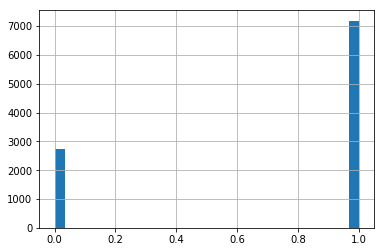

'0.0% de registros nulos'

'Variância: 0.19163770094580443'

qtd   pc
1  7348 0.74
0  2560 0.26

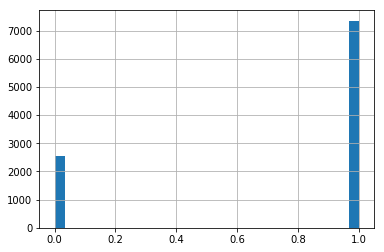

'0.0% de registros nulos'

'Variância: 0.05890489057316615'

qtd   pc
1  9362 0.94
2   313 0.03
0   220 0.02
3    13 0.00

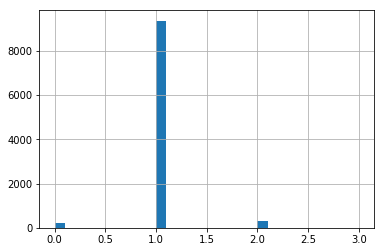

'0.0% de registros nulos'

'Variância: 0.2707247140025165'

qtd   pc
1  5233 0.53
0  4568 0.46
2   103 0.01
3     4 0.00

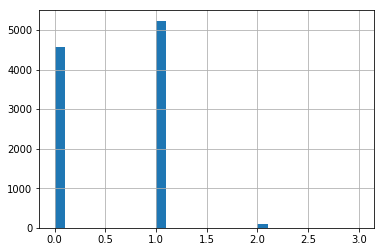

'0.0% de registros nulos'

'Variância: 0.27523909377802985'

qtd   pc
0  5398 0.54
1  4388 0.44
2   118 0.01
3     4 0.00

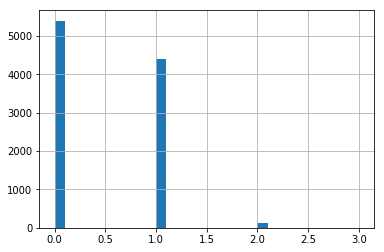

'0.0% de registros nulos'

'Variância: 0.1427312255897489'

qtd   pc
1  8355 0.84
0  1390 0.14
2   159 0.02
3     4 0.00

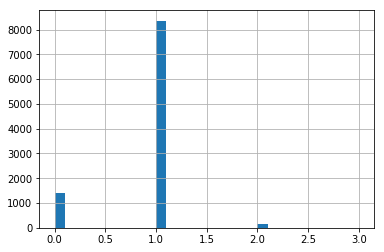

'0.0% de registros nulos'

'Variância: 0.10729689218329577'

qtd   pc
0  8737 0.88
1  1160 0.12
2    11 0.00

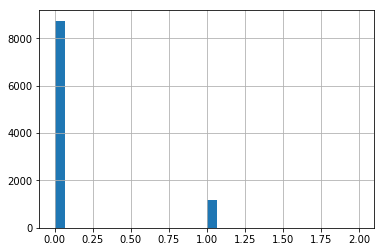

'0.0% de registros nulos'

'Variância: 5.7710933726441525'

qtd   pc
2007  5935 0.60
2009  1660 0.17
2013  1148 0.12
2011   617 0.06
2014   548 0.06

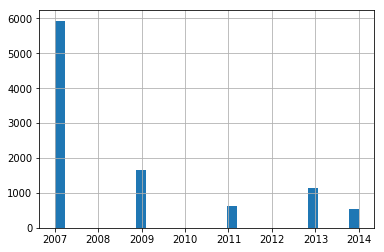

'0.0% de registros nulos'

'Variância: 0.10381028832575735'

qtd   pc
1  8852 0.89
0   843 0.09
2   209 0.02
3     4 0.00

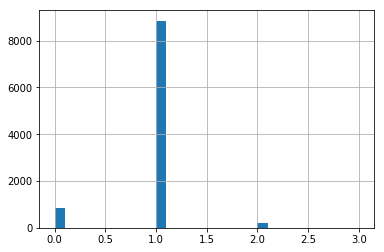

'0.0% de registros nulos'

'Variância: 0.031742225303314366'

qtd   pc
0  9586 0.97
1   321 0.03
2     1 0.00

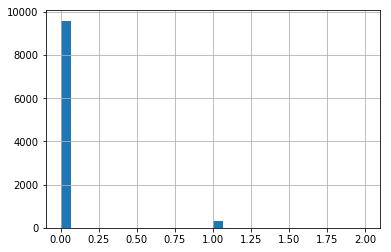

'0.0% de registros nulos'

'Variância: 0.012463213089646511'

qtd   pc
0  9786 0.99
1   121 0.01
2     1 0.00

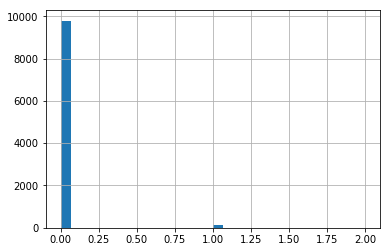

'0.0% de registros nulos'

'Variância: 0.015993582872184876'

qtd   pc
0  9750 0.98
1   157 0.02
2     1 0.00

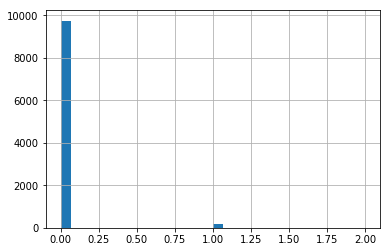

'0.0% de registros nulos'

'Variância: 0.0026175201680839724'

qtd   pc
0  9882 1.00
1    26 0.00

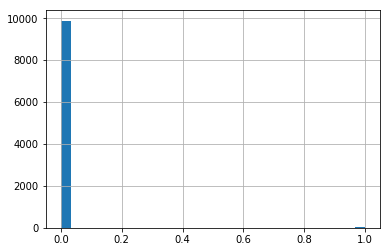

'0.0% de registros nulos'

'Variância: 0.0003027245021819595'

qtd   pc
0  9905 1.00
1     3 0.00

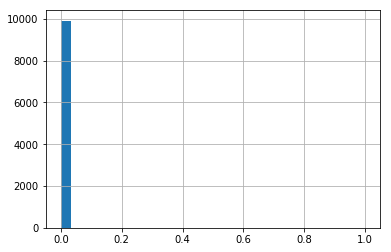

'0.0% de registros nulos'

'Variância: 0.004821586821224225'

qtd   pc
0  9860 1.00
1    48 0.00

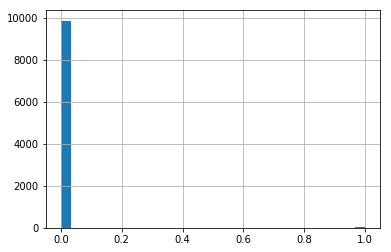

'0.0% de registros nulos'

'Variância: 0.00020183670998583138'

qtd   pc
0  9906 1.00
1     2 0.00

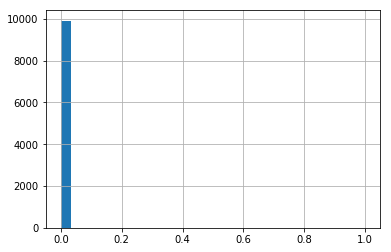

'0.0% de registros nulos'

'Variância: 0.012064429717160874'

qtd   pc
0  9787 0.99
1   121 0.01

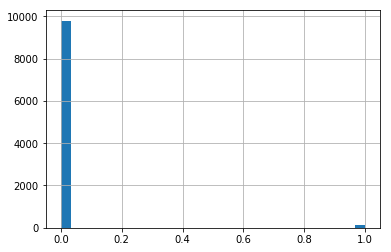

'0.0% de registros nulos'

'Variância: 0.2275592868338446'

qtd   pc
0  6439 0.65
1  3469 0.35

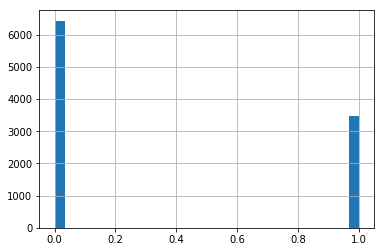

'0.0% de registros nulos'

'Variância: 0.21172270504875812'

qtd   pc
0  6893 0.70
1  3015 0.30

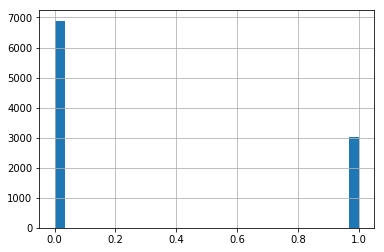

'0.0% de registros nulos'

'Variância: 0.042716551372251235'

qtd   pc
0  9465 0.96
1   443 0.04

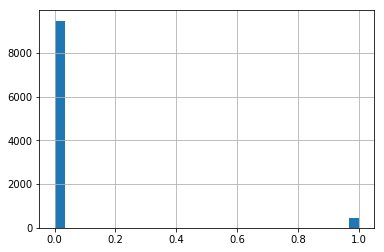

'0.0% de registros nulos'

'Variância: 0.2078775486469055'

qtd   pc
0  6988 0.71
1  2920 0.29

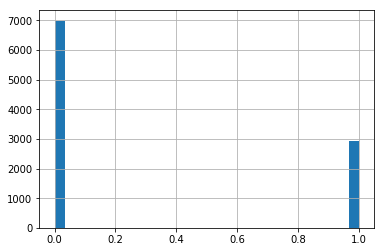

'0.0% de registros nulos'

'Variância: 0.0051213772949145675'

qtd   pc
0  9857 0.99
1    51 0.01

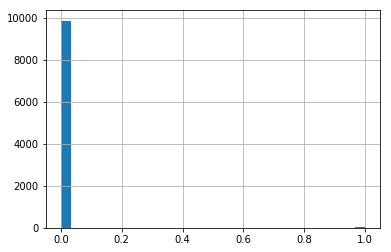

'0.0% de registros nulos'

'Variância: 0.0010083685420148186'

qtd   pc
0  9898 1.00
1    10 0.00

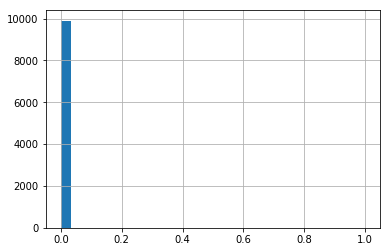

'99.37424303593056% de registros nulos'

'Variância: 0.061343204653622405'

qtd   pc
0.00   58 0.01
1.00    4 0.00

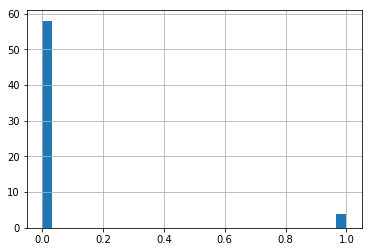

'99.37424303593056% de registros nulos'

'Variância: 7.450290851401375'

qtd   pc
0.00    58 0.01
15.00    1 0.00
14.00    1 0.00
3.00     1 0.00
7.00     1 0.00

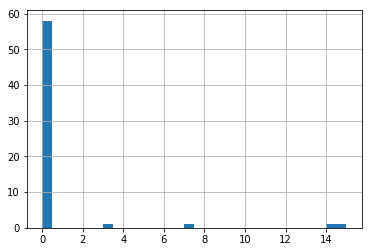

'99.37424303593056% de registros nulos'

'Variância: 0.03172924378635645'

qtd   pc
0.00   60 0.01
1.00    2 0.00

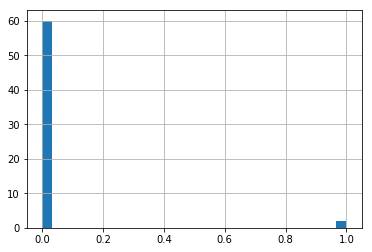

'99.37424303593056% de registros nulos'

'Variância: 10.376520359598091'

qtd   pc
0.00    53 0.01
15.00    1 0.00
8.00     1 0.00
14.00    1 0.00
10.00    1 0.00
1.00     1 0.00
4.00     1 0.00
5.00     1 0.00
6.00     1 0.00
7.00     1 0.00

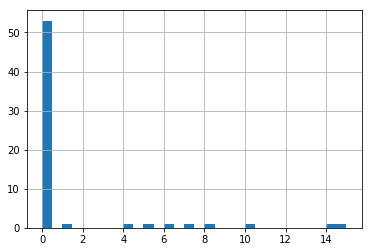

'99.37424303593056% de registros nulos'

'Variância: 0.04680063458487575'

qtd   pc
0.00   59 0.01
1.00    3 0.00

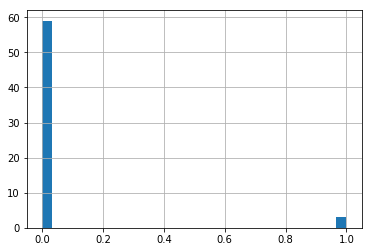

'99.37424303593056% de registros nulos'

'Variância: 29.85959809624534'

qtd   pc
0.00    54 0.01
5.00     2 0.00
30.00    1 0.00
8.00     1 0.00
12.00    1 0.00
4.00     1 0.00
28.00    1 0.00
3.00     1 0.00

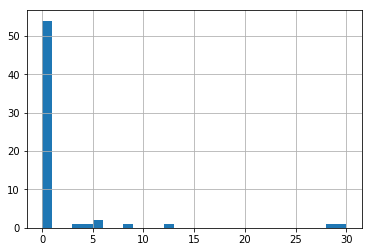

'99.37424303593056% de registros nulos'

'Variância: 0.03172924378635642'

qtd   pc
0.00   60 0.01
1.00    2 0.00

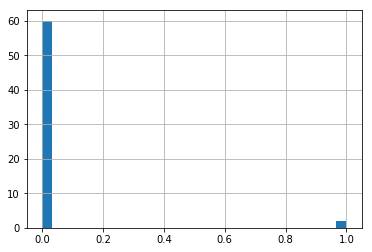

'99.37424303593056% de registros nulos'

'Variância: 20.933897408778453'

qtd   pc
0.00    55 0.01
3.00     3 0.00
22.00    1 0.00
6.00     1 0.00
5.00     1 0.00
28.00    1 0.00

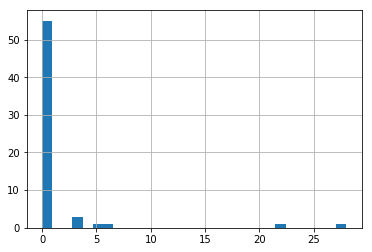

'99.37424303593056% de registros nulos'

'Variância: 0.031729243786356436'

qtd   pc
0.00   60 0.01
1.00    2 0.00

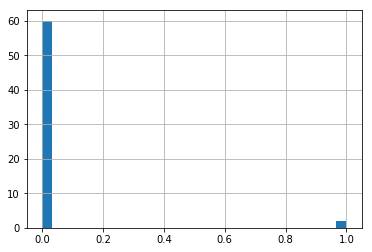

'99.37424303593056% de registros nulos'

'Variância: 17.314912744579587'

qtd   pc
0.00    55 0.01
7.00     2 0.00
3.00     2 0.00
13.00    1 0.00
28.00    1 0.00
8.00     1 0.00

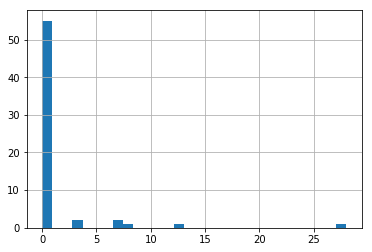

'99.37424303593056% de registros nulos'

'Variância: 0.01612903225806452'

qtd   pc
0.00   61 0.01
1.00    1 0.00

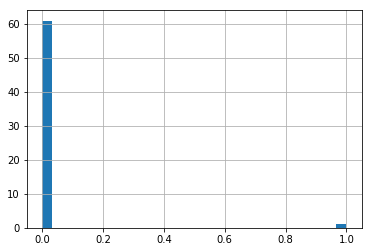

'99.37424303593056% de registros nulos'

'Variância: 9.853252247488111'

qtd   pc
0.00    56 0.01
8.00     2 0.00
21.00    1 0.00
3.00     1 0.00
4.00     1 0.00
7.00     1 0.00

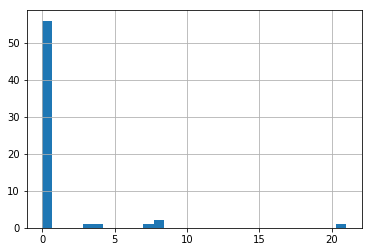

'0.0% de registros nulos'

'Variância: 0.7776573546985432'

qtd   pc
2  4006 0.40
1  3623 0.37
0  1117 0.11
3   990 0.10
4   172 0.02

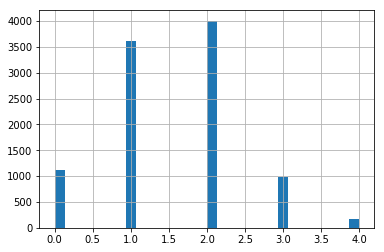

'0.0% de registros nulos'

'Variância: 0.06995737590109899'

qtd   pc
1  9185 0.93
2   715 0.07
3     8 0.00

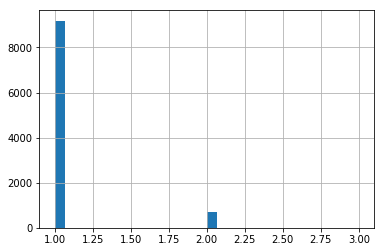

In [9]:
#mostra a distribuicao de todas as colunas do DataFrame
Visualizacao.explora_df(prof_pbc_df15)

In [10]:
#inicia o feature selection com a variancia e nulos
VARIANCIA_MINIMA = 0.05
PC_MAX_MODA = 0.9
PC_MAX_MODA_NU = 0.6
MAXIMO_DE_NULOS  = 0.05
prof = prof_pbc_df15.copy()
qtd_ttl = prof_pbc_df15.shape[0]
cd = []
for c in prof_pbc_df15.columns:
    s = prof_pbc_df15[c]
    pc_nulos = s.isnull().sum() / qtd_ttl * 100
    pc_moda = prof_pbc_df15.loc[s == s.mode()[0]].shape[0]/qtd_ttl
    if pc_moda > PC_MAX_MODA or (c.startswith('NU') and pc_moda > PC_MAX_MODA_NU) or pc_nulos > MAXIMO_DE_NULOS:
        #display(f'{c} - {pc_moda}')
        cd.append(c)
display(f'Serao apagadas {len(cd)} de {len(prof.columns)} colunas.')    
prof.drop(cd,axis=1,inplace=True)
display(' '.join(prof.columns))
display(prof.var())
display(prof.head())

'Serao apagadas 41 de 54 colunas.'

'NU_IDADE_REFERENCIA IN_ESPECIALIZACAO IN_POS_NENHUM IN_NASCEU_DF IN_MORA_DF IN_MULHER NU_QTD_GRAD_PBC NU_QTD_GRAD_PRIV NU_ANO_PRIM_CENSO TP_COR_RACA_0 TP_COR_RACA_1 TP_COR_RACA_3 CLSC_QTL_NU_IDADE_REFERENCIA'

NU_IDADE_REFERENCIA            57.09
IN_ESPECIALIZACAO               0.25
IN_POS_NENHUM                   0.24
IN_NASCEU_DF                    0.25
IN_MORA_DF                      0.20
IN_MULHER                       0.19
NU_QTD_GRAD_PBC                 0.27
NU_QTD_GRAD_PRIV                0.28
NU_ANO_PRIM_CENSO               5.77
TP_COR_RACA_0                   0.23
TP_COR_RACA_1                   0.21
TP_COR_RACA_3                   0.21
CLSC_QTL_NU_IDADE_REFERENCIA    0.78
dtype: float64

...
CO_PESSOA_FISICA ...
115161698917     ...
115111512003     ...
115075856674     ...
115075569420     ...
115076358503     ...

[5 rows x 13 columns]

In [11]:
#apaga colunas que nao ficaram boas para o modelo
prof.drop(['CLSC_QTL_NU_IDADE_REFERENCIA','IN_POS_NENHUM'],axis=1,inplace=True)

### Os professores tem características comuns ?

São muitos professores, portanto devem haver grupos de professores com características semelhantes.

Aqui começa o trabalho para agrupá-los.


In [12]:
#faz uma copia para poder testar varias vezes
p_km = prof.copy()

In [13]:
#agrupa os professores em 9 classes
km = kmeans_professores(p_km,8)
display(pd.Series(km.labels_).value_counts())
prof['rotulos'] = pd.Categorical(km.labels_);


5    1536
0    1508
1    1479
7    1123
4    1112
3    1094
6    1070
2     986
dtype: int64

Base de TREINO
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1118
          1       1.00      1.00      1.00      1108
          2       1.00      1.00      1.00       740
          3       1.00      1.00      1.00       813
          4       1.00      1.00      1.00       853
          5       1.00      1.00      1.00      1163
          6       1.00      1.00      1.00       801
          7       1.00      1.00      1.00       835

avg / total       1.00      1.00      1.00      7431

Base de TESTE
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       390
          1       1.00      1.00      1.00       371
          2       1.00      1.00      1.00       246
          3       1.00      1.00      1.00       281
          4       1.00      1.00      1.00       259
          5       1.00      1.00      1.00       373
          6       1.00      1.00      1.00       269
          7  

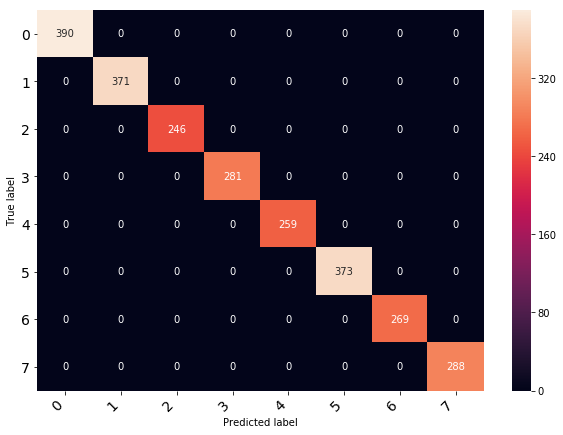

Nao foi possivel mostrar a ROC.
Feature ranking:
1. feature IN_NASCEU_DF (0.300724)
2. feature IN_ESPECIALIZACAO (0.256222)
3. feature TP_COR_RACA_1 (0.153333)
4. feature TP_COR_RACA_0 (0.133762)
5. feature TP_COR_RACA_3 (0.110084)
6. feature NU_IDADE_REFERENCIA (0.029686)
7. feature NU_ANO_PRIM_CENSO (0.004820)
8. feature NU_QTD_GRAD_PRIV (0.003305)
9. feature NU_QTD_GRAD_PBC (0.003234)
10. feature IN_MULHER (0.002784)
11. feature IN_MORA_DF (0.002045)
Nao foi possivel mostrar o feature importance.
The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


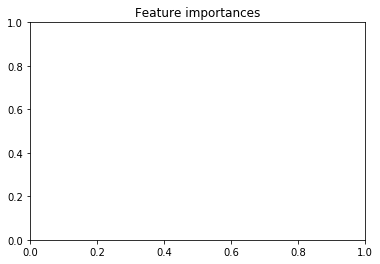

In [14]:
#faz um Random Forest com todas as features
ft, rf = processa_tudo(prof,False,'rotulos',vai_escalar=True);

In [16]:
#6 features ficaram acima de 1% de importancia
QTD_FEATURES_IMPORTANTES = 6

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


Base de TREINO
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1118
          1       1.00      1.00      1.00      1108
          2       1.00      1.00      1.00       740
          3       1.00      1.00      1.00       813
          4       1.00      1.00      1.00       853
          5       1.00      1.00      1.00      1163
          6       1.00      1.00      1.00       801
          7       1.00      1.00      1.00       835

avg / total       1.00      1.00      1.00      7431

Base de TESTE
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       390
          1       1.00      1.00      1.00       371
          2       1.00      1.00      1.00       246
          3       1.00      1.00      1.00       281
          4       1.00      1.00      1.00       259
          5       1.00      1.00      1.00       373
          6       1.00      1.00      1.00       269
          7  

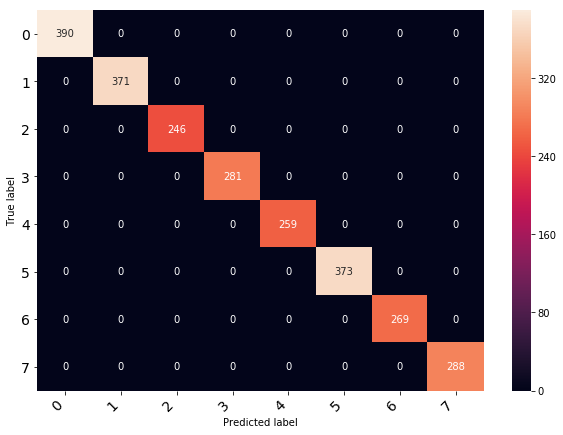

Nao foi possivel mostrar a ROC.
Feature ranking:
1. feature IN_NASCEU_DF (0.313497)
2. feature IN_ESPECIALIZACAO (0.250116)
3. feature TP_COR_RACA_1 (0.156198)
4. feature TP_COR_RACA_3 (0.147500)
5. feature TP_COR_RACA_0 (0.108707)
6. feature NU_IDADE_REFERENCIA (0.023982)
Nao foi possivel mostrar o feature importance.
The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


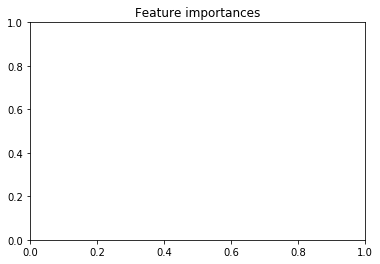

In [17]:
#Roda com o número de features importantes
processa_tudo(prof[ft[:QTD_FEATURES_IMPORTANTES]+['rotulos']],False,'rotulos');

In [18]:
prof = prof[ft[:QTD_FEATURES_IMPORTANTES]+['rotulos']]

In [19]:
prof.head()

IN_NASCEU_DF   ...     rotulos
CO_PESSOA_FISICA                 ...            
115161698917                 1   ...           6
115111512003                 0   ...           2
115075856674                 0   ...           0
115075569420                 0   ...           0
115076358503                 1   ...           1

[5 rows x 7 columns]

rotulos
0   0.47
1   1.00
2   0.00
3   0.00
4   0.55
5   0.00
6   1.00
7   1.00
Name: IN_NASCEU_DF, dtype: float64

4985

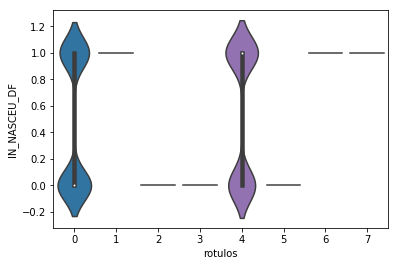

rotulos
0   1.00
1   0.56
2   1.00
3   0.00
4   0.00
5   0.62
6   0.00
7   1.00
Name: IN_ESPECIALIZACAO, dtype: float16

5410.0

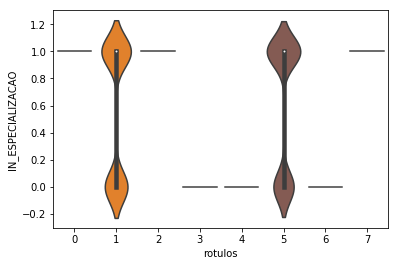

rotulos
0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
Name: TP_COR_RACA_1, dtype: int8

3015

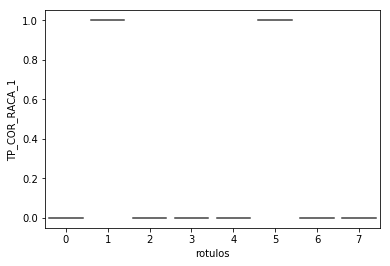

rotulos
0   1.00
1   0.00
2   0.00
3   0.91
4   0.00
5   0.00
6   0.90
7   0.00
Name: TP_COR_RACA_0, dtype: float64

3469

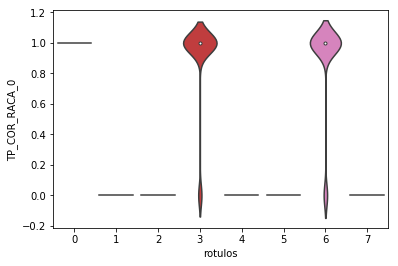

rotulos
0   0.00
1   0.00
2   0.86
3   0.00
4   1.00
5   0.00
6   0.00
7   0.85
Name: TP_COR_RACA_3, dtype: float64

2920

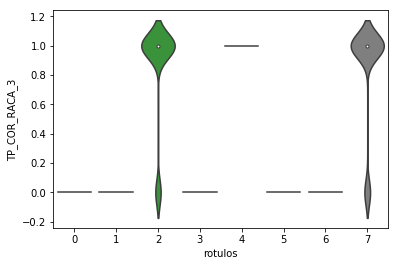

count  mean  std   min   25%   50%   75%   max
rotulos                                                 
0       1508.00 43.80 7.09 26.00 39.00 44.00 48.00 69.00
1       1479.00 39.93 6.43 25.00 35.00 40.00 45.00 69.00
2        986.00 44.89 7.17 26.00 40.00 45.00 50.00 68.00
3       1094.00 46.01 7.89 24.00 41.00 46.00 51.00 68.00
4       1112.00 41.26 7.93 25.00 35.00 42.00 47.00 68.00
5       1536.00 45.51 7.96 25.00 40.00 46.00 50.00 69.00
6       1070.00 40.22 6.60 24.00 35.00 40.00 45.00 67.00
7       1123.00 40.50 5.97 25.00 36.00 40.00 45.00 65.00

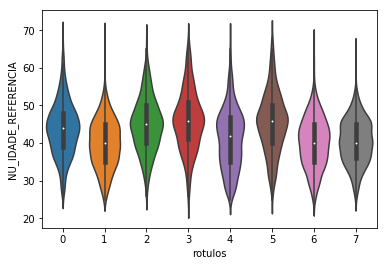

In [20]:
#percorre as variaveis mostrando a distribuicao de acordo com a classe.
import seaborn as sns
for c in prof.columns[:-1]:
    display(HTML(f'<h2>{c}</h2>'))
    if prof[c].dtype == bool:
        prof[c] = prof[c].astype(np.int8)
    sns.violinplot(y=c,x='rotulos',data=prof)
    if c.startswith('NU'):
        display(prof.groupby('rotulos')[c].describe())
    elif c.startswith('CLSC'):
        sns.heatmap(prof.pivot_table(index=c,columns='rotulos',values='IN_ESPECIALIZACAO',aggfunc='count'), annot=True, fmt="d",cmap='RdYlGn')
        plt.show()
    else:
        display(prof.groupby('rotulos')[c].mean())
        display(prof[c].sum())
        
    plt.show()

<h3>Classes encontradas no agrupamento:</h3>
<ul>
<li><strong>Classe 0 - 1.508 professores :</strong>
<ul>
<li>Segundo maior grupo</li>
<li>47% nasceu no DF</li>
<li>Possui especializa&ccedil;&atilde;o</li>
<li>Ra&ccedil;a/cor n&atilde;o declarada</li>
</ul>
</li>
<li><strong>Classe 1 - 1.479 professores:</strong>
<ul>
<li>Nasceu no DF</li>
<li>56% possui especializa&ccedil;&atilde;o</li>
<li>Ra&ccedil;a/cor branca</li>
<li>Grupo mais jovem</li>
</ul>
</li>
<li><strong>Classe 2 - 986 professores:</strong>
<ul>
<li>Menor grupo</li>
<li>N&atilde;o nasceu no DF</li>
<li>Possui especializa&ccedil;&atilde;o</li>
<li>86% Ra&ccedil;a/cor parda</li>
</ul>
</li>
<li><strong>Classe 3 - 1.094 professores:</strong>
<ul>
<li>N&atilde;o nasceu no DF</li>
<li>N&atilde;o possui especializa&ccedil;&atilde;o</li>
<li>91% Ra&ccedil;a/cor n&atilde;o declarada</li>
<li>Grupo mais velho</li>
<li></li>
</ul>
</li>
<li><strong>Classe 4 - 1.112 professores:</strong>
<ul>
<li>55% nasceu no DF</li>
<li>N&atilde;o possui especializa&ccedil;&atilde;o</li>
<li>Ra&ccedil;a/cor parda</li>
<li></li>
</ul>
</li>
<li><strong>Classe 5 - 1.536 professores:</strong>
<ul>
<li>Maior grupo</li>
<li>N&atilde;o nasceu no DF</li>
<li>62% possui especializa&ccedil;&atilde;o</li>
<li>Ra&ccedil;a/cor branca</li>
<li>Segundo grupo mais velho</li>
<li></li>
</ul>
</li>
<li><strong>Classe 6 - 1.070 professores:</strong>
<ul>
<li>Segundo menor grupo</li>
<li>Nasceu no DF</li>
<li>N&atilde;o possui especializa&ccedil;&atilde;o</li>
<li>90% Ra&ccedil;a/cor n&atilde;o declarada</li>
<li>Segundo grupo mais jovem</li>
<li></li>
</ul>
</li>
<li><strong>Classe 7 - 1.123 professores:</strong><br />
<ul>
<li>Nasceu no DF</li>
<li>Possui especializa&ccedil;&atilde;o</li>
<li>85% ra&ccedil;a/cor parda</li>
</ul>
</li>
</ul>


In [23]:
#salva o DataFrame com as features dos professores
prof.to_csv(f'{CONST.PATH_DF_CSV}prof_feature_mod.csv')

In [24]:
#recarrega o DataFrame com as features dos professores
prof = pd.read_csv(f'{CONST.PATH_DF_CSV}prof_feature_mod.csv',index_col='CO_PESSOA_FISICA')
prof.head()

IN_NASCEU_DF   ...     rotulos
CO_PESSOA_FISICA                 ...            
115161698917                 1   ...           6
115111512003                 0   ...           2
115075856674                 0   ...           0
115075569420                 0   ...           0
115076358503                 1   ...           1

[5 rows x 7 columns]

## Escolas
    Escolas da rede distrital, localizadas no DF e em funcionamento em 2015 e 2017.

In [38]:
escolas = EscolasVO(dfs)

In [42]:
df_escolas = escolas.get_df_escolas()

In [43]:
df_escolas.shape

(500, 124)

In [45]:
#inicia o feature selection com a variancia e nulos
f = df_escolas.copy()
VARIANCIA_MINIMA = 0.05
PC_MAX_MODA = 0.9
PC_MAX_MODA_NU = 0.6
MAXIMO_DE_NULOS  = 0.05
qtd_ttl = f.shape[0]
cd = []
for c in f.columns:
    s = f[c]
    pc_nulos = s.isnull().sum() / qtd_ttl * 100
    try:
        a = f.loc[s == s.mode()[0]].shape[0]
    except:
        a = 0
        pass
    pc_moda = a/qtd_ttl
    if pc_moda > PC_MAX_MODA or (c.startswith('NU') and pc_moda > PC_MAX_MODA_NU) or pc_nulos > MAXIMO_DE_NULOS:
        #display(f'{c} - {pc_moda}')
        cd.append(c)
    
f.drop(cd,axis=1,inplace=True)
display(' '.join(f.columns))
display(f'Restaram {len(f.columns)/len(df_escolas.columns)} das colunas')
display(f.var())
display(f.head())

'IN_ESGOTO_REDE_PUBLICA IN_ESGOTO_FOSSA IN_LABORATORIO_INFORMATICA IN_LABORATORIO_CIENCIAS IN_SALA_ATENDIMENTO_ESPECIAL IN_QUADRA_ESPORTES_COBERTA IN_QUADRA_ESPORTES_DESCOBERTA IN_QUADRA_ESPORTES IN_BIBLIOTECA IN_SALA_LEITURA IN_BIBLIOTECA_SALA_LEITURA IN_PARQUE_INFANTIL IN_BANHEIRO_EI IN_BANHEIRO_PNE IN_DEPENDENCIAS_PNE IN_BANHEIRO_CHUVEIRO IN_REFEITORIO IN_DESPENSA IN_ALMOXARIFADO IN_AUDITORIO IN_PATIO_COBERTO IN_PATIO_DESCOBERTO IN_AREA_VERDE NU_SALAS_EXISTENTES IN_EQUIP_VIDEOCASSETE IN_EQUIP_PARABOLICA IN_EQUIP_RETROPROJETOR IN_EQUIP_IMPRESSORA_MULT IN_EQUIP_FAX IN_EQUIP_FOTO NU_COMPUTADOR NU_COMP_ADMINISTRATIVO NU_COMP_ALUNO NU_FUNCIONARIOS TP_AEE TP_ATIVIDADE_COMPLEMENTAR IN_FINAL_SEMANA NU_PROP_FUNS_SALAS_UTZD NU_PROP_CPU_SALAS_UTZD NU_QTD_SETORES_CENSITARIOS NU_MEDIA_DISTANCIA_ESCOLA_SETOR NU_MEDIANA_RENDA_MEDIA NU_MEDIANA_QTD_DOMICILIOS NU_MEDIANA_QTD_PESSOAS NU_SOMA_QTD_DOMICILIOS NU_SOMA_QTD_PESSOAS NU_PROP_DOM_ALUGADOS NU_PROP_DOM_CEDIDOS NU_PROP_DOM_EM_AQUISICAO NU_PROP_DO

'Restaram 0.45161290322580644 das colunas'

IN_ESGOTO_REDE_PUBLICA                          0.13
IN_ESGOTO_FOSSA                                 0.13
IN_LABORATORIO_INFORMATICA                      0.15
IN_LABORATORIO_CIENCIAS                         0.15
IN_SALA_ATENDIMENTO_ESPECIAL                    0.18
IN_QUADRA_ESPORTES_COBERTA                      0.18
IN_QUADRA_ESPORTES_DESCOBERTA                   0.25
IN_QUADRA_ESPORTES                              0.23
IN_BIBLIOTECA                                   0.21
IN_SALA_LEITURA                                 0.20
IN_BIBLIOTECA_SALA_LEITURA                      0.11
IN_PARQUE_INFANTIL                              0.25
IN_BANHEIRO_EI                                  0.23
IN_BANHEIRO_PNE                                 0.17
IN_DEPENDENCIAS_PNE                             0.23
IN_BANHEIRO_CHUVEIRO                            0.25
IN_REFEITORIO                                   0.16
IN_DESPENSA                                     0.22
IN_ALMOXARIFADO                               

...
CO_ENTIDADE ...
53004167    ...
53002296    ...
53001567    ...
53009479    ...
53002474    ...

[5 rows x 56 columns]

'0.0% de registros nulos'

'Variância: 0.129150390625'

qtd   pc
1.00  424 0.85
0.00   76 0.15

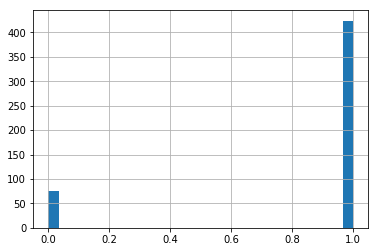

'0.0% de registros nulos'

'Variância: 0.129150390625'

qtd   pc
0.00  424 0.85
1.00   76 0.15

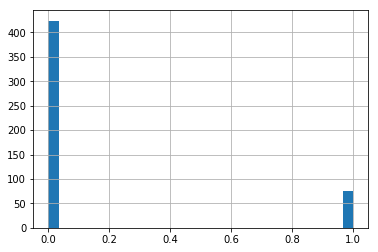

'0.0% de registros nulos'

'Variância: 0.150390625'

qtd   pc
1.00  408 0.82
0.00   92 0.18

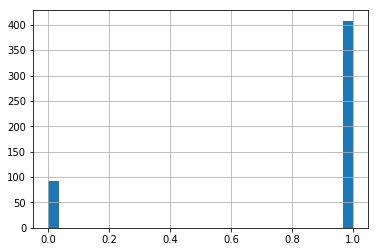

'0.0% de registros nulos'

'Variância: 0.146728515625'

qtd   pc
0.00  411 0.82
1.00   89 0.18

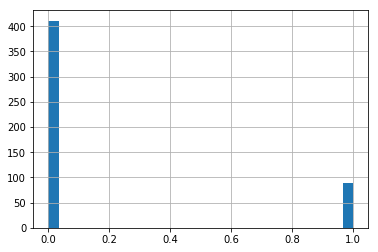

'0.0% de registros nulos'

'Variância: 0.1763916015625'

qtd   pc
1.00  386 0.77
0.00  114 0.23

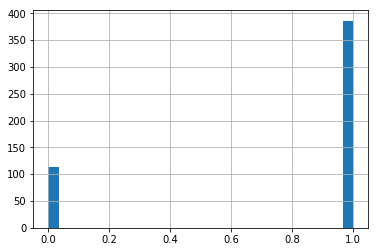

'0.0% de registros nulos'

'Variância: 0.1826171875'

qtd   pc
0.00  380 0.76
1.00  120 0.24

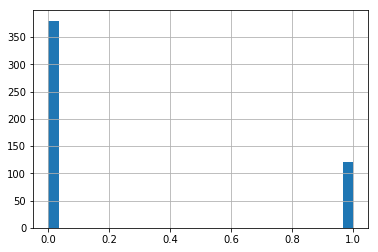

'0.0% de registros nulos'

'Variância: 0.2486572265625'

qtd   pc
0.00  271 0.54
1.00  229 0.46

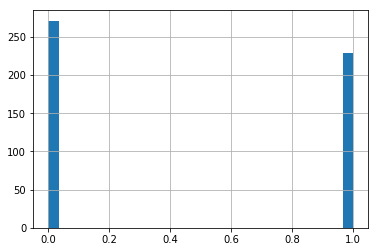

'0.0% de registros nulos'

'Variância: 0.232421875'

qtd   pc
1.00  317 0.63
0.00  183 0.37

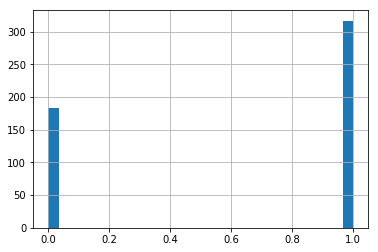

'0.0% de registros nulos'

'Variância: 0.2135009765625'

qtd   pc
0.00  346 0.69
1.00  154 0.31

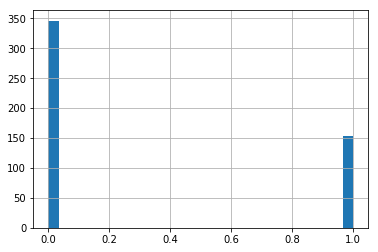

'0.0% de registros nulos'

'Variância: 0.196533203125'

qtd   pc
1.00  366 0.73
0.00  134 0.27

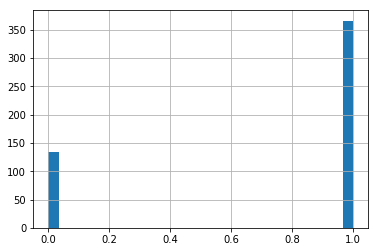

'0.0% de registros nulos'

'Variância: 0.10882568359375'

qtd   pc
1.00  438 0.88
0.00   62 0.12

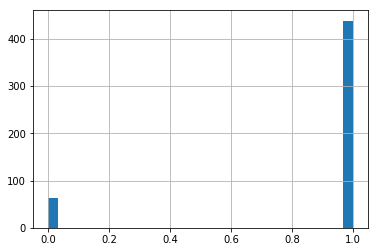

'0.0% de registros nulos'

'Variância: 0.250244140625'

qtd   pc
1.00  259 0.52
0.00  241 0.48

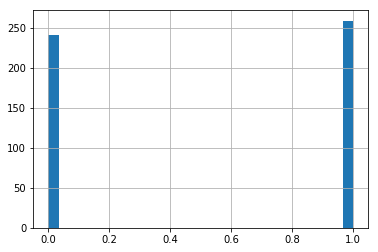

'0.0% de registros nulos'

'Variância: 0.2279052734375'

qtd   pc
0.00  325 0.65
1.00  175 0.35

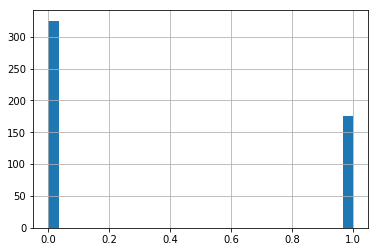

'0.0% de registros nulos'

'Variância: 0.173095703125'

qtd   pc
1.00  389 0.78
0.00  111 0.22

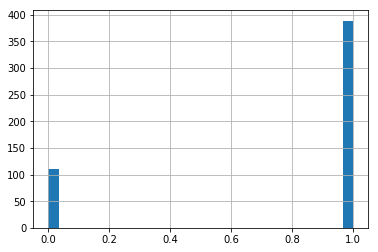

'0.0% de registros nulos'

'Variância: 0.2286376953125'

qtd   pc
1.00  324 0.65
0.00  176 0.35

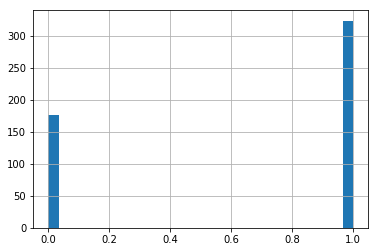

'0.0% de registros nulos'

'Variância: 0.25048828125'

qtd   pc
1.00  253 0.51
0.00  247 0.49

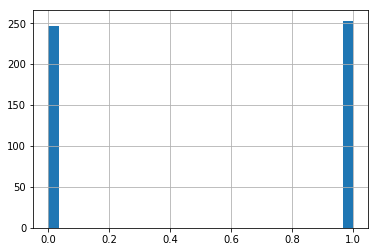

'0.0% de registros nulos'

'Variância: 0.163818359375'

qtd   pc
0.00  397 0.79
1.00  103 0.21

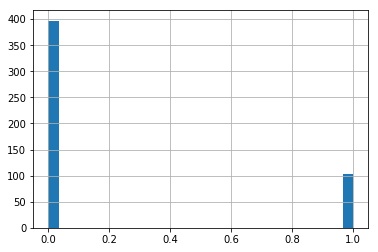

'0.0% de registros nulos'

'Variância: 0.22216796875'

qtd   pc
1.00  334 0.67
0.00  166 0.33

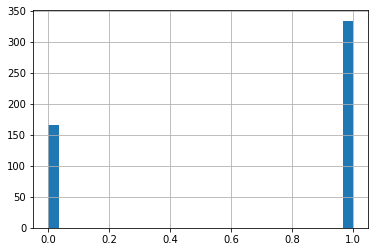

'0.0% de registros nulos'

'Variância: 0.1993408203125'

qtd   pc
0.00  363 0.73
1.00  137 0.27

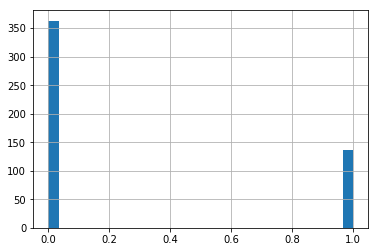

'0.0% de registros nulos'

'Variância: 0.10272216796875'

qtd   pc
0.00  442 0.88
1.00   58 0.12

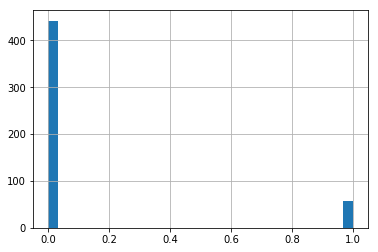

'0.0% de registros nulos'

'Variância: 0.196533203125'

qtd   pc
1.00  366 0.73
0.00  134 0.27

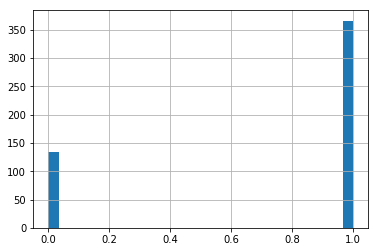

'0.0% de registros nulos'

'Variância: 0.2410888671875'

qtd   pc
0.00  298 0.60
1.00  202 0.40

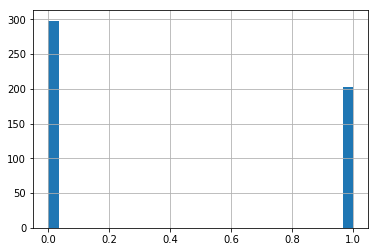

'0.0% de registros nulos'

'Variância: 0.2490234375'

qtd   pc
0.00  270 0.54
1.00  230 0.46

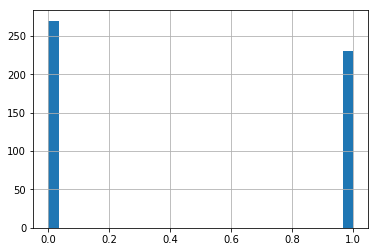

'0.0% de registros nulos'

'Variância: 61.8125'

count   500.00
mean     14.77
std       7.86
min       2.00
25%       9.00
50%      15.00
75%      19.25
max      84.00
Name: NU_SALAS_EXISTENTES, dtype: float64

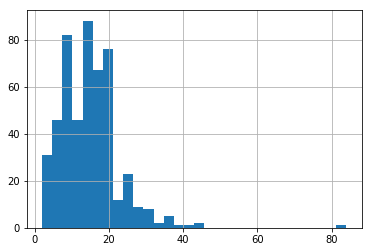

'0.0% de registros nulos'

'Variância: 0.244140625'

qtd   pc
1.00  290 0.58
0.00  210 0.42

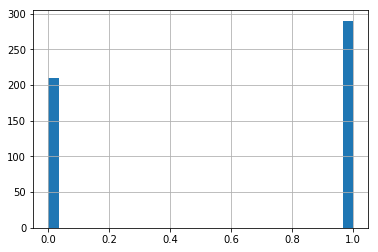

'0.0% de registros nulos'

'Variância: 0.2469482421875'

qtd   pc
1.00  280 0.56
0.00  220 0.44

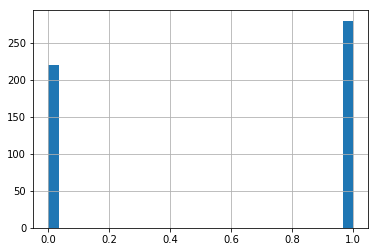

'0.0% de registros nulos'

'Variância: 0.1590576171875'

qtd   pc
1.00  401 0.80
0.00   99 0.20

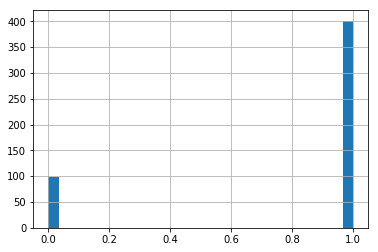

'0.0% de registros nulos'

'Variância: 0.2215576171875'

qtd   pc
0.00  335 0.67
1.00  165 0.33

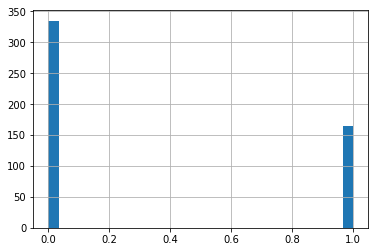

'0.0% de registros nulos'

'Variância: 0.241943359375'

qtd   pc
0.00  296 0.59
1.00  204 0.41

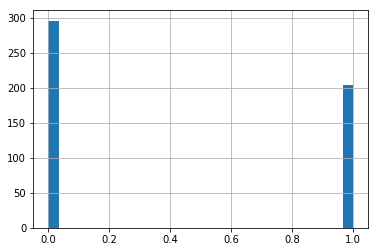

'0.0% de registros nulos'

'Variância: 0.2158203125'

qtd   pc
1.00  343 0.69
0.00  157 0.31

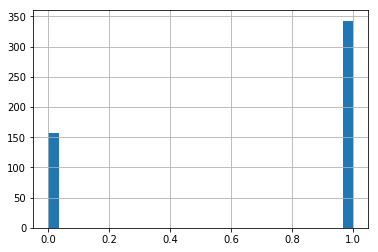

'0.0% de registros nulos'

'Variância: inf'

count   500.00
mean     26.34
std        inf
min       0.00
25%      14.00
50%      22.00
75%      30.25
max     639.00
Name: NU_COMPUTADOR, dtype: float64

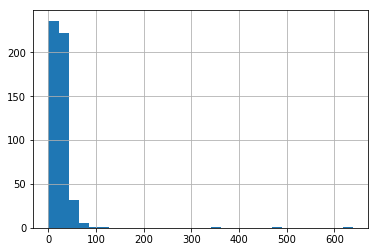

'0.0% de registros nulos'

'Variância: 27.671875'

count   500.00
mean      4.74
std       5.26
min       0.00
25%       2.00
50%       4.00
75%       6.00
max      53.00
Name: NU_COMP_ADMINISTRATIVO, dtype: float64

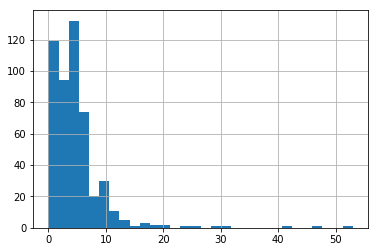

'0.0% de registros nulos'

'Variância: 155.375'

count   500.00
mean     14.27
std      12.47
min       0.00
25%       1.00
50%      13.50
75%      20.00
max      80.00
Name: NU_COMP_ALUNO, dtype: float64

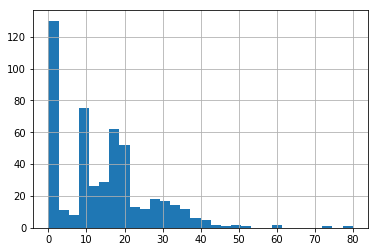

'0.0% de registros nulos'

'Variância: inf'

count   500.00
mean     76.38
std        inf
min      10.00
25%      48.00
50%      70.00
75%      96.00
max     392.00
Name: NU_FUNCIONARIOS, dtype: float64

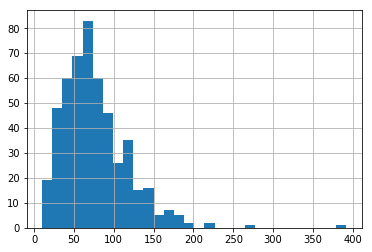

'0.0% de registros nulos'

'Variância: 0.2374267578125'

qtd   pc
1.00  307 0.61
0.00  193 0.39

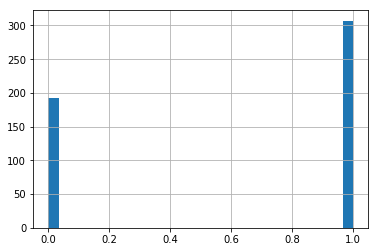

'0.0% de registros nulos'

'Variância: 0.230712890625'

qtd   pc
0.00  320 0.64
1.00  180 0.36

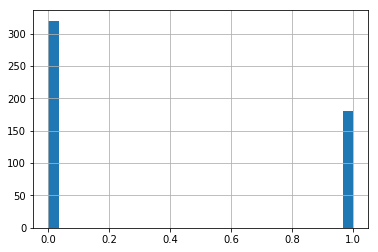

'0.0% de registros nulos'

'Variância: 0.1553955078125'

qtd   pc
0.00  404 0.81
1.00   96 0.19

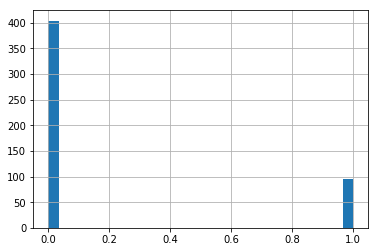

'0.0% de registros nulos'

'Variância: 2.51953125'

count   500.00
mean      5.64
std       1.59
min       2.00
25%       4.64
50%       5.41
75%       6.36
max      17.00
Name: NU_PROP_FUNS_SALAS_UTZD, dtype: float64

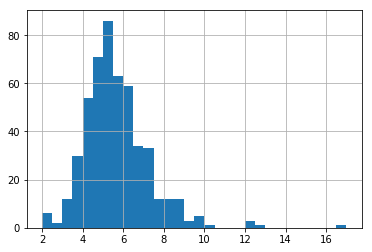

'0.0% de registros nulos'

'Variância: 8.5234375'

count   500.00
mean      2.03
std       2.92
min       0.00
25%       1.11
50%       1.75
75%       2.45
max      60.75
Name: NU_PROP_CPU_SALAS_UTZD, dtype: float64

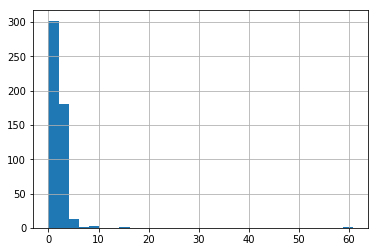

'0.0% de registros nulos'

'Variância: 10141.803106212425'

count   500.00
mean    158.45
std     100.71
min       1.00
25%      86.00
50%     154.00
75%     202.00
max     432.00
Name: NU_QTD_SETORES_CENSITARIOS, dtype: float64

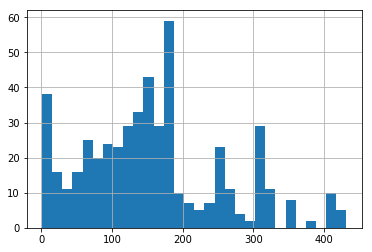

'0.0% de registros nulos'

'Variância: 0.08673095703125'

count   500.00
mean      1.57
std       0.29
min       1.04
25%       1.43
50%       1.52
75%       1.66
max       4.85
Name: NU_MEDIA_DISTANCIA_ESCOLA_SETOR, dtype: float64

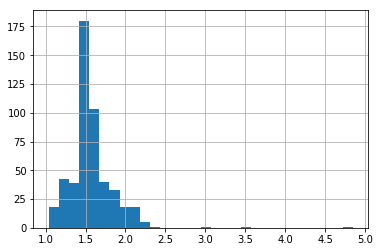

'0.0% de registros nulos'

'Variância: inf'

count     500.00
mean         inf
std          inf
min      1101.00
25%      1923.00
50%      2480.00
75%      5196.00
max     14048.00
Name: NU_MEDIANA_RENDA_MEDIA, dtype: float64

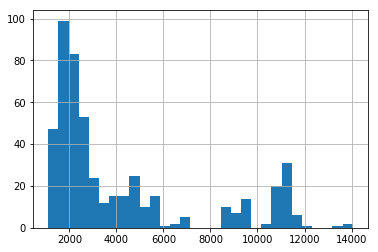

'0.0% de registros nulos'

'Variância: 654.0'

count   500.00
mean       inf
std      25.58
min      34.00
25%     169.00
50%     181.00
75%     189.00
max     215.50
Name: NU_MEDIANA_QTD_DOMICILIOS, dtype: float64

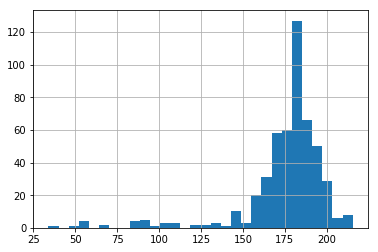

'0.0% de registros nulos'

'Variância: inf'

count   500.00
mean       inf
std        inf
min     105.00
25%     533.50
50%     609.50
75%     668.00
max     769.00
Name: NU_MEDIANA_QTD_PESSOAS, dtype: float64

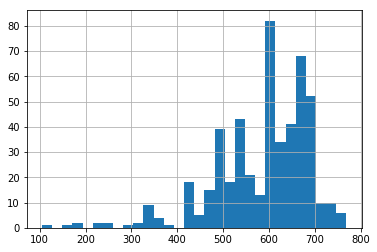

'0.0% de registros nulos'

'Variância: 432117324.1935832'

count      500.00
mean      4355.80
std      20787.43
min     -32721.00
25%     -12024.00
50%      10065.00
75%      21284.25
max      32697.00
Name: NU_SOMA_QTD_DOMICILIOS, dtype: float64

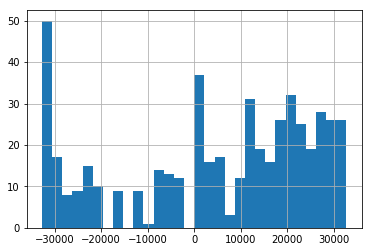

'0.0% de registros nulos'

'Variância: 309683047.81920236'

count      500.00
mean      1579.29
std      17597.81
min     -31623.00
25%     -11603.00
50%       2086.00
75%      15459.00
max      32356.00
Name: NU_SOMA_QTD_PESSOAS, dtype: float64

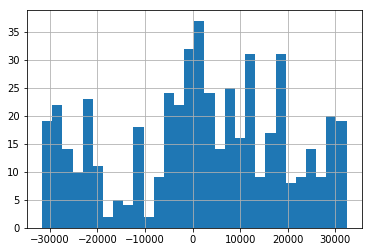

'0.0% de registros nulos'

'Variância: 0.00782012939453125'

count   500.00
mean      0.30
std       0.09
min       0.00
25%       0.27
50%       0.32
75%       0.36
max       0.45
Name: NU_PROP_DOM_ALUGADOS, dtype: float64

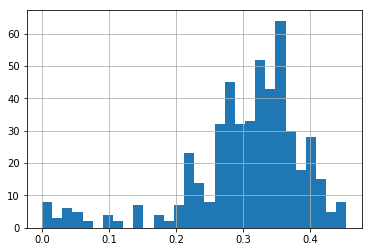

'0.0% de registros nulos'

'Variância: 0.008544921875'

count   500.00
mean      0.12
std       0.09
min       0.04
25%       0.08
50%       0.10
75%       0.11
max       1.00
Name: NU_PROP_DOM_CEDIDOS, dtype: float64

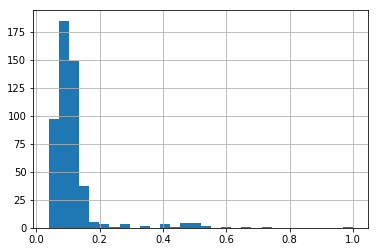

'0.0% de registros nulos'

'Variância: 0.0009660720825195312'

count   500.00
mean      0.05
std       0.03
min       0.00
25%       0.01
50%       0.04
75%       0.06
max       0.17
Name: NU_PROP_DOM_EM_AQUISICAO, dtype: float64

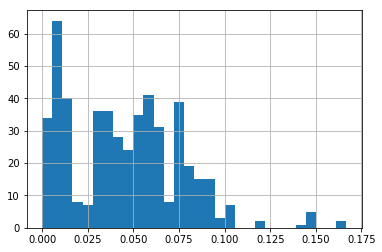

'0.0% de registros nulos'

'Variância: 0.05511474609375'

count   500.00
mean      0.19
std       0.23
min       0.00
25%       0.02
50%       0.06
75%       0.23
max       0.71
Name: NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM, dtype: float64

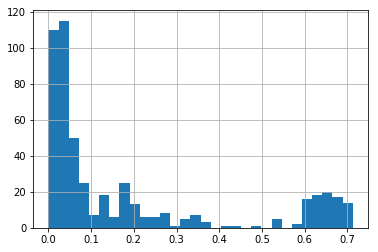

'0.0% de registros nulos'

'Variância: 0.048736572265625'

count   500.00
mean      0.39
std       0.22
min       0.02
25%       0.20
50%       0.41
75%       0.55
max       0.82
Name: NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM, dtype: float64

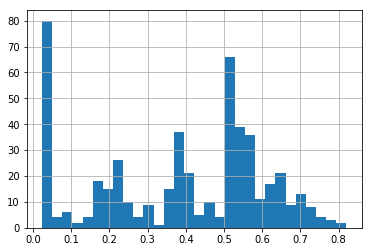

'0.0% de registros nulos'

'Variância: 0.0004699230194091797'

count   500.00
mean      0.52
std       0.02
min       0.40
25%       0.51
50%       0.52
75%       0.53
max       0.55
Name: NU_PROP_PSS_MULHERES, dtype: float64

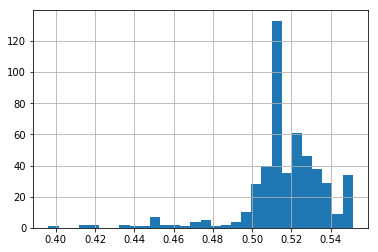

'0.0% de registros nulos'

'Variância: 0.0005502700805664062'

count   500.00
mean      0.13
std       0.02
min       0.02
25%       0.12
50%       0.13
75%       0.14
max       0.18
Name: NU_PROP_PSS_MULHERES_RSP, dtype: float64

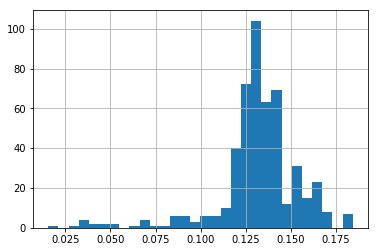

'0.0% de registros nulos'

'Variância: 0.0019044876098632812'

count   500.00
mean      0.19
std       0.04
min       0.11
25%       0.16
50%       0.20
75%       0.22
max       0.30
Name: NU_PROP_PSS_ABXO_12ANOS, dtype: float64

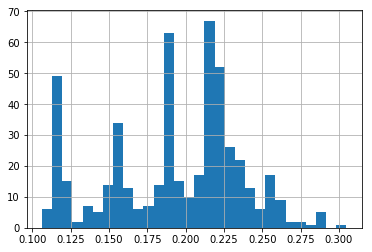

'0.0% de registros nulos'

'Variância: 0.0007829666137695312'

count   500.00
mean      0.06
std       0.03
min       0.01
25%       0.03
50%       0.05
75%       0.07
max       0.15
Name: NU_PROP_PSS_ACIMA_65ANOS, dtype: float64

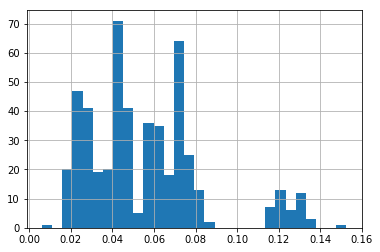

'0.0% de registros nulos'

'Variância: 8.940696716308594e-07'

count   500.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.01
Name: NU_PROP_PSS_ACIMA_90ANOS, dtype: float64

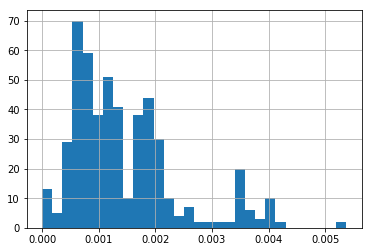

In [46]:
Visualizacao.explora_df(f)

In [48]:
#Salva Dataframe com todas as features das escolas
f.to_csv(f'{CONST.PATH_DF_CSV}features_escolas.csv')

### Será que as escolas são todas iguais?

Aqui clusterizamos as escolas.

In [49]:
fkm = f.copy()

In [50]:
display(Visualizacao.plota_matriz_heatmap(fkm.corr()))

In [51]:
fkm.drop(['IN_ESGOTO_FOSSA','IN_QUADRA_ESPORTES_DESCOBERTA'],axis=1,inplace=True)

In [53]:
scaler = MinMaxScaler()
data = scaler.fit_transform(fkm.values)

In [55]:
QTD_CLUSTERS = 4

In [59]:
#clusteriza as escolas
a = cluster.SpectralClustering(random_state=6,n_clusters=QTD_CLUSTERS,affinity='nearest_neighbors',
                                  assign_labels = 'discretize').fit_predict(data)
pd.Series(a).value_counts()
f['ROTULO_ESCOLA'] = a

In [60]:
f.ROTULO_ESCOLA.value_counts()

3    243
1     93
0     89
2     75
Name: ROTULO_ESCOLA, dtype: int64

In [61]:
#divisão do conjunto 3
d = f.loc[f.ROTULO_ESCOLA == 3].drop('ROTULO_ESCOLA',axis=1).values
dt = scaler.fit_transform(d)
a = cluster.SpectralClustering(random_state=6,n_clusters=2,affinity='nearest_neighbors',
                                  assign_labels = 'discretize').fit_predict(dt)
f.loc[f.ROTULO_ESCOLA == 3,'ROTULO_ESCOLA'] = a + 30
f.ROTULO_ESCOLA.value_counts()

31    141
30    102
1      93
0      89
2      75
Name: ROTULO_ESCOLA, dtype: int64

In [64]:
geo_esc = pd.read_csv(
                '%slclz_df/DADOS_ESCOLAS_PUBLICAS.csv' %CONST.CSV_PATH,
                index_col='CO_ENTIDADE'
                    )
a = f.merge(geo_esc[['LAT','LONG']],left_index=True,right_index=True)

In [65]:
a.head()

IN_ESGOTO_REDE_PUBLICA  IN_ESGOTO_FOSSA  ...      LAT   LONG
CO_ENTIDADE                                           ...                
53004167                       1.00             0.00  ...   -15.81 -48.08
53002296                       1.00             0.00  ...   -15.80 -47.89
53001567                       1.00             0.00  ...   -15.83 -47.92
53009479                       1.00             0.00  ...   -15.84 -47.88
53002474                       1.00             0.00  ...   -16.05 -48.05

[5 rows x 59 columns]

In [68]:
#plota escolas diferenciando a cor por cluster
lclz_praca_3_poderes = [-15.7994, -47.8613]
map = folium.Map(location=lclz_praca_3_poderes, zoom_start=10)
cores = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
         'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
         'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
         'gray', 'black', 'lightgray']
for i,c in enumerate(a.ROTULO_ESCOLA.unique()):
    ll = a.loc[a.ROTULO_ESCOLA == c][['LAT','LONG']].values.tolist()
    for point in range(0, len(ll)):
        folium.Marker(ll[point],icon=folium.Icon(color=cores[i],icon='map-marker-alt')).add_to(map)
map

In [70]:
#Salva as features das escolas junto com os rotulos
f.to_csv(f'{CONST.PATH_DF_CSV}features_escolas_modelagem.csv')

In [126]:
#Recarrega o arquivo de escolas
feat_esc = pd.read_csv(f'{CONST.PATH_DF_CSV}features_escolas_modelagem.csv',
                       index_col='CO_ENTIDADE')
feat_esc.head()

IN_ESGOTO_REDE_PUBLICA      ...        ROTULO_ESCOLA
CO_ENTIDADE                              ...                     
53004167                       1.00      ...                    2
53002296                       1.00      ...                    1
53001567                       1.00      ...                    0
53009479                       1.00      ...                   30
53002474                       1.00      ...                   31

[5 rows x 57 columns]

Execução de um xgboost para ver o _feature importance_.

In [127]:
import xgboost as xgb

In [149]:
cxgb = xgb.XGBClassifier(random_state=42)
X_train, X_test, y_train, y_test = \
    modelagem.gera_datasets(feat_esc,
                            balanceia=False,
                            tg='ROTULO_ESCOLA')

/home/itsbarreto/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/itsbarreto/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Base de TREINO
             precision    recall  f1-score   support

          0       0.74      0.70      0.72        20
          1       0.80      0.69      0.74        29
          2       0.94      0.77      0.85        22
         30       0.65      0.65      0.65        26
         31       0.65      0.86      0.74        28

avg / total       0.75      0.74      0.74       125

Base de TESTE
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        69
          1       1.00      1.00      1.00        64
          2       1.00      1.00      1.00        53
         30       1.00      1.00      1.00        76
         31       1.00      1.00      1.00       113

avg / total       1.00      1.00      1.00       375



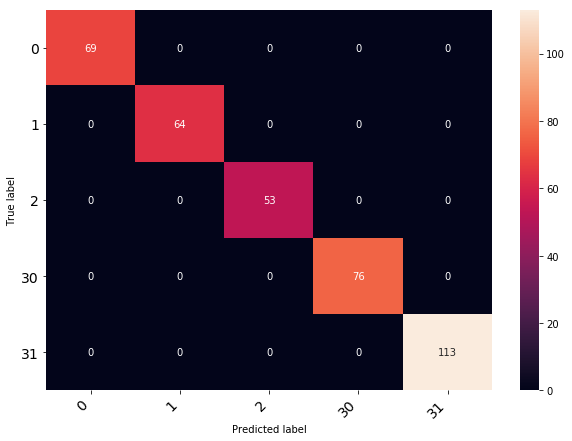

Nao foi possivel mostrar a ROC.
Feature ranking:
1. feature NU_FUNCIONARIOS (0.067502)
2. feature IN_DEPENDENCIAS_PNE (0.042752)
3. feature NU_PROP_FUNS_SALAS_UTZD (0.041466)
4. feature NU_QTD_SETORES_CENSITARIOS (0.041144)
5. feature NU_COMPUTADOR (0.031823)
6. feature IN_QUADRA_ESPORTES (0.030858)
7. feature NU_SOMA_QTD_PESSOAS (0.027965)
8. feature NU_COMP_ADMINISTRATIVO (0.027644)
9. feature IN_DESPENSA (0.027001)
10. feature NU_COMP_ALUNO (0.025394)
11. feature IN_EQUIP_PARABOLICA (0.024429)
12. feature IN_BANHEIRO_CHUVEIRO (0.024108)
13. feature IN_EQUIP_FAX (0.023787)
14. feature NU_SOMA_QTD_DOMICILIOS (0.023787)
15. feature NU_PROP_PSS_ABXO_12ANOS (0.023144)
16. feature IN_AREA_VERDE (0.022501)
17. feature NU_MEDIANA_QTD_DOMICILIOS (0.021858)
18. feature IN_BANHEIRO_EI (0.021858)
19. feature NU_PROP_PSS_ACIMA_65ANOS (0.021536)
20. feature IN_QUADRA_ESPORTES_COBERTA (0.021215)
21. feature NU_PROP_CPU_SALAS_UTZD (0.020894)
22. feature IN_SALA_ATENDIMENTO_ESPECIAL (0.020572)
23. f

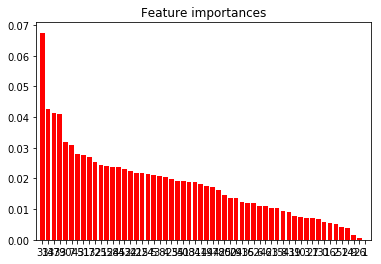

In [150]:
cxgb.fit(X_train,y_train)
ft = modelagem.avalia(X_train,y_train, X_test,  y_test,cxgb,feat_esc.columns)

In [152]:
cols_imp = ft[:40] + ['ROTULO_ESCOLA']
b = feat_esc[cols_imp]
b.shape

(500, 41)

/home/itsbarreto/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/itsbarreto/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Base de TREINO
             precision    recall  f1-score   support

          0       0.74      0.70      0.72        20
          1       0.80      0.69      0.74        29
          2       0.94      0.77      0.85        22
         30       0.65      0.65      0.65        26
         31       0.65      0.86      0.74        28

avg / total       0.75      0.74      0.74       125

Base de TESTE
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        69
          1       1.00      1.00      1.00        64
          2       1.00      1.00      1.00        53
         30       1.00      1.00      1.00        76
         31       1.00      1.00      1.00       113

avg / total       1.00      1.00      1.00       375



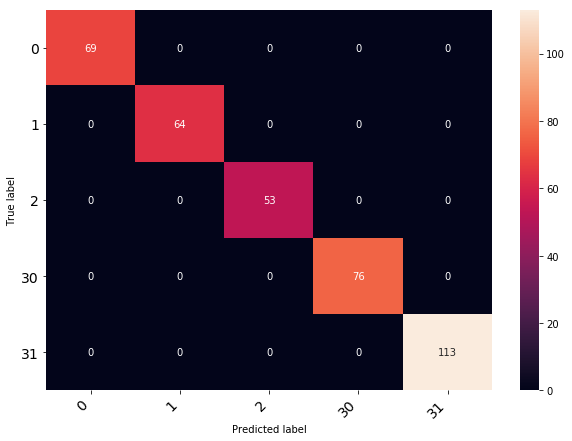

Nao foi possivel mostrar a ROC.
Feature ranking:
1. feature NU_FUNCIONARIOS (0.072278)
2. feature NU_QTD_SETORES_CENSITARIOS (0.045294)
3. feature IN_DEPENDENCIAS_PNE (0.044651)
4. feature NU_PROP_FUNS_SALAS_UTZD (0.043688)
5. feature NU_COMP_ADMINISTRATIVO (0.034051)
6. feature NU_COMPUTADOR (0.033408)
7. feature NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM (0.031160)
8. feature IN_QUADRA_ESPORTES (0.030838)
9. feature NU_SOMA_QTD_PESSOAS (0.030196)
10. feature NU_PROP_PSS_ABXO_12ANOS (0.029875)
11. feature NU_MEDIA_DISTANCIA_ESCOLA_SETOR (0.029553)
12. feature NU_SOMA_QTD_DOMICILIOS (0.029232)
13. feature IN_BANHEIRO_EI (0.028269)
14. feature IN_EQUIP_FAX (0.026662)
15. feature IN_DESPENSA (0.026341)
16. feature IN_BANHEIRO_CHUVEIRO (0.026341)
17. feature NU_PROP_CPU_SALAS_UTZD (0.025056)
18. feature NU_COMP_ALUNO (0.024735)
19. feature NU_PROP_PSS_ACIMA_65ANOS (0.023129)
20. feature NU_MEDIANA_QTD_DOMICILIOS (0.023129)
21. feature IN_SALA_ATENDIMENTO_ESPECIAL (0.022808)
22. feature IN_AREA

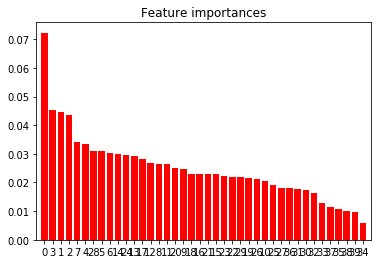

In [153]:
X_train, X_test, y_train, y_test = \
    modelagem.gera_datasets(b,
                            balanceia=False,
                            tg='ROTULO_ESCOLA')
cxgb.fit(X_train,y_train)
modelagem.avalia(X_train,y_train, X_test,  y_test,cxgb,feat_esc[cols_imp].columns);

## Alunos
    Alunos que estudaram nas escolas selecionadas no estudo no ano de 2015.

In [72]:
alunosVO = AlunosVO(CONST.CO_UF_DISTRITO_FEDERAL,docentes,escolas)

In [73]:
alunos = alunosVO.get_df_features_alunos_15()

In [74]:
#inicia o feature selection com a variancia e nulos
f = alunos.copy()
VARIANCIA_MINIMA = 0.05
PC_MAX_MODA = 0.9
PC_MAX_MODA_NU = 0.6
MAXIMO_DE_NULOS  = 0.05
qtd_ttl = f.shape[0]
cd = []
for c in f.columns:
    s = f[c]
    pc_nulos = s.isnull().sum() / qtd_ttl * 100
    try:
        a = f.loc[s == s.mode()[0]].shape[0]
    except:
        a = 0
        pass
    pc_moda = a/qtd_ttl
    if pc_moda > PC_MAX_MODA or (c.startswith('NU') and pc_moda > PC_MAX_MODA_NU) or pc_nulos > MAXIMO_DE_NULOS:
        #display(f'{c} - {pc_moda}')
        cd.append(c)
    
f.drop(cd,axis=1,inplace=True)
display(' '.join(f.columns))
display(f'Restaram {len(f.columns)/len(alunos.columns)} das colunas')
display(f.var())
display(f.head())

'NU_IDADE_REFERENCIA IN_IDD_CORRETA IN_NATURAL_DF IN_RESIDE_DF NU_ANOS_ESCOLA NU_ANOS_REDE_PBC_DF NU_PROP_VIDA_ESCOLA NU_PROP_VIDA_REDE_PBC IN_MULHER IN_TP_COR_RACA_0 IN_TP_COR_RACA_1 IN_TP_COR_RACA_3 IN_TP_ETAPA_AGREGADA_0 IN_TP_ETAPA_AGREGADA_3 IN_TP_ETAPA_AGREGADA_4 IN_TP_ETAPA_AGREGADA_INFANTIL IN_TP_ETAPA_AGREGADA_EJA'

'Restaram 0.24285714285714285 das colunas'

NU_IDADE_REFERENCIA             0.00
IN_IDD_CORRETA                  0.00
IN_NATURAL_DF                   0.00
IN_RESIDE_DF                    0.00
NU_ANOS_ESCOLA                  0.00
NU_ANOS_REDE_PBC_DF             0.00
NU_PROP_VIDA_ESCOLA             0.00
NU_PROP_VIDA_REDE_PBC           0.00
IN_MULHER                       0.00
IN_TP_COR_RACA_0                0.00
IN_TP_COR_RACA_1                0.00
IN_TP_COR_RACA_3                0.00
IN_TP_ETAPA_AGREGADA_0          0.00
IN_TP_ETAPA_AGREGADA_3          0.00
IN_TP_ETAPA_AGREGADA_4          0.00
IN_TP_ETAPA_AGREGADA_INFANTIL   0.00
IN_TP_ETAPA_AGREGADA_EJA        0.00
dtype: float16

NU_IDADE_REFERENCIA  IN_IDD_CORRETA  IN_NATURAL_DF  IN_RESIDE_DF  NU_ANOS_ESCOLA  NU_ANOS_REDE_PBC_DF  NU_PROP_VIDA_ESCOLA  NU_PROP_VIDA_REDE_PBC  IN_MULHER  IN_TP_COR_RACA_0  IN_TP_COR_RACA_1  IN_TP_COR_RACA_3  IN_TP_ETAPA_AGREGADA_0  IN_TP_ETAPA_AGREGADA_3  IN_TP_ETAPA_AGREGADA_4  IN_TP_ETAPA_AGREGADA_INFANTIL  IN_TP_ETAPA_AGREGADA_EJA
CO_PESSOA_FISICA ID_TURMA CO_ENTIDADE ID_MATRICULA                                                                                                                                                                                                                                                                                                                                                     
110174229150     10026    53002580    105874465                      17               1              1             1               1                    1                 0.06                   0.06          0                 1                 0                 0                       0                       0                       1                              0                         0
119831893165     10026    53002580    105876922                      16               1              1             1               1                    6                 0.06                   0.38          1                 0                 0                 1                       0                       0                       1                              0                         0
113354964080     10026    53002580    105875659                      17               1              1             1               2                    8                 0.12                   0.47          0                 1                 0                 0                       0                       0                       1                              0                         0
114722786312     10026    53002580    105876291                      16               1              1             1               1                    8                 0.06                   0.50          0                 0                 1                 0                       0                       0                       1                              0                         0
113193719578     10026    53002580    106307563                      17               1              1             1               2                    6                 0.12                   0.35          0                 1                 0                 0                       0                       0                       1                              0                         0

'0.0% de registros nulos'

'Variância: 47.91818505759569'

count   384829.00
mean        13.42
std          6.92
min          0.00
25%          9.00
50%         13.00
75%         16.00
max         83.00
Name: NU_IDADE_REFERENCIA, dtype: float64

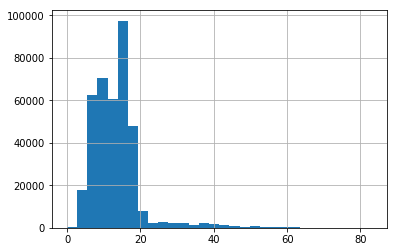

'0.0% de registros nulos'

'Variância: 0.23609826663841255'

qtd   pc
1  237789 0.62
0  147040 0.38

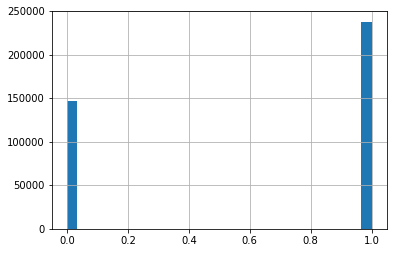

'0.0% de registros nulos'

'Variância: 0.15566044305294252'

qtd   pc
1  310614 0.81
0   74215 0.19

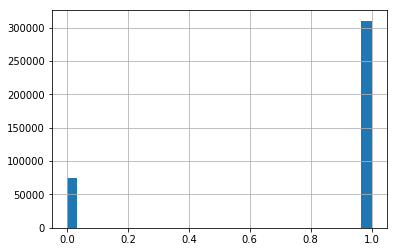

'0.0% de registros nulos'

'Variância: 0.15076497141508427'

qtd   pc
1  313642 0.82
0   71187 0.18

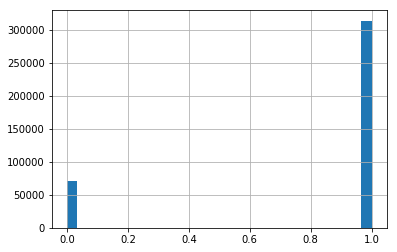

'0.0% de registros nulos'

'Variância: 2.063720013319115'

qtd   pc
1  230051 0.60
2   99934 0.26
4   35533 0.09
6   13038 0.03
8    6273 0.02

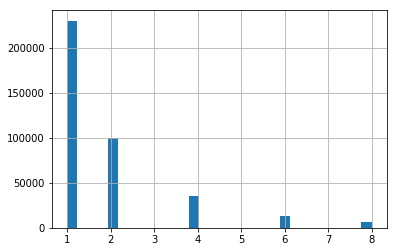

'0.0% de registros nulos'

'Variância: 7.936473134587554'

qtd   pc
8  134765 0.35
1   77263 0.20
6   64278 0.17
2   55180 0.14
4   53343 0.14

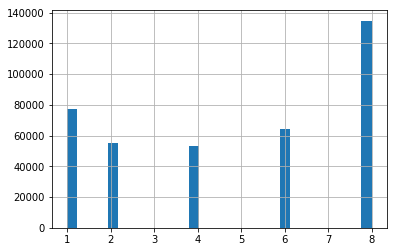

'0.0% de registros nulos'

'Variância: 0.01451873779296875'

count   384829.00
mean         0.16
std          0.12
min          0.01
25%          0.07
50%          0.12
75%          0.20
max          1.00
Name: NU_PROP_VIDA_ESCOLA, dtype: float64

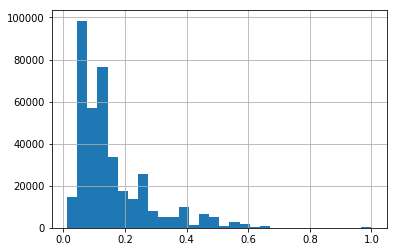

'0.0% de registros nulos'

'Variância: 0.0'

count   384829.00
mean          nan
std          0.00
min          0.01
25%          0.22
50%          0.42
75%          0.50
max          1.14
Name: NU_PROP_VIDA_REDE_PBC, dtype: float64

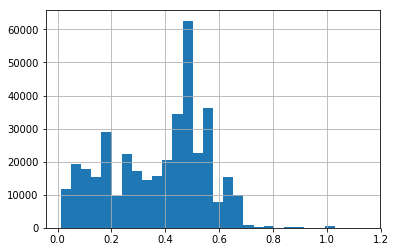

'0.0% de registros nulos'

'Variância: 0.24999973767155298'

qtd   pc
0  192782 0.50
1  192047 0.50

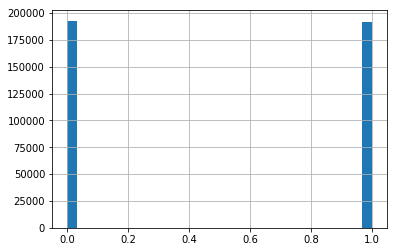

'0.0% de registros nulos'

'Variância: 0.23423374799330918'

qtd   pc
0  240736 0.63
1  144093 0.37

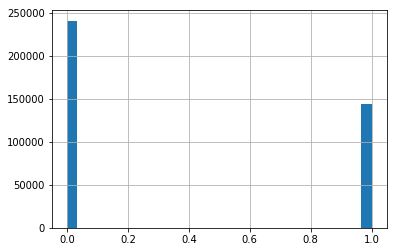

'0.0% de registros nulos'

'Variância: 0.15648232963117673'

qtd   pc
0  310098 0.81
1   74731 0.19

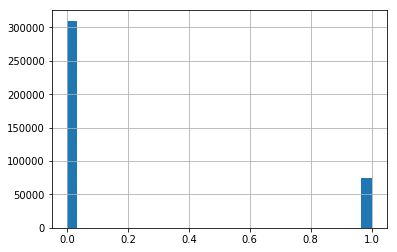

'0.0% de registros nulos'

'Variância: 0.23941082383397025'

qtd   pc
0  232016 0.60
1  152813 0.40

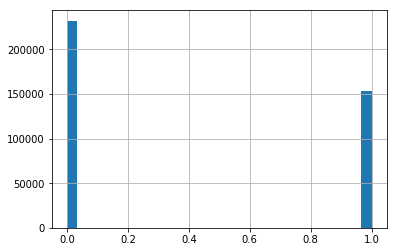

'0.0% de registros nulos'

'Variância: 0.12967457285700862'

qtd   pc
0  325904 0.85
1   58925 0.15

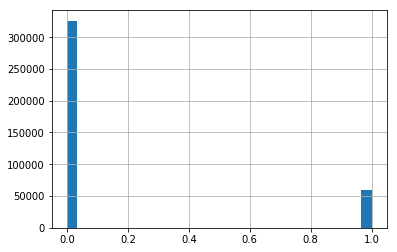

'0.0% de registros nulos'

'Variância: 0.19785228439321406'

qtd   pc
0  280294 0.73
1  104535 0.27

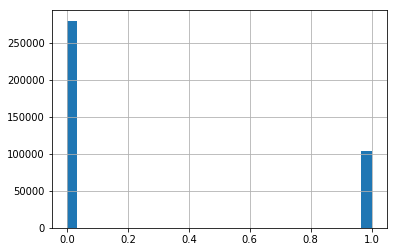

'0.0% de registros nulos'

'Variância: 0.1402137225107786'

qtd   pc
0  319924 0.83
1   64905 0.17

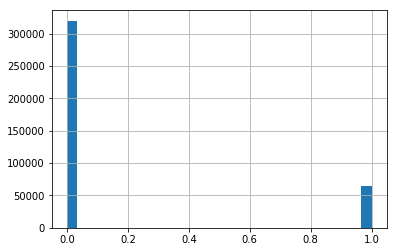

'0.0% de registros nulos'

'Variância: 0.20488586679059484'

qtd   pc
0  274153 0.71
1  110676 0.29

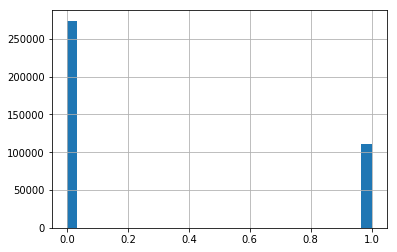

'0.0% de registros nulos'

'Variância: 0.09227694161899876'

qtd   pc
0  345247 0.90
1   39582 0.10

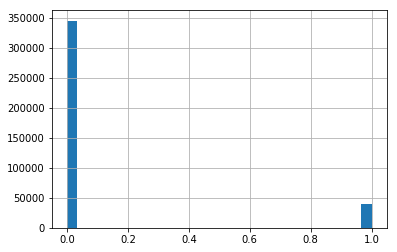

In [75]:
Visualizacao.explora_df(f)

### Será que todos os alunos são iguais?

Clusterização do alunos.

In [76]:
fkma = f.copy()

In [78]:
km = kmeans_professores(fkma,10,48)
f['ROTULO_ALUNO'] = km.labels_
pd.DataFrame(f.ROTULO_ALUNO.value_counts())

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


ROTULO_ALUNO
6         51000
1         49917
8         44011
0         41214
5         40364
9         35864
4         33712
3         31946
2         29691
7         27110

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


Base de TREINO
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     30919
          1       1.00      1.00      1.00     37383
          2       1.00      1.00      1.00     22321
          3       1.00      1.00      1.00     23971
          4       1.00      1.00      1.00     25301
          5       1.00      1.00      1.00     30174
          6       1.00      1.00      1.00     38277
          7       1.00      1.00      1.00     20337
          8       1.00      1.00      1.00     33077
          9       1.00      1.00      1.00     26861

avg / total       1.00      1.00      1.00    288621

Base de TESTE
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     10295
          1       1.00      1.00      1.00     12534
          2       1.00      1.00      1.00      7370
          3       1.00      1.00      1.00      7975
          4       1.00      1.00      1.00      8411
          5  

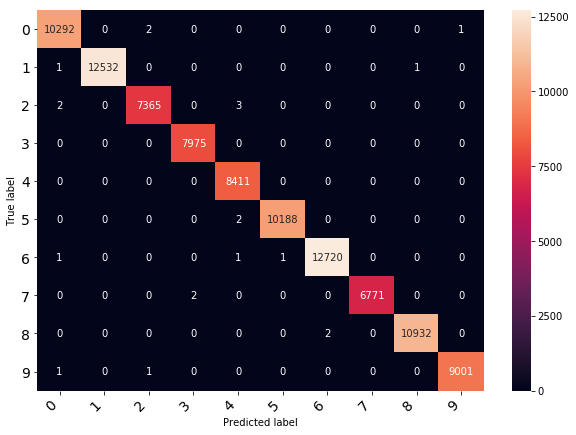

Nao foi possivel mostrar a ROC.
Feature ranking:
1. feature IN_TP_COR_RACA_3 (0.160461)
2. feature IN_TP_COR_RACA_1 (0.128758)
3. feature IN_TP_ETAPA_AGREGADA_3 (0.124509)
4. feature IN_TP_COR_RACA_0 (0.110360)
5. feature IN_TP_ETAPA_AGREGADA_INFANTIL (0.091813)
6. feature NU_IDADE_REFERENCIA (0.086906)
7. feature IN_TP_ETAPA_AGREGADA_0 (0.082699)
8. feature IN_TP_ETAPA_AGREGADA_4 (0.080482)
9. feature IN_IDD_CORRETA (0.074453)
10. feature IN_TP_ETAPA_AGREGADA_EJA (0.032930)
11. feature NU_PROP_VIDA_REDE_PBC (0.010656)
12. feature NU_PROP_VIDA_ESCOLA (0.008618)
13. feature IN_MULHER (0.002950)
14. feature NU_ANOS_REDE_PBC_DF (0.001640)
15. feature NU_ANOS_ESCOLA (0.001056)
16. feature IN_NATURAL_DF (0.000942)
17. feature IN_RESIDE_DF (0.000767)
Nao foi possivel mostrar o feature importance.
The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


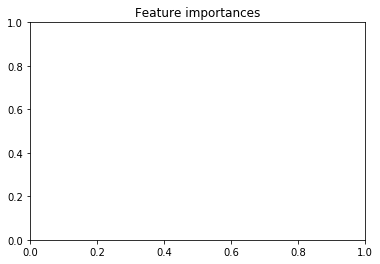

In [79]:
#Random forest para ver quais foram as features mais importantes para esse modelo
ft = modelagem.processa_tudo(f,tg='ROTULO_ALUNO')

In [80]:
QTD_FEATURES_IMPORTANTES = 11
cols_imp = ft[0][:QTD_FEATURES_IMPORTANTES] + ['ROTULO_ALUNO']

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


Base de TREINO
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     30919
          1       1.00      1.00      1.00     37383
          2       1.00      1.00      1.00     22321
          3       1.00      1.00      1.00     23971
          4       0.97      0.98      0.97     25301
          5       1.00      1.00      1.00     30174
          6       1.00      1.00      1.00     38277
          7       0.97      0.97      0.97     20337
          8       1.00      1.00      1.00     33077
          9       1.00      1.00      1.00     26861

avg / total       0.99      0.99      0.99    288621

Base de TESTE
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     10295
          1       1.00      1.00      1.00     12534
          2       1.00      1.00      1.00      7370
          3       1.00      1.00      1.00      7975
          4       0.97      0.97      0.97      8411
          5  

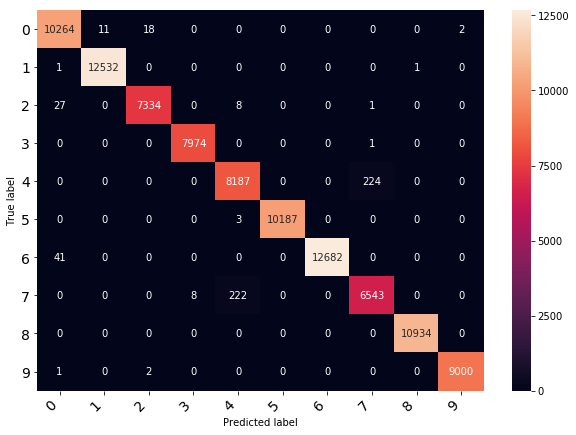

Nao foi possivel mostrar a ROC.
Feature ranking:
1. feature IN_TP_COR_RACA_3 (0.190378)
2. feature IN_TP_COR_RACA_1 (0.140902)
3. feature IN_TP_ETAPA_AGREGADA_3 (0.126522)
4. feature IN_TP_ETAPA_AGREGADA_4 (0.111776)
5. feature IN_TP_ETAPA_AGREGADA_INFANTIL (0.107766)
6. feature IN_TP_COR_RACA_0 (0.072565)
7. feature IN_TP_ETAPA_AGREGADA_0 (0.066244)
8. feature NU_IDADE_REFERENCIA (0.061299)
9. feature IN_IDD_CORRETA (0.057451)
10. feature IN_TP_ETAPA_AGREGADA_EJA (0.052806)
11. feature NU_PROP_VIDA_REDE_PBC (0.012292)
Nao foi possivel mostrar o feature importance.
The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


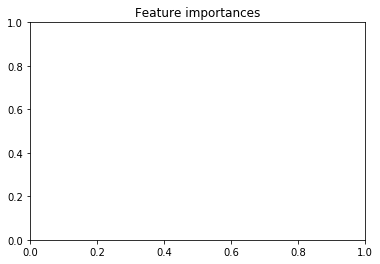

In [81]:
modelagem.processa_tudo(f[cols_imp],tg='ROTULO_ALUNO');

In [82]:
f = f[cols_imp]

ROTULO_ALUNO
0   0.99
1   1.00
2   0.00
3   0.00
4   0.00
5   0.00
6   0.35
7   0.00
8   1.00
9   0.00
Name: IN_TP_COR_RACA_3, dtype: float64

152813

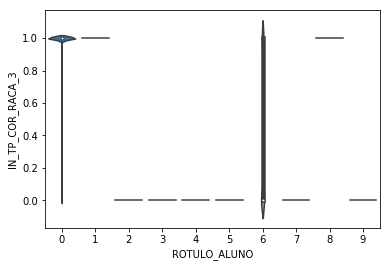

ROTULO_ALUNO
0   0.00
1   0.00
2   0.13
3   1.00
4   0.00
5   0.00
6   0.00
7   0.94
8   0.00
9   0.37
Name: IN_TP_COR_RACA_1, dtype: float64

74731

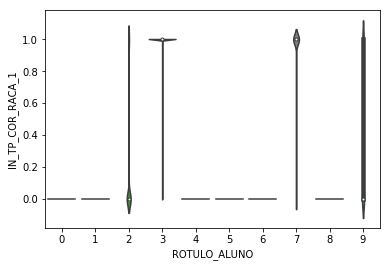

ROTULO_ALUNO
0   0.00
1   0.00
2   0.00
3   0.64
4   0.00
5   1.00
6   0.00
7   0.00
8   1.00
9   0.00
Name: IN_TP_ETAPA_AGREGADA_3, dtype: float64

104535

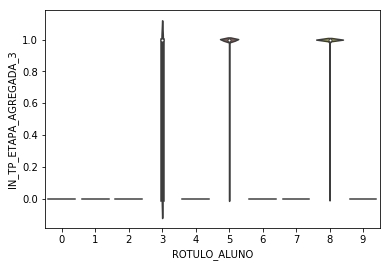

ROTULO_ALUNO
0   0.00
1   0.00
2   0.81
3   0.00
4   0.94
5   0.91
6   0.61
7   0.00
8   0.00
9   0.57
Name: IN_TP_COR_RACA_0, dtype: float64

144093

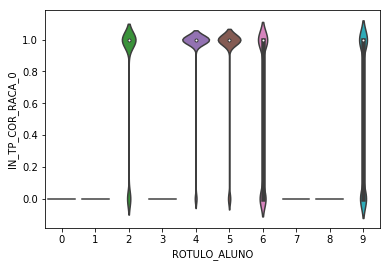

ROTULO_ALUNO
0   0.00
1   1.00
2   0.00
3   0.00
4   1.00
5   0.00
6   0.00
7   1.00
8   0.00
9   0.00
Name: IN_TP_ETAPA_AGREGADA_INFANTIL, dtype: float64

110676

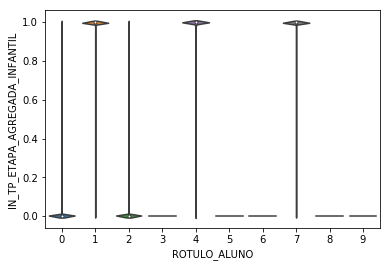

count  mean   std   min   25%   50%   75%   max
ROTULO_ALUNO                                                   
0            41214.00 17.24  9.58  2.00 11.00 15.00 19.00 81.00
1            49917.00  7.81  2.21  0.00  6.00  8.00  9.00 50.00
2            29691.00 25.55 11.16 11.00 18.00 20.00 31.00 83.00
3            31946.00 14.33  3.57  9.00 12.00 14.00 16.00 71.00
4            33712.00  7.77  2.59  0.00  6.00  8.00  9.00 56.00
5            40364.00 13.37  1.72  9.00 12.00 13.00 14.00 50.00
6            51000.00 16.36  1.70 11.00 15.00 16.00 17.00 64.00
7            27110.00  7.66  2.25  0.00  6.00  8.00  9.00 44.00
8            44011.00 12.92  1.57  8.00 12.00 13.00 14.00 53.00
9            35864.00 12.19  3.80  0.00 10.00 12.00 15.00 62.00

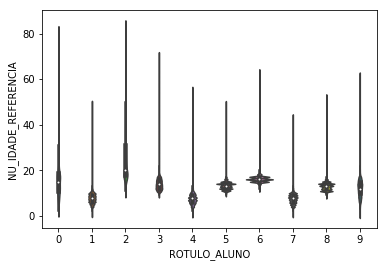

ROTULO_ALUNO
0   0.56
1   0.00
2   0.00
3   0.00
4   0.00
5   0.00
6   0.00
7   0.00
8   0.00
9   1.00
Name: IN_TP_ETAPA_AGREGADA_0, dtype: float64

58925

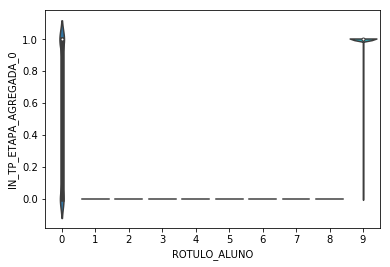

ROTULO_ALUNO
0   0.08
1   0.00
2   0.00
3   0.33
4   0.00
5   0.00
6   1.00
7   0.00
8   0.00
9   0.00
Name: IN_TP_ETAPA_AGREGADA_4, dtype: float64

64905

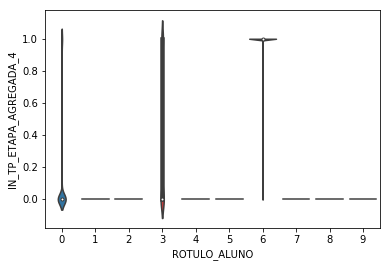

ROTULO_ALUNO
0   0.00
1   0.93
2   0.00
3   0.83
4   0.92
5   0.71
6   0.88
7   0.95
8   0.79
9   0.00
Name: IN_IDD_CORRETA, dtype: float64

237789

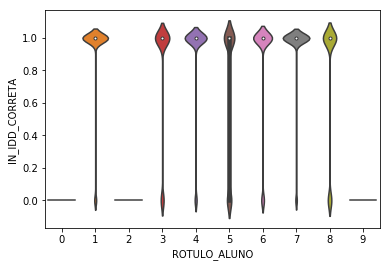

ROTULO_ALUNO
0   0.30
1   0.00
2   0.91
3   0.00
4   0.00
5   0.00
6   0.00
7   0.00
8   0.00
9   0.00
Name: IN_TP_ETAPA_AGREGADA_EJA, dtype: float64

39582

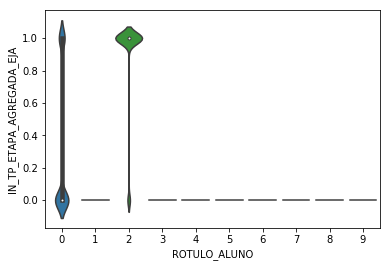

count  mean  std  min  25%  50%  75%  max
ROTULO_ALUNO                                             
0            41214.00  0.35 0.19 0.01 0.17 0.40 0.50 1.00
1            49917.00  0.31 0.16 0.02 0.20 0.25 0.44 1.00
2            29691.00  0.26 0.18 0.01 0.05 0.32 0.42 0.73
3            31946.00  0.43 0.18 0.01 0.35 0.50 0.55 0.80
4            33712.00  0.29 0.15 0.02 0.17 0.25 0.40 1.14
5            40364.00  0.46 0.17 0.02 0.38 0.50 0.57 0.89
6            51000.00  0.41 0.15 0.02 0.35 0.47 0.50 0.62
7            27110.00  0.32 0.16 0.03 0.20 0.29 0.44 1.00
8            44011.00  0.46 0.17 0.02 0.36 0.50 0.57 0.80
9            35864.00  0.42 0.17 0.02 0.29 0.46 0.55 1.00

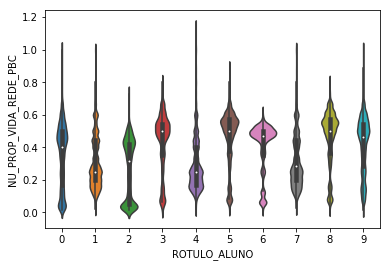

In [83]:
#mostra os dados para definir os conjuntos
for c in f.columns[:-1]:
    display(HTML(f'<h2>{c}</h2>'))
    if f[c].dtype == bool:
        f[c] = f[c].astype(np.int8)
    sns.violinplot(y=c,x='ROTULO_ALUNO',data=f)
    if c.startswith('NU'):
        display(f.groupby('ROTULO_ALUNO')[c].describe())
    else:
        display(f.groupby('ROTULO_ALUNO')[c].mean())
        display(f[c].sum())
        
    plt.show()

In [86]:
f.to_csv(f'{CONST.PATH_DF_CSV}alunos_features.csv')

In [100]:
feat_aln = DIU.ajusta_colunas_int_df_inep(
    pd.read_csv(f'{CONST.PATH_DF_CSV}alunos_features.csv',
               low_memory=False,
               index_col='CO_PESSOA_FISICA'))

### Resultado das classes
<ul>
<li><strong>Classe 0 - 41.214 alunos</strong>
<ul>
<li>Cor parda</li>
<li>Mediana em 15 anos, maior variabilidade.</li>
<li>56% em s&eacute;rie n&atilde;o informada</li>
<li>8% no Ensino m&eacute;dio</li>
<li>30% est&aacute; no EJA</li>
<li>N&atilde;o est&aacute; na idade correta</li>
</ul>
</li>
<li><strong>Classe 1 - 49.917 alunos</strong>
<ul>
<li>2&ordm; maior grupo</li>
<li>Cor parda</li>
<li>Ensino infantil / primeiros anos do fundamental (antigo prim&aacute;rio)</li>
<li>Alunos mais jovens (mediana em 8 anos)</li>
<li>93% est&aacute; na idade correta</li>
</ul>
</li>
<li><strong>Classe 2 - 26.691 alunos</strong>
<ul>
<li>2&ordf; menor grupo</li>
<li>13% Cor branca</li>
<li>81% cor n&atilde;o declarada</li>
<li>Grupo mais velho, mediana em 20 anos</li>
<li>N&atilde;o est&aacute; na idade correta</li>
<li>91% Est&aacute; no EJA</li>
</ul>
</li>
<li><strong>Classe 3 - 31.946 alunos</strong>
<ul>
<li>3&ordm; menor grupo</li>
<li>Cor branca</li>
<li>64% nos anos finais do Ensino Fundamental (antigo gin&aacute;sio)</li>
<li>8% no Ensino m&eacute;dio</li>
<li>Mediana em 14 anos</li>
<li>83% est&aacute; na idade correta</li>
<li></li>
</ul>
</li>
<li><strong>Classe 4 - 33.712 alunos</strong>
<ul>
<li>94% cor n&atilde;o declarada</li>
<li>Ensino infantil / primeiros anos do fundamental (antigo prim&aacute;rio)</li>
<li>Alunos mais jovens (mediana em 8 anos)</li>
<li>92% est&aacute; na idade correta</li>
<li></li>
</ul>
</li>
<li><strong>Classe 5 - 40.364 alunos</strong>
<ul>
<li>91% cor n&atilde;o declarada&nbsp;</li>
<li>nos anos finais do Ensino Fundamental (antigo gin&aacute;sio)</li>
<li>Mediana em 13 anos</li>
<li>71% est&aacute; na idade correta</li>
<li>Sempre estudou em escola p&uacute;blica</li>
<li></li>
</ul>
</li>
<li><strong>Classe 6 - 51.000 alunos</strong>
<ul>
<li>1&ordm; maior grupo</li>
<li>35% Cor parda</li>
<li>61% cor n&atilde;o declarada</li>
<li>Segundo grupo mais velho, mediana em 16 anos</li>
<li>Ensino m&eacute;dio</li>
<li>88% est&aacute; na idade correta</li>
<li></li>
</ul>
</li>
<li><strong>Classe 7 - 27.110 alunos</strong>
<ul>
<li>1&ordf; menor grupo</li>
<li>Cor branca</li>
<li>Ensino infantil / primeiros anos do fundamental (antigo prim&aacute;rio)</li>
<li>Alunos mais jovens (mediana em 8 anos) e menor m&eacute;dia (7.66)</li>
<li>95% est&aacute; na idade correta</li>
<li></li>
<li></li>
</ul>
</li>
<li><strong>Classe 8 - 44.011 alunos</strong>
<ul>
<li>3&ordm; maior grupo</li>
<li>Cor parda</li>
<li>nos anos finais do Ensino Fundamental (antigo gin&aacute;sio)</li>
<li>Mediana em 13 anos</li>
<li>79% est&aacute; na idade correta</li>
<li>Sempre estudou em escola p&uacute;blica</li>
</ul>
</li>
<li><strong>Classe 9 - 35.864 alunos</strong>
<ul>
<li>37% Cor branca </li>
<li>57% cor n&atilde;o declarada</li>
<li>Mediana em 12 anos</li>
<li>S&eacute;rie n&atilde;o informada</li>
<li>N&atilde;o est&aacute; na idade correta</li>
</ul>
</li>
</ul>

## Turmas

    Turmas das escolas de interesse na solução da questão.

In [170]:
turmasVO = TurmasVO(escolas)

In [181]:
turmas = turmasVO.get_df_features_turmas15()
turmas.set_index('ID_TURMA',inplace=True)

In [182]:
feat_aln.ID_TURMA.nunique()

18703

In [183]:
#Cria as features de proporcao de grupos de alunos
a = pd.get_dummies(feat_aln.ROTULO_ALUNO,prefix='ROTULO_ALUNO',dtype=np.int16).\
merge(feat_aln[['ID_TURMA']],left_index=True,right_index=True).groupby('ID_TURMA').sum()
a['NU_QTD_ALUNOS'] =  np.sum(a,axis=1)
for col in a.columns:
    if col.startswith('ROTULO'):
        a['NU_PROP_ALUNOS_ROTULO_' + col.split('_')[-1]] = a[col]/a['NU_QTD_ALUNOS']
        a.drop(col,inplace=True,axis=1)
turmas = turmas.merge(a,left_index=True,right_index=True)


In [186]:
#Feature selection básico
f = turmas.copy()
VARIANCIA_MINIMA = 0.05
PC_MAX_MODA = 0.9
PC_MAX_MODA_NU = 0.6
MAXIMO_DE_NULOS  = 0.05
qtd_ttl = f.shape[0]
cd = []
for c in f.columns:
    if not c.startswith('NU_PROP_ALUNOS'):
        s = f[c]
        pc_nulos = s.isnull().sum() / qtd_ttl * 100
        try:
            a = f.loc[s == s.mode()[0]].shape[0]
        except:
            a = 0
            pass
        pc_moda = a/qtd_ttl
        if pc_moda > PC_MAX_MODA or (c.startswith('NU') and pc_moda > PC_MAX_MODA_NU) or pc_nulos > MAXIMO_DE_NULOS:
            #display(f'{c} - {pc_moda}')
            cd.append(c)
    
f.drop(cd,axis=1,inplace=True)
display(' '.join(f.columns))
display(f'Restaram {len(f.columns)/len(turmas.columns)} das colunas')
display(f.var())
display(f.head())

'NU_MATRICULAS IN_TURNO_0 IN_TURNO_1 NU_QTD_DISCIPLINAS NU_QTD_ALUNOS NU_PROP_ALUNOS_ROTULO_0 NU_PROP_ALUNOS_ROTULO_1 NU_PROP_ALUNOS_ROTULO_2 NU_PROP_ALUNOS_ROTULO_3 NU_PROP_ALUNOS_ROTULO_4 NU_PROP_ALUNOS_ROTULO_5 NU_PROP_ALUNOS_ROTULO_6 NU_PROP_ALUNOS_ROTULO_7 NU_PROP_ALUNOS_ROTULO_8 NU_PROP_ALUNOS_ROTULO_9'

'Restaram 0.7142857142857143 das colunas'

NU_MATRICULAS             256.86
IN_TURNO_0                  0.25
IN_TURNO_1                  0.25
NU_QTD_DISCIPLINAS         20.78
NU_QTD_ALUNOS             666.90
NU_PROP_ALUNOS_ROTULO_0     0.02
NU_PROP_ALUNOS_ROTULO_1     0.06
NU_PROP_ALUNOS_ROTULO_2     0.03
NU_PROP_ALUNOS_ROTULO_3     0.01
NU_PROP_ALUNOS_ROTULO_4     0.05
NU_PROP_ALUNOS_ROTULO_5     0.03
NU_PROP_ALUNOS_ROTULO_6     0.05
NU_PROP_ALUNOS_ROTULO_7     0.02
NU_PROP_ALUNOS_ROTULO_8     0.03
NU_PROP_ALUNOS_ROTULO_9     0.03
dtype: float64

NU_MATRICULAS           ...             NU_PROP_ALUNOS_ROTULO_9
ID_TURMA                          ...                                    
17261                37           ...                                0.05
127976               19           ...                                0.00
128264               20           ...                                0.00
128649               12           ...                                0.08
6783                 24           ...                                0.00

[5 rows x 15 columns]

In [187]:
Visualizacao.plota_matriz_heatmap(f.corr())

In [188]:
f.to_csv(f'{CONST.PATH_DF_CSV}turmas_modelagem.csv')

In [189]:
feat_turmas = DIU.ajusta_colunas_int_df_inep(pd.read_csv(f'{CONST.PATH_DF_CSV}turmas_modelagem.csv',index_col='ID_TURMA'))
display(feat_turmas.shape)
feat_turmas.head()

(14657, 15)

NU_MATRICULAS           ...             NU_PROP_ALUNOS_ROTULO_9
ID_TURMA                          ...                                    
17261                37           ...                                0.05
127976               19           ...                                0.00
128264               20           ...                                0.00
128649               12           ...                                0.08
6783                 24           ...                                0.00

[5 rows x 15 columns]

## Juncao das tabelas e target

In [190]:
#reaload de todas as bases
dfs = {a : DIU.ajusta_colunas_int_df_inep(pd.read_csv(f'{CONST.ARQ_PATH}DOCENTES_FILTRADOS_{a}.csv',low_memory=False)) for a in tqdm(CONST.)}
prof = pd.read_csv(f'{CONST.PATH_DF_CSV}prof_feature_mod.csv',index_col='CO_PESSOA_FISICA')
escolas = DIU.ajusta_colunas_int_df_inep( pd.read_csv(f'{CONST.PATH_DF_CSV}features_escolas_modelagem.csv',index_col='CO_ENTIDADE'))
alunos = DIU.ajusta_colunas_int_df_inep(pd.read_csv(f'{CONST.PATH_DF_CSV}alunos_features.csv',index_col='CO_PESSOA_FISICA'))
turmas = DIU.ajusta_colunas_int_df_inep(pd.read_csv(f'{CONST.PATH_DF_CSV}turmas_modelagem.csv',index_col='ID_TURMA'))


In [191]:
#professores e turmas
pet15 = dfs[2015][['CO_PESSOA_FISICA','ID_TURMA','CO_ENTIDADE']]
a = pet15.merge(turmas,left_on='ID_TURMA',right_index=True).groupby(['CO_PESSOA_FISICA','CO_ENTIDADE'])


In [192]:
#dados obtidos de somas e medias
somas = a[['IN_TURNO_0','IN_TURNO_1']].sum()
medias = a[['NU_QTD_DISCIPLINAS','NU_QTD_ALUNOS'] + 
           [col for col in turmas.columns if col.startswith('NU_PROP_ALUNOS') ]  
          ].mean()


In [194]:
#atribuicoes das somas e medias
pe15 = pet15[['CO_PESSOA_FISICA','CO_ENTIDADE']].drop_duplicates()\
.set_index(['CO_PESSOA_FISICA','CO_ENTIDADE'])
for c in somas.columns:
    pe15['NU_QTD_TURMAS_' + c] = somas[c]
for c in medias.columns:
    pe15['NU_MEDIA_TURMAS_' + c] = medias[c]
pe15['NU_QTD_TURMAS_PROF_ESCOLA'] = a.ID_TURMA.nunique()

In [195]:
#adiciona classe dos professores
pe15.reset_index(inplace=True)
a = prof.rename(columns={'rotulos' : 'CO_CLASSE'}).reset_index()
a.columns = [col + '_PROF' if col != 'CO_PESSOA_FISICA' else col for col in a.columns ]
pe15 = pe15.merge(a,on='CO_PESSOA_FISICA')


In [196]:
display(pe15.shape)
pe15.head()

(10940, 24)

CO_PESSOA_FISICA       ...        CO_CLASSE_PROF
0      115161698917       ...                     6
1      115161698917       ...                     6
2      115111512003       ...                     2
3      115075856674       ...                     0
4      115075569420       ...                     0

[5 rows x 24 columns]

In [197]:
#adiciona dados das escolas
a = escolas.rename(columns={col: col + '_SCHL' for col in escolas.columns}).reset_index()
pe15 = pe15.merge(a,on='CO_ENTIDADE')


In [198]:
pe15.head()

CO_PESSOA_FISICA         ...          ROTULO_ESCOLA_SCHL
0      115161698917         ...                           0
1      115105891200         ...                           0
2      115076010000         ...                           0
3      117159444530         ...                           0
4      115075882756         ...                           0

[5 rows x 81 columns]

In [199]:
#monta a target IN_SAIU_ESCOLA
pe17 = dfs[2017][['CO_PESSOA_FISICA','CO_ENTIDADE']].drop_duplicates()
pe17 = pe17.loc[(pe17.CO_PESSOA_FISICA.isin(pe15.CO_PESSOA_FISICA.values)) & \
               (pe17.CO_ENTIDADE.isin(pe15.CO_ENTIDADE.values))]
model_vars = pe15.merge(pe17,how='left',on=['CO_PESSOA_FISICA','CO_ENTIDADE'],indicator=True)
model_vars['IN_SAIU_ESCOLA'] = model_vars._merge == 'left_only'
model_vars = model_vars.drop('_merge',axis=1).set_index(['CO_PESSOA_FISICA','CO_ENTIDADE'])


In [200]:
model_vars.IN_SAIU_ESCOLA.value_counts()

False    6225
True     1962
Name: IN_SAIU_ESCOLA, dtype: int64

In [201]:
#numero de vezes que professor|escola apareceram desde 2007
a = set(model_vars.index.values)
b = {ano : set([tuple(c) for c in dfs[ano][['FK_COD_DOCENTE','PK_COD_ENTIDADE']].values]) for ano in anos_psq[:anos_psq.index(2014)+1] }  
c = [
        (i[0],i[1], np.sum([int(i in v) for v in b.values()]) 
         / len(anos_psq[:anos_psq.index(2014)+1]) ) for i in a]
model_vars['NU_QTD_VEZES_PROF_ESC'] = \
        pd.DataFrame(c,
                     columns=['CO_PESSOA_FISICA',
                              'CO_ENTIDADE',
                              'NU_QTD_VEZES_PROF_ESC'])\
                .set_index(
                            ['CO_PESSOA_FISICA',
                             'CO_ENTIDADE']) ['NU_QTD_VEZES_PROF_ESC']

In [202]:
model_vars.shape

(8187, 81)

'0.04885794552339074% de registros nulos'

'Variância: 14.43393286658387'

'Correlacao:'

...
NU_QTD_TURMAS_IN_TURNO_0 ...
IN_SAIU_ESCOLA           ...

[2 rows x 2 columns]

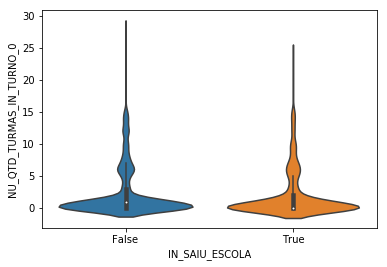

count   8183.00
mean       2.27
std        3.80
min        0.00
25%        0.00
50%        1.00
75%        2.00
max       28.00
Name: NU_QTD_TURMAS_IN_TURNO_0, dtype: float64

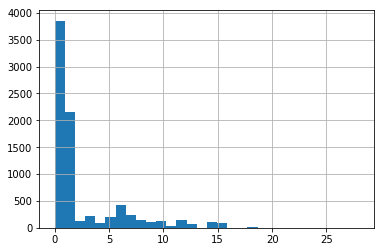

'0.04885794552339074% de registros nulos'

'Variância: 10.481435046687439'

'Correlacao:'

...
NU_QTD_TURMAS_IN_TURNO_1 ...
IN_SAIU_ESCOLA           ...

[2 rows x 2 columns]

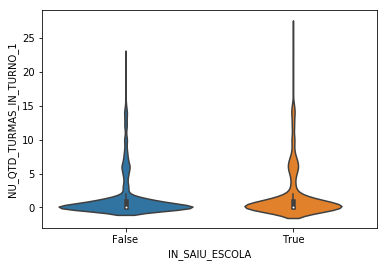

count   8183.00
mean       1.61
std        3.24
min        0.00
25%        0.00
50%        0.00
75%        1.00
max       26.00
Name: NU_QTD_TURMAS_IN_TURNO_1, dtype: float64

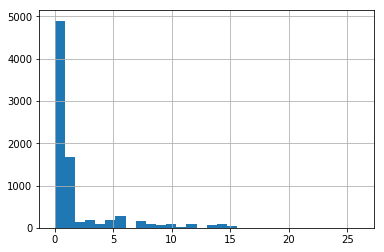

'0.04885794552339074% de registros nulos'

'Variância: 18.265625'

'Correlacao:'

NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS  IN_SAIU_ESCOLA
NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS                                1.00            0.04
IN_SAIU_ESCOLA                                                    0.04            1.00

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


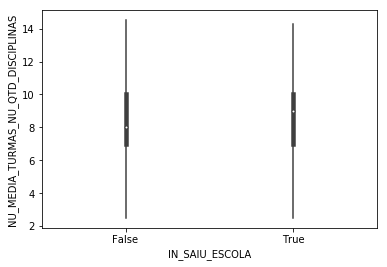

count   8183.00
mean        inf
std        4.27
min        0.00
25%        7.00
50%        8.00
75%       10.00
max       16.00
Name: NU_MEDIA_TURMAS_NU_QTD_DISCIPLINAS, dtype: float64

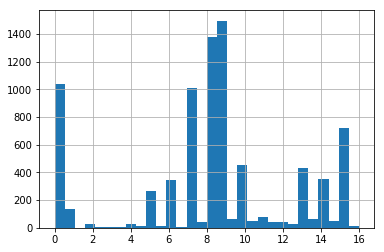

'0.04885794552339074% de registros nulos'

'Variância: 1841.5069352604264'

'Correlacao:'

...
NU_MEDIA_TURMAS_NU_QTD_ALUNOS ...
IN_SAIU_ESCOLA                ...

[2 rows x 2 columns]

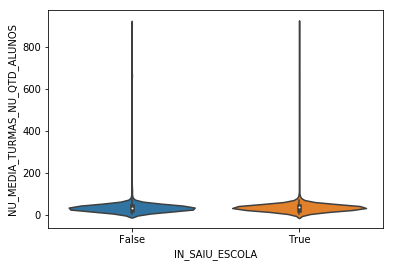

count   8183.00
mean      34.42
std       42.91
min        1.00
25%       22.00
50%       31.61
75%       41.75
max      910.00
Name: NU_MEDIA_TURMAS_NU_QTD_ALUNOS, dtype: float64

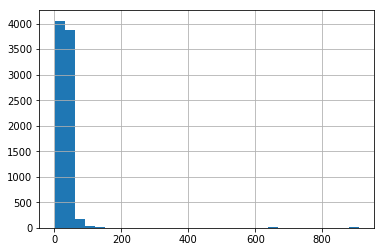

'0.04885794552339074% de registros nulos'

'Variância: 0.0170135498046875'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0  IN_SAIU_ESCOLA
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0                                     1.00            0.04
IN_SAIU_ESCOLA                                                              0.04            1.00

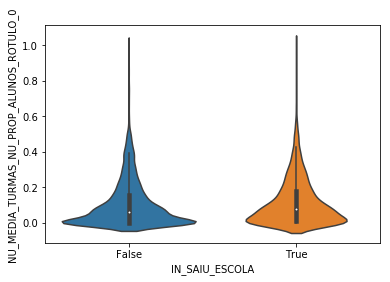

count   8183.00
mean       0.11
std        0.13
min        0.00
25%        0.00
50%        0.07
75%        0.17
max        1.00
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_0, dtype: float64

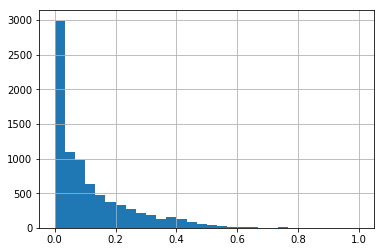

'0.04885794552339074% de registros nulos'

'Variância: 0.05584716796875'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_1  IN_SAIU_ESCOLA
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_1                                     1.00           -0.06
IN_SAIU_ESCOLA                                                             -0.06            1.00

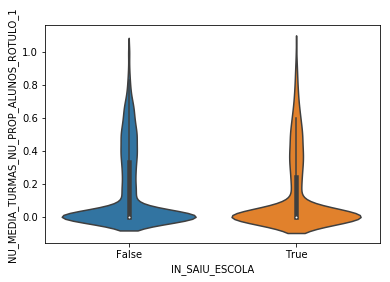

count   8183.00
mean       0.16
std        0.24
min        0.00
25%        0.00
50%        0.00
75%        0.31
max        1.00
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_1, dtype: float64

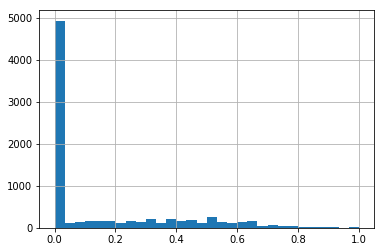

'0.04885794552339074% de registros nulos'

'Variância: 0.055694580078125'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2  IN_SAIU_ESCOLA
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2                                     1.00            0.06
IN_SAIU_ESCOLA                                                              0.06            1.00

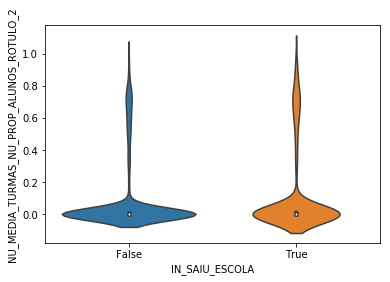

count   8183.00
mean       0.10
std        0.24
min        0.00
25%        0.00
50%        0.00
75%        0.01
max        1.00
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_2, dtype: float64

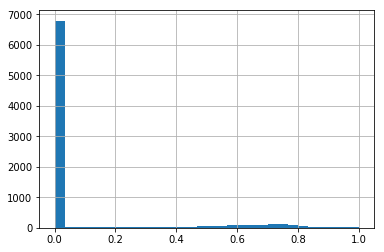

'0.04885794552339074% de registros nulos'

'Variância: 0.00708770751953125'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3  IN_SAIU_ESCOLA
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3                                     1.00            0.04
IN_SAIU_ESCOLA                                                              0.04            1.00

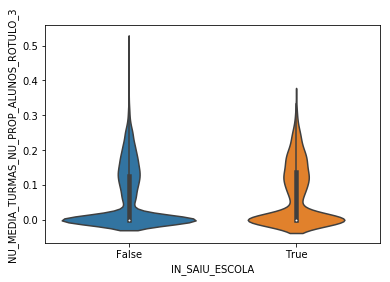

count   8183.00
mean       0.06
std        0.08
min        0.00
25%        0.00
50%        0.00
75%        0.13
max        0.50
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_3, dtype: float64

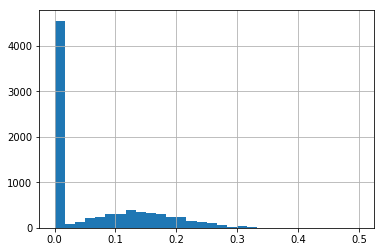

'0.04885794552339074% de registros nulos'

'Variância: 0.04608154296875'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4  IN_SAIU_ESCOLA
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4                                     1.00           -0.06
IN_SAIU_ESCOLA                                                             -0.06            1.00

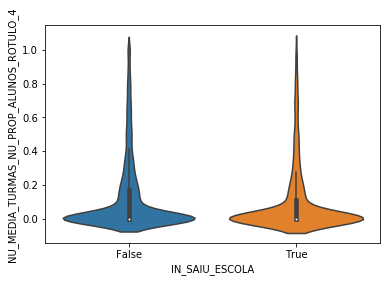

count   8183.00
mean       0.12
std        0.21
min        0.00
25%        0.00
50%        0.00
75%        0.15
max        1.00
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_4, dtype: float64

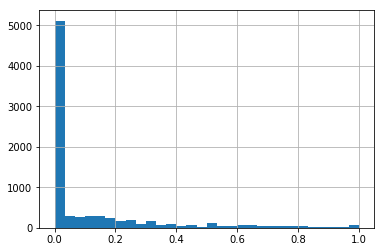

'0.04885794552339074% de registros nulos'

'Variância: 0.0231781005859375'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_5  IN_SAIU_ESCOLA
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_5                                     1.00            0.05
IN_SAIU_ESCOLA                                                              0.05            1.00

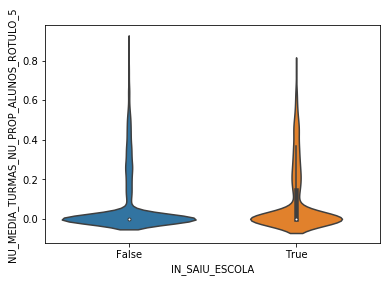

count   8183.00
mean       0.08
std        0.15
min        0.00
25%        0.00
50%        0.00
75%        0.05
max        0.88
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_5, dtype: float64

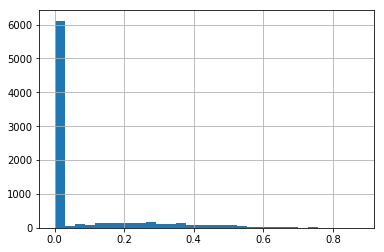

'0.04885794552339074% de registros nulos'

'Variância: 0.06524658203125'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_6  IN_SAIU_ESCOLA
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_6                                     1.00           -0.01
IN_SAIU_ESCOLA                                                             -0.01            1.00

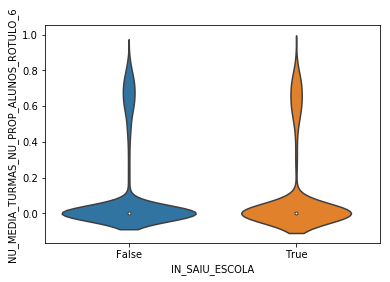

count   8183.00
mean       0.12
std        0.26
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.89
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_6, dtype: float64

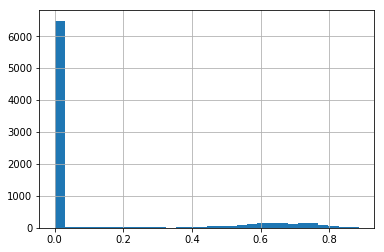

'0.04885794552339074% de registros nulos'

'Variância: 0.0216064453125'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_7  IN_SAIU_ESCOLA
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_7                                     1.00           -0.06
IN_SAIU_ESCOLA                                                             -0.06            1.00

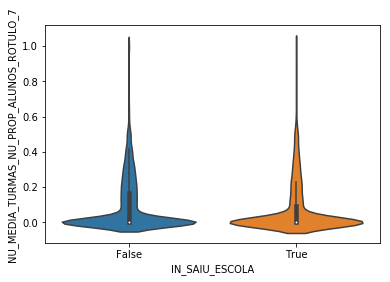

count   8183.00
mean       0.09
std        0.15
min        0.00
25%        0.00
50%        0.00
75%        0.15
max        1.00
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_7, dtype: float64

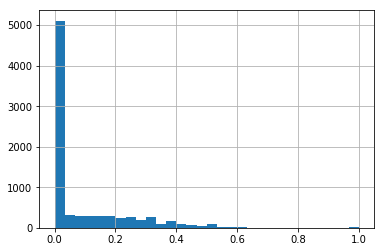

'0.04885794552339074% de registros nulos'

'Variância: 0.0234375'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_8  IN_SAIU_ESCOLA
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_8                                     1.00            0.07
IN_SAIU_ESCOLA                                                              0.07            1.00

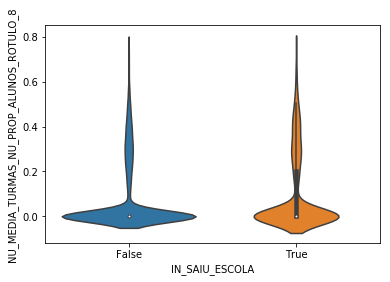

count   8183.00
mean       0.08
std        0.15
min        0.00
25%        0.00
50%        0.00
75%        0.03
max        0.75
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_8, dtype: float64

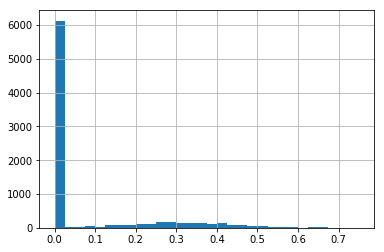

'0.04885794552339074% de registros nulos'

'Variância: 0.01343536376953125'

'Correlacao:'

NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9  IN_SAIU_ESCOLA
NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9                                     1.00           -0.02
IN_SAIU_ESCOLA                                                             -0.02            1.00

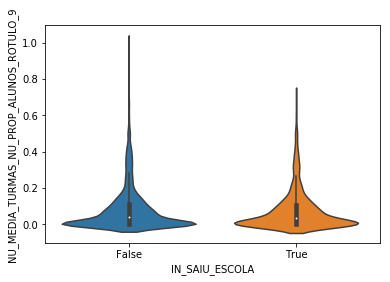

count   8183.00
mean       0.08
std        0.12
min        0.00
25%        0.00
50%        0.04
75%        0.11
max        1.00
Name: NU_MEDIA_TURMAS_NU_PROP_ALUNOS_ROTULO_9, dtype: float64

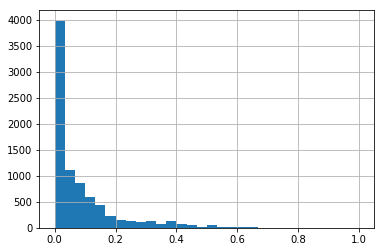

'0.04885794552339074% de registros nulos'

'Variância: 18.683754854466134'

'Correlacao:'

...
NU_QTD_TURMAS_PROF_ESCOLA ...
IN_SAIU_ESCOLA            ...

[2 rows x 2 columns]

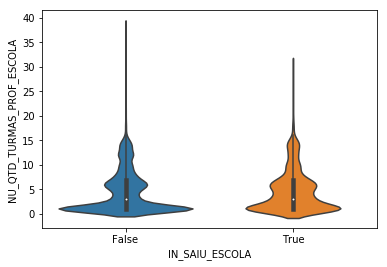

count   8183.00
mean       4.58
std        4.32
min        1.00
25%        1.00
50%        3.00
75%        7.00
max       38.00
Name: NU_QTD_TURMAS_PROF_ESCOLA, dtype: float64

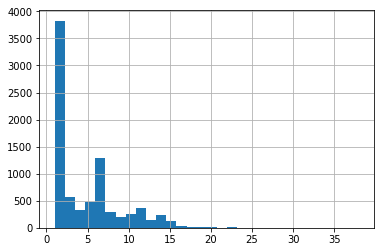

'0.0% de registros nulos'

'Variância: 0.2500215835017713'

'Correlacao:'

IN_NASCEU_DF_PROF  IN_SAIU_ESCOLA
IN_NASCEU_DF_PROF               1.00            0.06
IN_SAIU_ESCOLA                  0.06            1.00

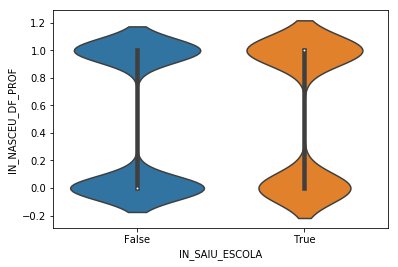

qtd   pc
1  4118 0.50
0  4069 0.50

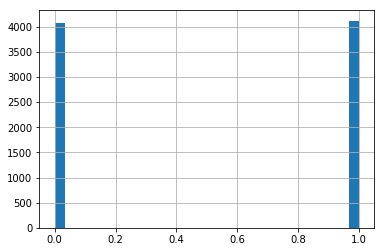

'0.0% de registros nulos'

'Variância: 0.24815539023077285'

'Correlacao:'

IN_ESPECIALIZACAO_PROF  IN_SAIU_ESCOLA
IN_ESPECIALIZACAO_PROF                    1.00           -0.05
IN_SAIU_ESCOLA                           -0.05            1.00

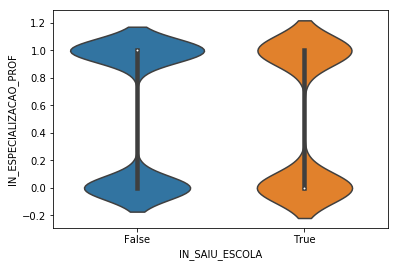

qtd   pc
1.00  4448 0.54
0.00  3739 0.46

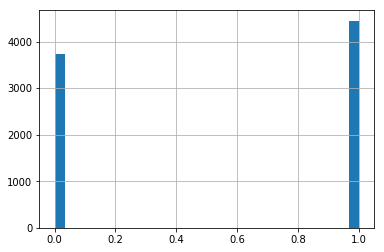

'0.0% de registros nulos'

'Variância: 0.2133683360583722'

'Correlacao:'

TP_COR_RACA_1_PROF  IN_SAIU_ESCOLA
TP_COR_RACA_1_PROF                1.00            0.01
IN_SAIU_ESCOLA                    0.01            1.00

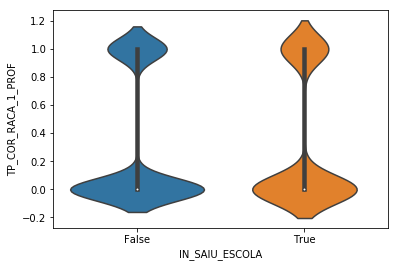

qtd   pc
0  5661 0.69
1  2526 0.31

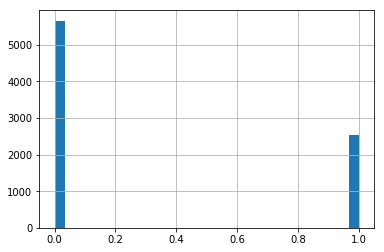

'0.0% de registros nulos'

'Variância: 0.22385429206995539'

'Correlacao:'

TP_COR_RACA_0_PROF  IN_SAIU_ESCOLA
TP_COR_RACA_0_PROF                1.00           -0.02
IN_SAIU_ESCOLA                   -0.02            1.00

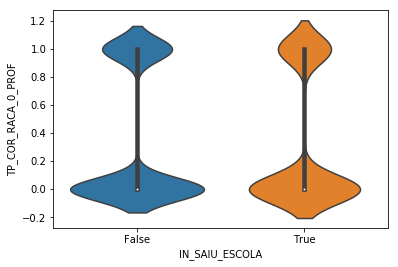

qtd   pc
0  5418 0.66
1  2769 0.34

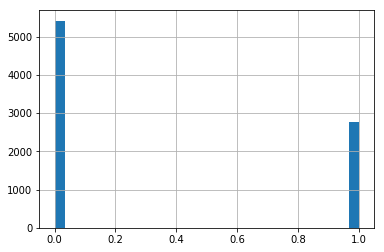

'0.0% de registros nulos'

'Variância: 0.2102159958681175'

'Correlacao:'

TP_COR_RACA_3_PROF  IN_SAIU_ESCOLA
TP_COR_RACA_3_PROF                1.00            0.01
IN_SAIU_ESCOLA                    0.01            1.00

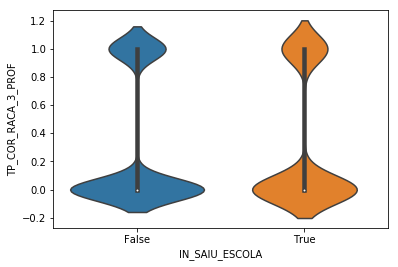

qtd   pc
0  5727 0.70
1  2460 0.30

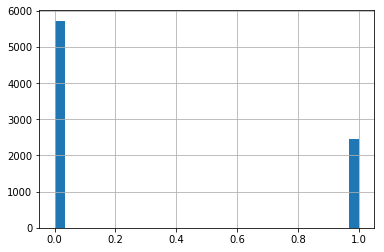

'0.0% de registros nulos'

'Variância: 57.56541263313212'

'Correlacao:'

...
NU_IDADE_REFERENCIA_PROF ...
IN_SAIU_ESCOLA           ...

[2 rows x 2 columns]

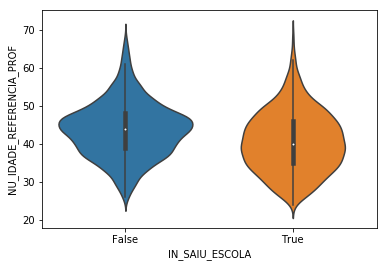

count   8187.00
mean      43.01
std        7.59
min       24.00
25%       38.00
50%       43.00
75%       48.00
max       69.00
Name: NU_IDADE_REFERENCIA_PROF, dtype: float64

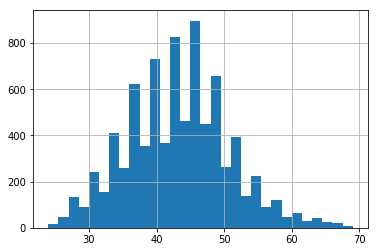

'0.0% de registros nulos'

'Variância: 5.416276261183077'

'Correlacao:'

CO_CLASSE_PROF  IN_SAIU_ESCOLA
CO_CLASSE_PROF            1.00            0.03
IN_SAIU_ESCOLA            0.03            1.00

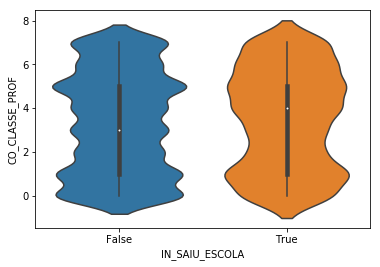

qtd   pc
5  1286 0.16
1  1240 0.15
0  1187 0.14
7   952 0.12
4   951 0.12
3   903 0.11
6   853 0.10
2   815 0.10

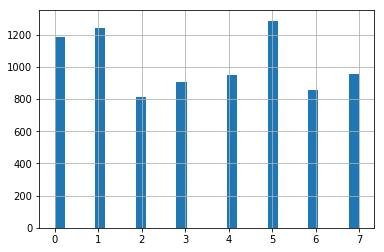

'0.0% de registros nulos'

'Variância: 0.05926513671875'

'Correlacao:'

...
IN_ESGOTO_REDE_PUBLICA_SCHL ...
IN_SAIU_ESCOLA              ...

[2 rows x 2 columns]

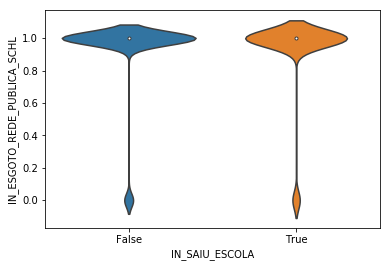

qtd   pc
1.00  7669 0.94
0.00   518 0.06

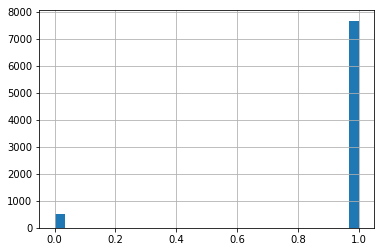

'0.0% de registros nulos'

'Variância: 0.059234619140625'

'Correlacao:'

IN_ESGOTO_FOSSA_SCHL  IN_SAIU_ESCOLA
IN_ESGOTO_FOSSA_SCHL                  1.00            0.01
IN_SAIU_ESCOLA                        0.01            1.00

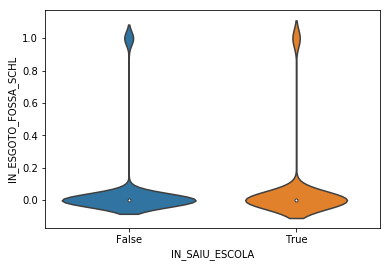

qtd   pc
0.00  7669 0.94
1.00   518 0.06

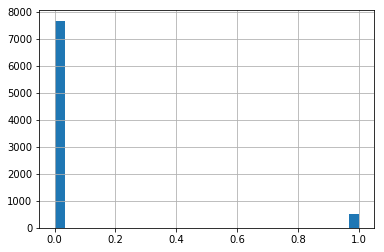

'0.0% de registros nulos'

'Variância: 0.0909423828125'

'Correlacao:'

...
IN_LABORATORIO_INFORMATICA_SCHL ...
IN_SAIU_ESCOLA                  ...

[2 rows x 2 columns]

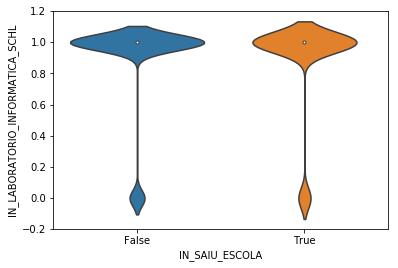

qtd   pc
1.00  7359 0.90
0.00   828 0.10

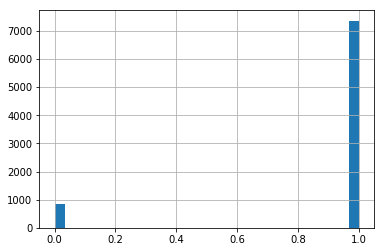

'0.0% de registros nulos'

'Variância: 0.2188720703125'

'Correlacao:'

...
IN_LABORATORIO_CIENCIAS_SCHL ...
IN_SAIU_ESCOLA               ...

[2 rows x 2 columns]

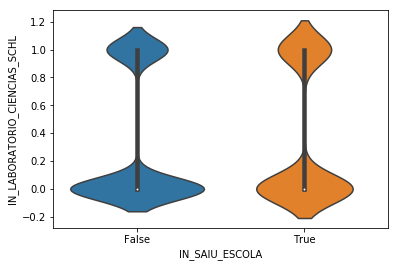

qtd   pc
0.00  5537 0.68
1.00  2650 0.32

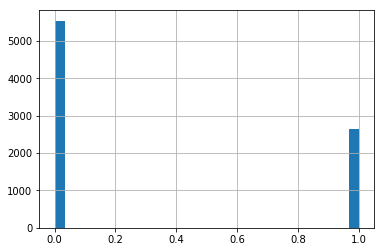

'0.0% de registros nulos'

'Variância: 0.1318359375'

'Correlacao:'

IN_SALA_ATENDIMENTO_ESPECIAL_SCHL  IN_SAIU_ESCOLA
IN_SALA_ATENDIMENTO_ESPECIAL_SCHL                               1.00            0.01
IN_SAIU_ESCOLA                                                  0.01            1.00

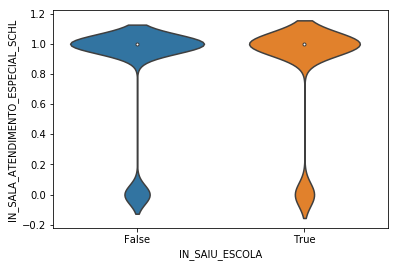

qtd   pc
1.00  6909 0.84
0.00  1278 0.16

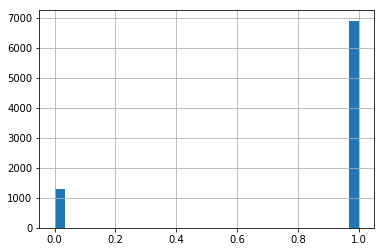

'0.0% de registros nulos'

'Variância: 0.227294921875'

'Correlacao:'

...
IN_QUADRA_ESPORTES_COBERTA_SCHL ...
IN_SAIU_ESCOLA                  ...

[2 rows x 2 columns]

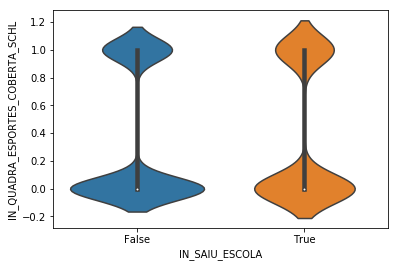

qtd   pc
0.00  5331 0.65
1.00  2856 0.35

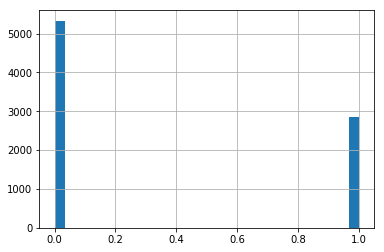

'0.0% de registros nulos'

'Variância: 0.2445068359375'

'Correlacao:'

IN_QUADRA_ESPORTES_DESCOBERTA_SCHL  IN_SAIU_ESCOLA
IN_QUADRA_ESPORTES_DESCOBERTA_SCHL                                1.00           -0.01
IN_SAIU_ESCOLA                                                   -0.01            1.00

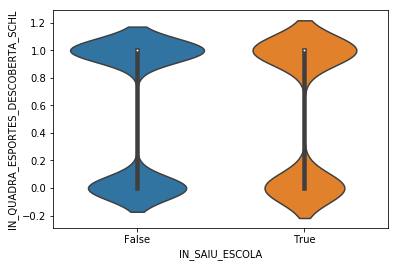

qtd   pc
1.00  4700 0.57
0.00  3487 0.43

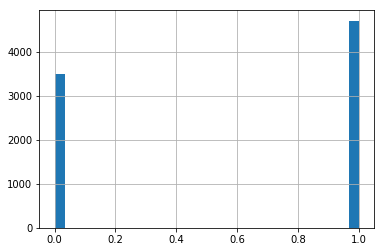

'0.0% de registros nulos'

'Variância: 0.150146484375'

'Correlacao:'

IN_QUADRA_ESPORTES_SCHL  IN_SAIU_ESCOLA
IN_QUADRA_ESPORTES_SCHL                     1.00            0.02
IN_SAIU_ESCOLA                              0.02            1.00

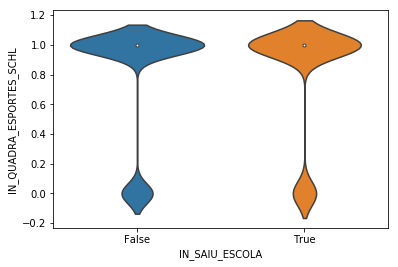

qtd   pc
1.00  6680 0.82
0.00  1507 0.18

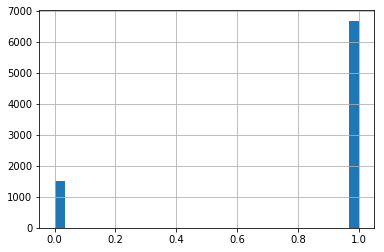

'0.0% de registros nulos'

'Variância: 0.2353515625'

'Correlacao:'

IN_BIBLIOTECA_SCHL  IN_SAIU_ESCOLA
IN_BIBLIOTECA_SCHL                1.00            0.02
IN_SAIU_ESCOLA                    0.02            1.00

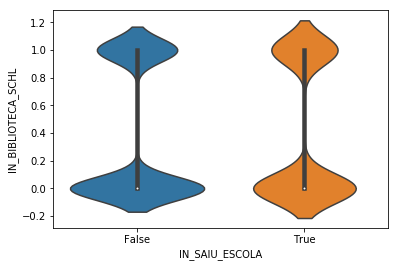

qtd   pc
0.00  5085 0.62
1.00  3102 0.38

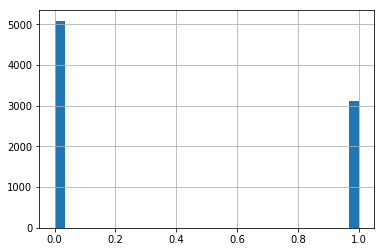

'0.0% de registros nulos'

'Variância: 0.1727294921875'

'Correlacao:'

IN_SALA_LEITURA_SCHL  IN_SAIU_ESCOLA
IN_SALA_LEITURA_SCHL                  1.00            0.03
IN_SAIU_ESCOLA                        0.03            1.00

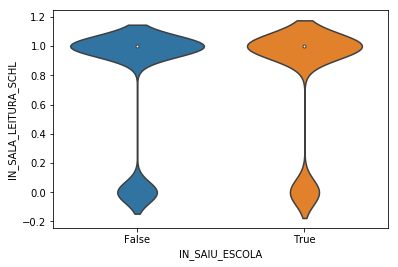

qtd   pc
1.00  6369 0.78
0.00  1818 0.22

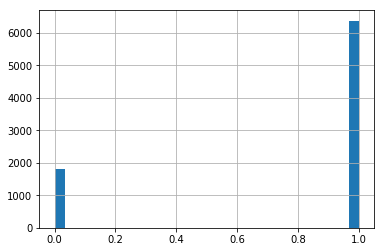

'0.0% de registros nulos'

'Variância: 0.047454833984375'

'Correlacao:'

...
IN_BIBLIOTECA_SALA_LEITURA_SCHL ...
IN_SAIU_ESCOLA                  ...

[2 rows x 2 columns]

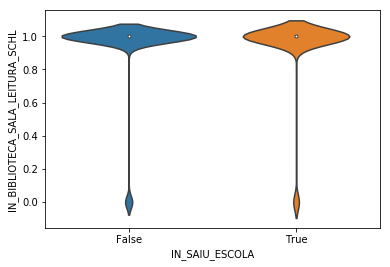

qtd   pc
1.00  7778 0.95
0.00   409 0.05

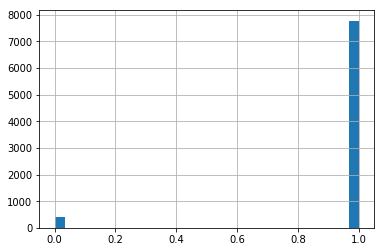

'0.0% de registros nulos'

'Variância: 0.22900390625'

'Correlacao:'

IN_PARQUE_INFANTIL_SCHL  IN_SAIU_ESCOLA
IN_PARQUE_INFANTIL_SCHL                     1.00           -0.06
IN_SAIU_ESCOLA                             -0.06            1.00

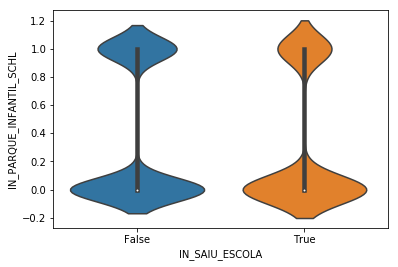

qtd   pc
0.00  5282 0.65
1.00  2905 0.35

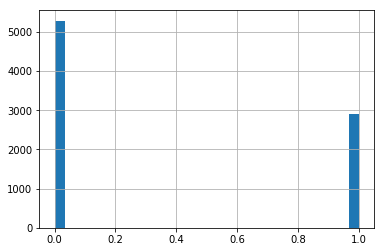

'0.0% de registros nulos'

'Variância: 0.18701171875'

'Correlacao:'

IN_BANHEIRO_EI_SCHL  IN_SAIU_ESCOLA
IN_BANHEIRO_EI_SCHL                 1.00           -0.05
IN_SAIU_ESCOLA                     -0.05            1.00

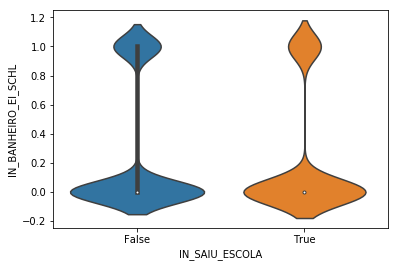

qtd   pc
0.00  6148 0.75
1.00  2039 0.25

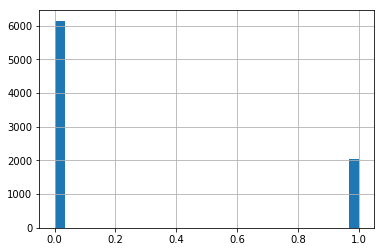

'0.0% de registros nulos'

'Variância: 0.136474609375'

'Correlacao:'

IN_BANHEIRO_PNE_SCHL  IN_SAIU_ESCOLA
IN_BANHEIRO_PNE_SCHL                  1.00           -0.03
IN_SAIU_ESCOLA                       -0.03            1.00

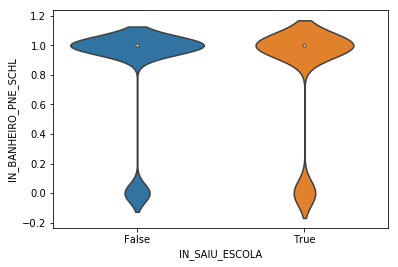

qtd   pc
1.00  6852 0.84
0.00  1335 0.16

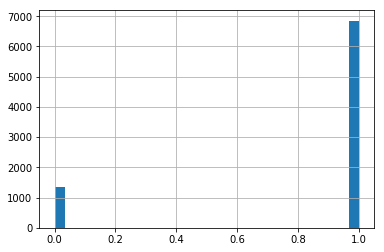

'0.0% de registros nulos'

'Variância: 0.2076416015625'

'Correlacao:'

...
IN_DEPENDENCIAS_PNE_SCHL ...
IN_SAIU_ESCOLA           ...

[2 rows x 2 columns]

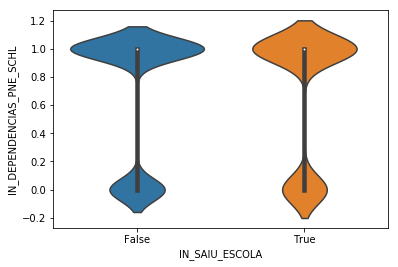

qtd   pc
1.00  5779 0.71
0.00  2408 0.29

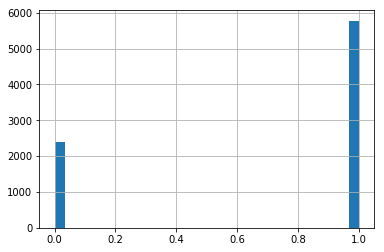

'0.0% de registros nulos'

'Variância: 0.245361328125'

'Correlacao:'

...
IN_BANHEIRO_CHUVEIRO_SCHL ...
IN_SAIU_ESCOLA            ...

[2 rows x 2 columns]

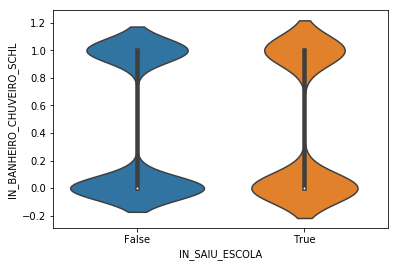

qtd   pc
0.00  4660 0.57
1.00  3527 0.43

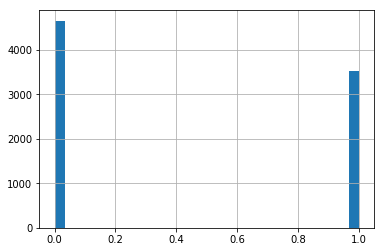

'0.0% de registros nulos'

'Variância: 0.177734375'

'Correlacao:'

IN_REFEITORIO_SCHL  IN_SAIU_ESCOLA
IN_REFEITORIO_SCHL                1.00           -0.02
IN_SAIU_ESCOLA                   -0.02            1.00

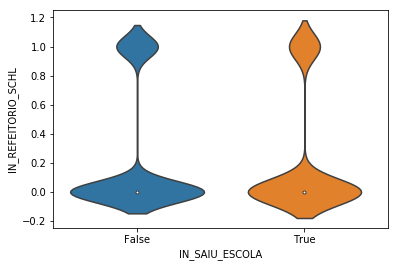

qtd   pc
0.00  6294 0.77
1.00  1893 0.23

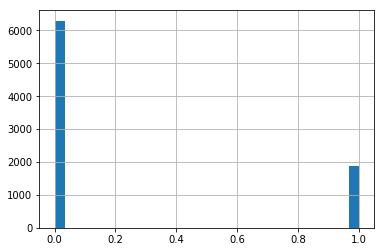

'0.0% de registros nulos'

'Variância: 0.2235107421875'

'Correlacao:'

IN_DESPENSA_SCHL  IN_SAIU_ESCOLA
IN_DESPENSA_SCHL              1.00           -0.01
IN_SAIU_ESCOLA               -0.01            1.00

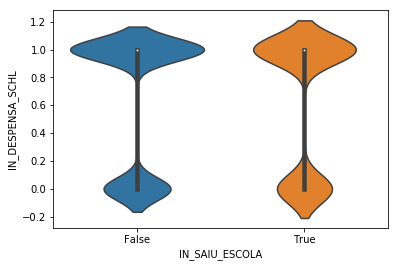

qtd   pc
1.00  5426 0.66
0.00  2761 0.34

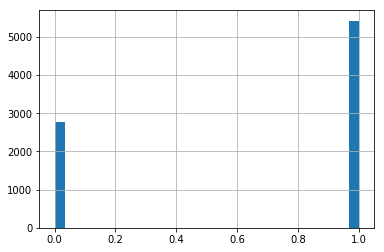

'0.0% de registros nulos'

'Variância: 0.2010498046875'

'Correlacao:'

IN_ALMOXARIFADO_SCHL  IN_SAIU_ESCOLA
IN_ALMOXARIFADO_SCHL                  1.00           -0.00
IN_SAIU_ESCOLA                       -0.00            1.00

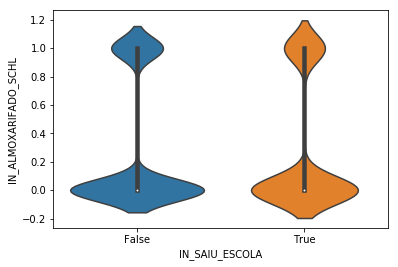

qtd   pc
0.00  5908 0.72
1.00  2279 0.28

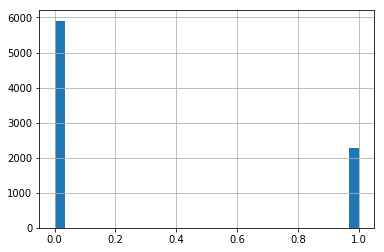

'0.0% de registros nulos'

'Variância: 0.1580810546875'

'Correlacao:'

IN_AUDITORIO_SCHL  IN_SAIU_ESCOLA
IN_AUDITORIO_SCHL               1.00           -0.04
IN_SAIU_ESCOLA                 -0.04            1.00

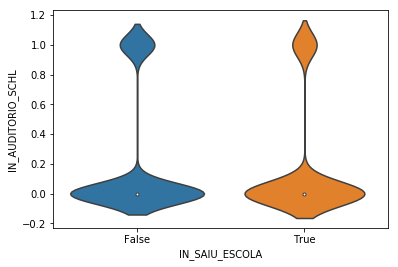

qtd   pc
0.00  6576 0.80
1.00  1611 0.20

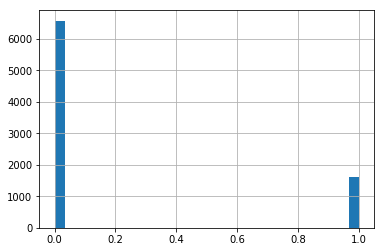

'0.0% de registros nulos'

'Variância: 0.2069091796875'

'Correlacao:'

IN_PATIO_COBERTO_SCHL  IN_SAIU_ESCOLA
IN_PATIO_COBERTO_SCHL                   1.00            0.03
IN_SAIU_ESCOLA                          0.03            1.00

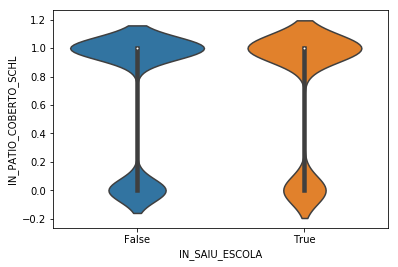

qtd   pc
1.00  5792 0.71
0.00  2395 0.29

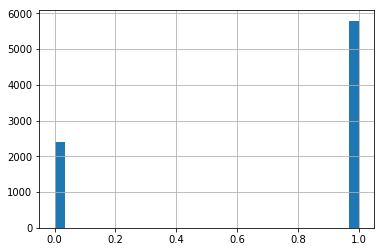

'0.0% de registros nulos'

'Variância: 0.235107421875'

'Correlacao:'

...
IN_PATIO_DESCOBERTO_SCHL ...
IN_SAIU_ESCOLA           ...

[2 rows x 2 columns]

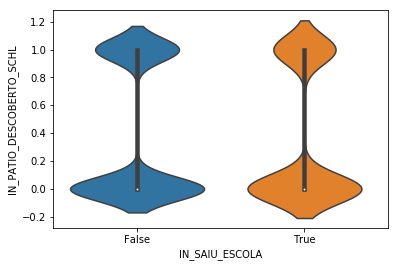

qtd   pc
0.00  5098 0.62
1.00  3089 0.38

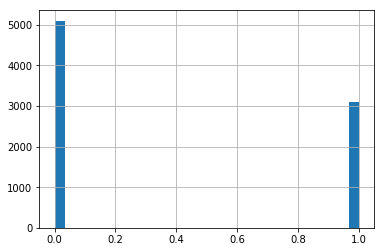

'0.0% de registros nulos'

'Variância: 0.249755859375'

'Correlacao:'

IN_AREA_VERDE_SCHL  IN_SAIU_ESCOLA
IN_AREA_VERDE_SCHL                1.00           -0.00
IN_SAIU_ESCOLA                   -0.00            1.00

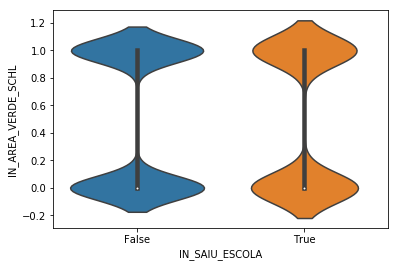

qtd   pc
0.00  4127 0.50
1.00  4060 0.50

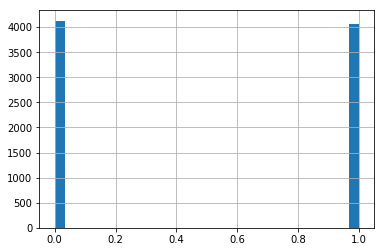

'0.0% de registros nulos'

'Variância: 50.65625'

'Correlacao:'

...
NU_SALAS_EXISTENTES_SCHL ...
IN_SAIU_ESCOLA           ...

[2 rows x 2 columns]

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:102: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


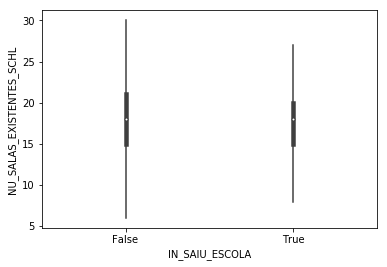

count   8187.00
mean        inf
std        7.12
min        2.00
25%       15.00
50%       18.00
75%       21.00
max       84.00
Name: NU_SALAS_EXISTENTES_SCHL, dtype: float64

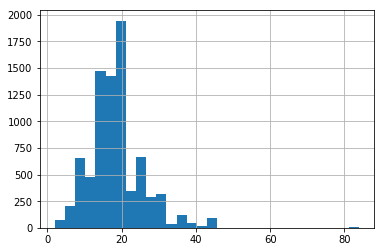

'0.0% de registros nulos'

'Variância: 0.2379150390625'

'Correlacao:'

...
IN_EQUIP_VIDEOCASSETE_SCHL ...
IN_SAIU_ESCOLA             ...

[2 rows x 2 columns]

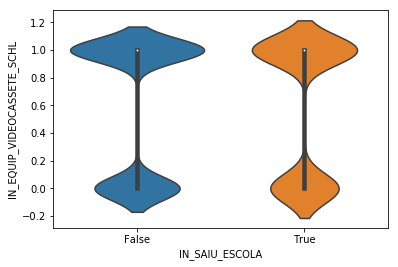

qtd   pc
1.00  4995 0.61
0.00  3192 0.39

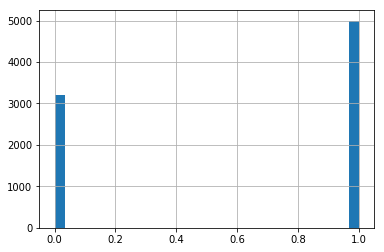

'0.0% de registros nulos'

'Variância: 0.2364501953125'

'Correlacao:'

...
IN_EQUIP_PARABOLICA_SCHL ...
IN_SAIU_ESCOLA           ...

[2 rows x 2 columns]

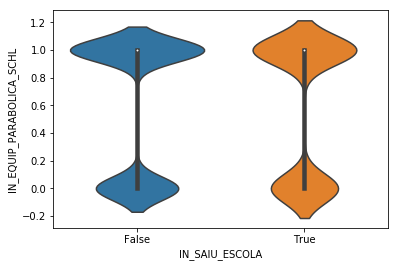

qtd   pc
1.00  5047 0.62
0.00  3140 0.38

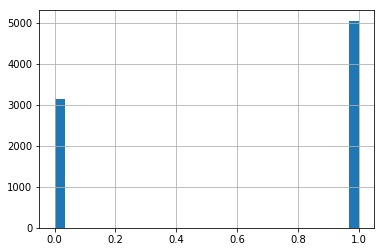

'0.0% de registros nulos'

'Variância: 0.1605224609375'

'Correlacao:'

...
IN_EQUIP_RETROPROJETOR_SCHL ...
IN_SAIU_ESCOLA              ...

[2 rows x 2 columns]

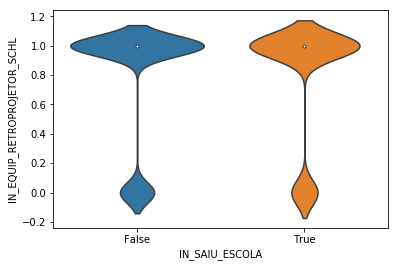

qtd   pc
1.00  6542 0.80
0.00  1645 0.20

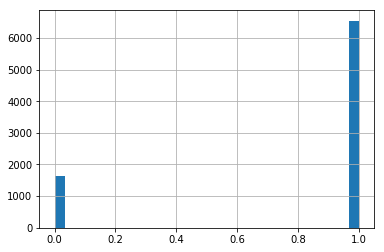

'0.0% de registros nulos'

'Variância: 0.2144775390625'

'Correlacao:'

...
IN_EQUIP_IMPRESSORA_MULT_SCHL ...
IN_SAIU_ESCOLA                ...

[2 rows x 2 columns]

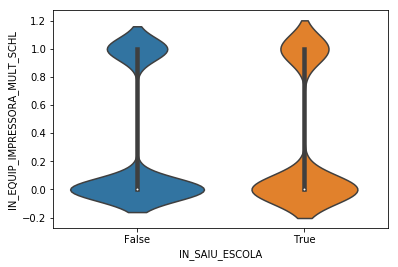

qtd   pc
0.00  5637 0.69
1.00  2550 0.31

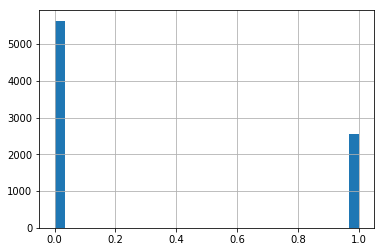

'0.0% de registros nulos'

'Variância: 0.248779296875'

'Correlacao:'

IN_EQUIP_FAX_SCHL  IN_SAIU_ESCOLA
IN_EQUIP_FAX_SCHL               1.00           -0.03
IN_SAIU_ESCOLA                 -0.03            1.00

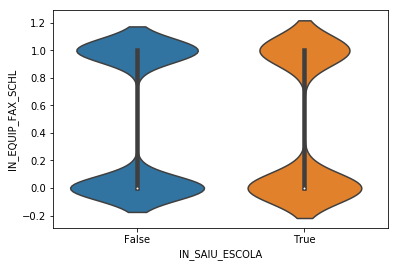

qtd   pc
0.00  4359 0.53
1.00  3828 0.47

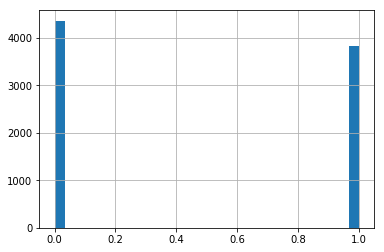

'0.0% de registros nulos'

'Variância: 0.2171630859375'

'Correlacao:'

IN_EQUIP_FOTO_SCHL  IN_SAIU_ESCOLA
IN_EQUIP_FOTO_SCHL                1.00           -0.03
IN_SAIU_ESCOLA                   -0.03            1.00

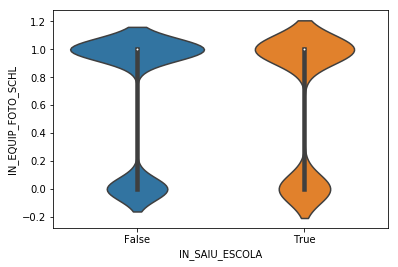

qtd   pc
1.00  5577 0.68
0.00  2610 0.32

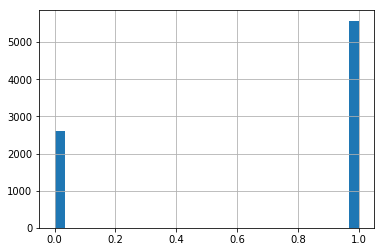

'0.0% de registros nulos'

'Variância: inf'

'Correlacao:'

NU_COMPUTADOR_SCHL  IN_SAIU_ESCOLA
NU_COMPUTADOR_SCHL                1.00           -0.06
IN_SAIU_ESCOLA                   -0.06            1.00

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:102: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


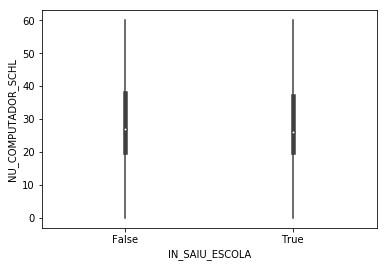

count   8187.00
mean        inf
std         inf
min        0.00
25%       20.00
50%       26.00
75%       38.00
max      639.00
Name: NU_COMPUTADOR_SCHL, dtype: float64

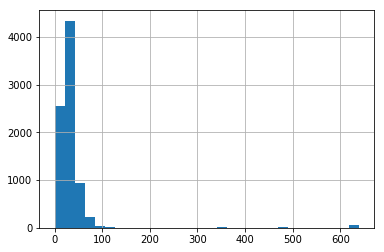

'0.0% de registros nulos'

'Variância: 50.71875'

'Correlacao:'

...
NU_COMP_ADMINISTRATIVO_SCHL ...
IN_SAIU_ESCOLA              ...

[2 rows x 2 columns]

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


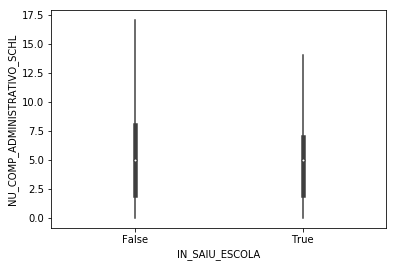

count   8187.00
mean       5.95
std        7.12
min        0.00
25%        2.00
50%        5.00
75%        7.00
max       53.00
Name: NU_COMP_ADMINISTRATIVO_SCHL, dtype: float64

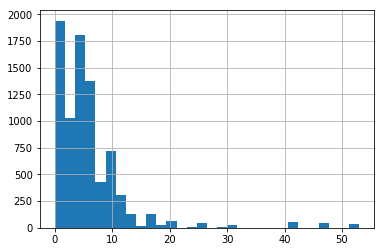

'0.0% de registros nulos'

'Variância: 191.25'

'Correlacao:'

NU_COMP_ALUNO_SCHL  IN_SAIU_ESCOLA
NU_COMP_ALUNO_SCHL                1.00           -0.01
IN_SAIU_ESCOLA                   -0.01            1.00

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:102: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


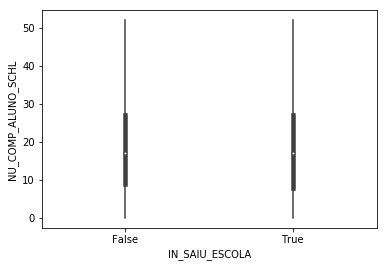

count   8187.00
mean        inf
std       13.83
min        0.00
25%        9.00
50%       17.00
75%       27.00
max       80.00
Name: NU_COMP_ALUNO_SCHL, dtype: float64

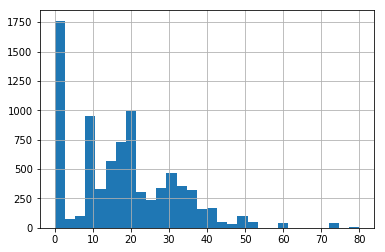

'0.0% de registros nulos'

'Variância: inf'

'Correlacao:'

NU_FUNCIONARIOS_SCHL  IN_SAIU_ESCOLA
NU_FUNCIONARIOS_SCHL                  1.00           -0.04
IN_SAIU_ESCOLA                       -0.04            1.00

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:102: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


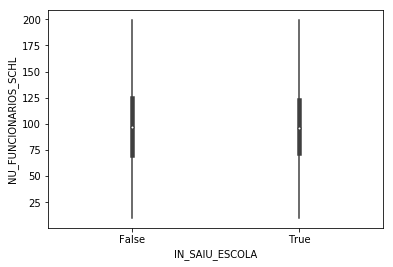

count   8187.00
mean        inf
std         inf
min       10.00
25%       70.00
50%       96.00
75%      125.00
max      392.00
Name: NU_FUNCIONARIOS_SCHL, dtype: float64

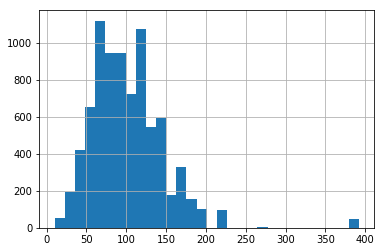

'0.0% de registros nulos'

'Variância: 0.211669921875'

'Correlacao:'

TP_AEE_SCHL  IN_SAIU_ESCOLA
TP_AEE_SCHL            1.00            0.01
IN_SAIU_ESCOLA         0.01            1.00

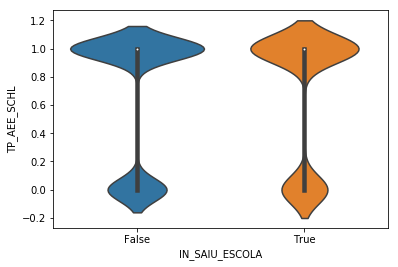

qtd   pc
1.00  5697 0.70
0.00  2490 0.30

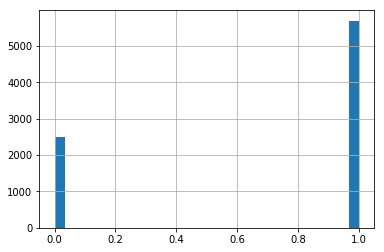

'0.0% de registros nulos'

'Variância: 0.24072265625'

'Correlacao:'

...
TP_ATIVIDADE_COMPLEMENTAR_SCHL ...
IN_SAIU_ESCOLA                 ...

[2 rows x 2 columns]

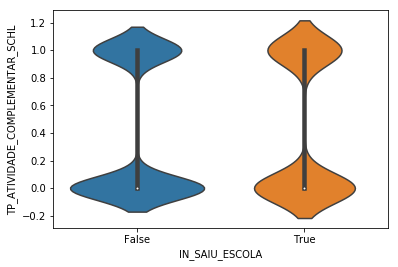

qtd   pc
0.00  4882 0.60
1.00  3305 0.40

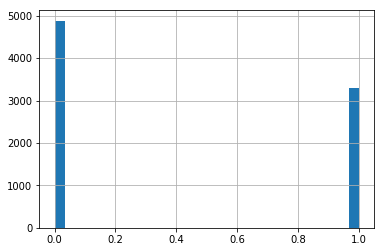

'0.0% de registros nulos'

'Variância: 0.1807861328125'

'Correlacao:'

IN_FINAL_SEMANA_SCHL  IN_SAIU_ESCOLA
IN_FINAL_SEMANA_SCHL                  1.00            0.00
IN_SAIU_ESCOLA                        0.00            1.00

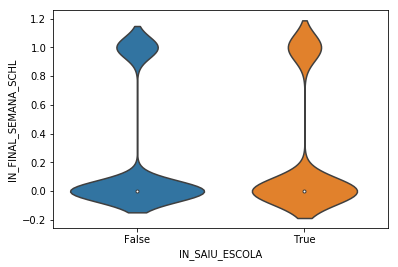

qtd   pc
0.00  6248 0.76
1.00  1939 0.24

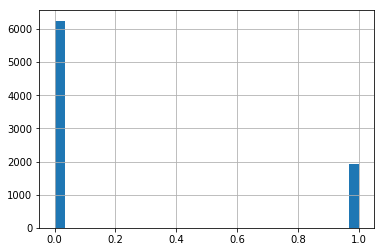

'0.0% de registros nulos'

'Variância: 3.125'

'Correlacao:'

...
NU_PROP_FUNS_SALAS_UTZD_SCHL ...
IN_SAIU_ESCOLA               ...

[2 rows x 2 columns]

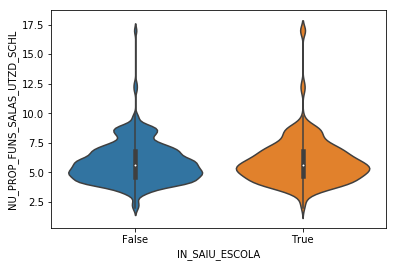

count   8187.00
mean       5.86
std        1.77
min        2.00
25%        4.64
50%        5.60
75%        6.80
max       17.00
Name: NU_PROP_FUNS_SALAS_UTZD_SCHL, dtype: float64

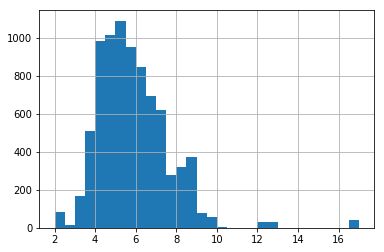

'0.0% de registros nulos'

'Variância: 5.3203125'

'Correlacao:'

...
NU_PROP_CPU_SALAS_UTZD_SCHL ...
IN_SAIU_ESCOLA              ...

[2 rows x 2 columns]

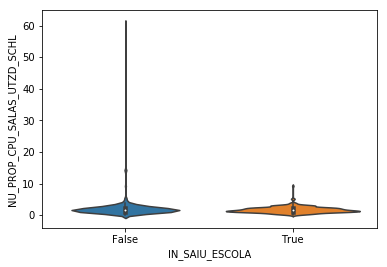

count   8187.00
mean       1.94
std        2.31
min        0.00
25%        1.14
50%        1.67
75%        2.33
max       60.75
Name: NU_PROP_CPU_SALAS_UTZD_SCHL, dtype: float64

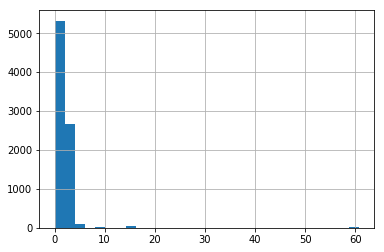

'0.0% de registros nulos'

'Variância: 9991.839307136319'

'Correlacao:'

...
NU_QTD_SETORES_CENSITARIOS_SCHL ...
IN_SAIU_ESCOLA                  ...

[2 rows x 2 columns]

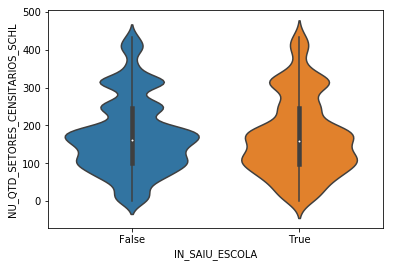

count   8187.00
mean     174.25
std       99.96
min        1.00
25%      100.00
50%      159.00
75%      247.00
max      432.00
Name: NU_QTD_SETORES_CENSITARIOS_SCHL, dtype: float64

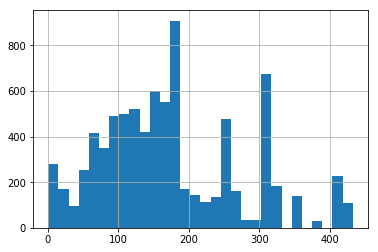

'0.0% de registros nulos'

'Variância: 0.061737060546875'

'Correlacao:'

NU_MEDIA_DISTANCIA_ESCOLA_SETOR_SCHL  IN_SAIU_ESCOLA
NU_MEDIA_DISTANCIA_ESCOLA_SETOR_SCHL                                  1.00           -0.03
IN_SAIU_ESCOLA                                                       -0.03            1.00

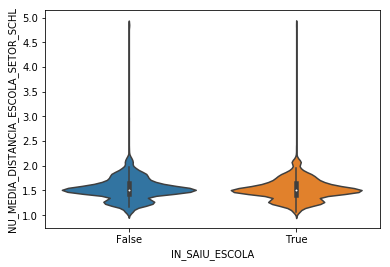

count   8187.00
mean       1.54
std        0.25
min        1.04
25%        1.43
50%        1.52
75%        1.65
max        4.85
Name: NU_MEDIA_DISTANCIA_ESCOLA_SETOR_SCHL, dtype: float64

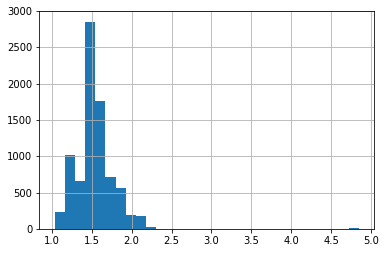

'0.0% de registros nulos'

'Variância: inf'

'Correlacao:'

...
NU_MEDIANA_RENDA_MEDIA_SCHL ...
IN_SAIU_ESCOLA              ...

[2 rows x 2 columns]

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:102: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


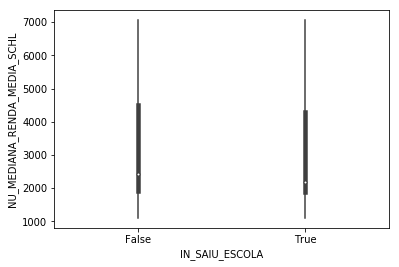

count    8187.00
mean         inf
std          inf
min      1101.00
25%      1897.00
50%      2356.00
75%      4500.00
max     14048.00
Name: NU_MEDIANA_RENDA_MEDIA_SCHL, dtype: float64

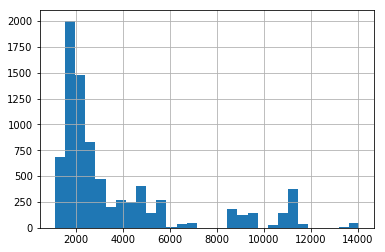

'0.0% de registros nulos'

'Variância: 322.25'

'Correlacao:'

...
NU_MEDIANA_QTD_DOMICILIOS_SCHL ...
IN_SAIU_ESCOLA                 ...

[2 rows x 2 columns]

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:102: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


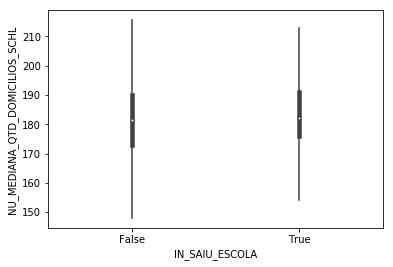

count   8187.00
mean        inf
std       17.95
min       34.00
25%      173.00
50%      182.00
75%      191.00
max      215.50
Name: NU_MEDIANA_QTD_DOMICILIOS_SCHL, dtype: float64

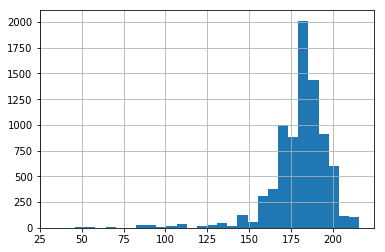

'0.0% de registros nulos'

'Variância: inf'

'Correlacao:'

...
NU_MEDIANA_QTD_PESSOAS_SCHL ...
IN_SAIU_ESCOLA              ...

[2 rows x 2 columns]

/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:102: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:133: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/function_base.py:142: RuntimeWarning: invalid value encountered in add
  y += start
/home/itsbarreto/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


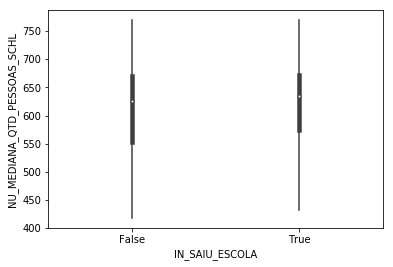

count   8187.00
mean        inf
std         inf
min      105.00
25%      563.00
50%      625.00
75%      669.50
max      769.00
Name: NU_MEDIANA_QTD_PESSOAS_SCHL, dtype: float64

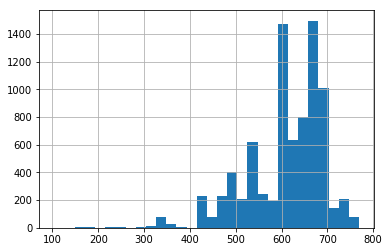

'0.0% de registros nulos'

'Variância: 442255663.23516905'

'Correlacao:'

...
NU_SOMA_QTD_DOMICILIOS_SCHL ...
IN_SAIU_ESCOLA              ...

[2 rows x 2 columns]

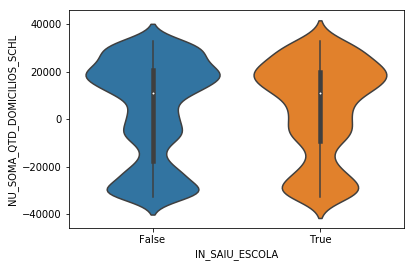

count     8187.00
mean      4115.38
std      21029.88
min     -32721.00
25%     -12460.00
50%      11028.00
75%      20820.00
max      32697.00
Name: NU_SOMA_QTD_DOMICILIOS_SCHL, dtype: float64

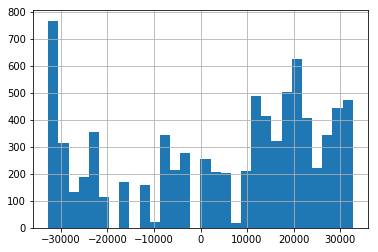

'0.0% de registros nulos'

'Variância: 306015271.82744193'

'Correlacao:'

...
NU_SOMA_QTD_PESSOAS_SCHL ...
IN_SAIU_ESCOLA           ...

[2 rows x 2 columns]

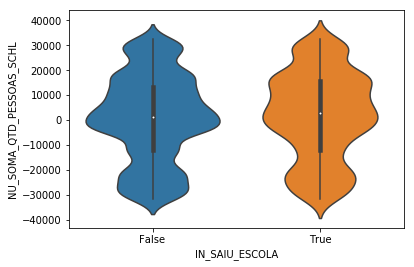

count     8187.00
mean       953.74
std      17493.29
min     -31623.00
25%     -11865.00
50%       1910.00
75%      13985.00
max      32356.00
Name: NU_SOMA_QTD_PESSOAS_SCHL, dtype: float64

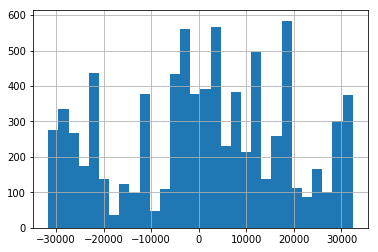

'0.0% de registros nulos'

'Variância: 0.004791259765625'

'Correlacao:'

...
NU_PROP_DOM_ALUGADOS_SCHL ...
IN_SAIU_ESCOLA            ...

[2 rows x 2 columns]

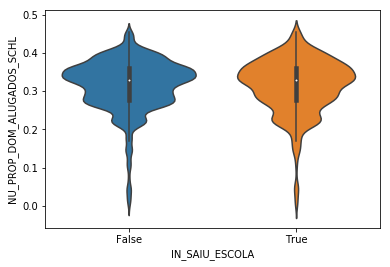

count   8187.00
mean       0.32
std        0.07
min        0.00
25%        0.28
50%        0.33
75%        0.36
max        0.45
Name: NU_PROP_DOM_ALUGADOS_SCHL, dtype: float64

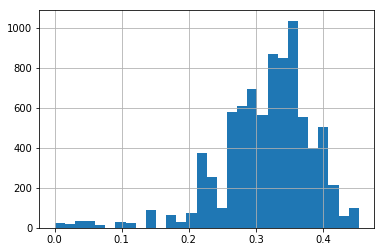

'0.0% de registros nulos'

'Variância: 0.00321197509765625'

'Correlacao:'

...
NU_PROP_DOM_CEDIDOS_SCHL ...
IN_SAIU_ESCOLA           ...

[2 rows x 2 columns]

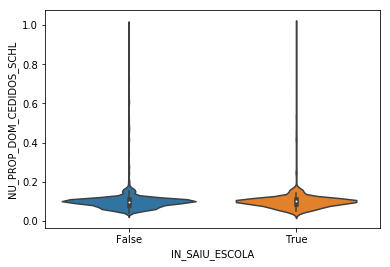

count   8187.00
mean       0.10
std        0.06
min        0.04
25%        0.08
50%        0.10
75%        0.11
max        1.00
Name: NU_PROP_DOM_CEDIDOS_SCHL, dtype: float64

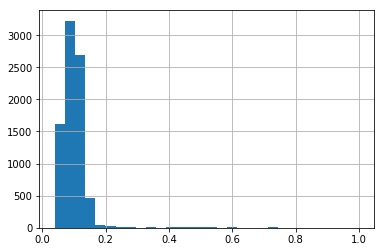

'0.0% de registros nulos'

'Variância: 0.00093841552734375'

'Correlacao:'

...
NU_PROP_DOM_EM_AQUISICAO_SCHL ...
IN_SAIU_ESCOLA                ...

[2 rows x 2 columns]

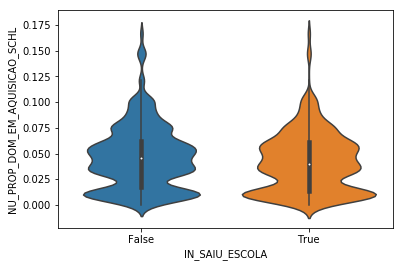

count   8187.00
mean       0.05
std        0.03
min        0.00
25%        0.02
50%        0.04
75%        0.06
max        0.17
Name: NU_PROP_DOM_EM_AQUISICAO_SCHL, dtype: float64

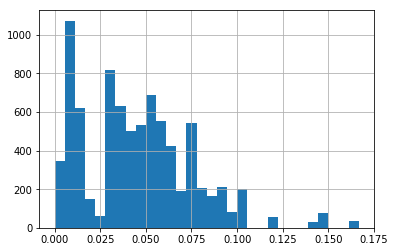

'0.0% de registros nulos'

'Variância: 0.0435791015625'

'Correlacao:'

NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM_SCHL  IN_SAIU_ESCOLA
NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM_SCHL                                        1.00           -0.01
IN_SAIU_ESCOLA                                                                   -0.01            1.00

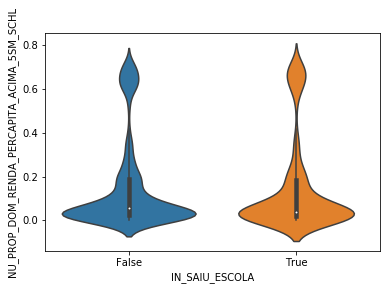

count   8187.00
mean       0.15
std        0.21
min        0.00
25%        0.02
50%        0.05
75%        0.19
max        0.71
Name: NU_PROP_DOM_RENDA_PERCAPITA_ACIMA_5SM_SCHL, dtype: float64

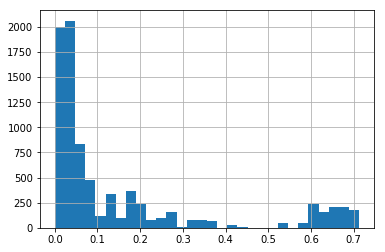

'0.0% de registros nulos'

'Variância: 0.039886474609375'

'Correlacao:'

NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM_SCHL  IN_SAIU_ESCOLA
NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM_SCHL                                       1.00            0.03
IN_SAIU_ESCOLA                                                                  0.03            1.00

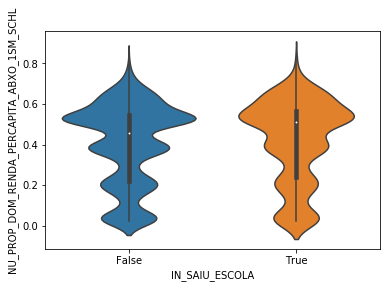

count   8187.00
mean       0.41
std        0.20
min        0.02
25%        0.22
50%        0.47
75%        0.56
max        0.82
Name: NU_PROP_DOM_RENDA_PERCAPITA_ABXO_1SM_SCHL, dtype: float64

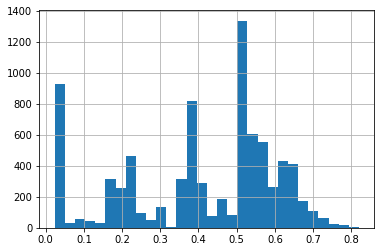

'0.0% de registros nulos'

'Variância: 0.00023663043975830078'

'Correlacao:'

...
NU_PROP_PSS_MULHERES_SCHL ...
IN_SAIU_ESCOLA            ...

[2 rows x 2 columns]

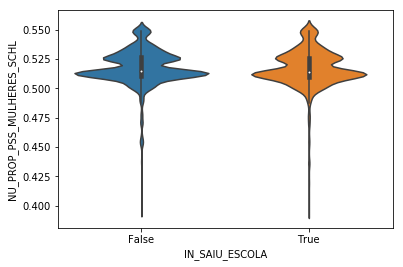

count   8187.00
mean       0.52
std        0.02
min        0.40
25%        0.51
50%        0.51
75%        0.53
max        0.55
Name: NU_PROP_PSS_MULHERES_SCHL, dtype: float64

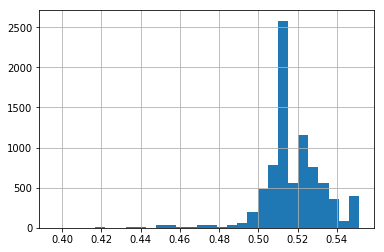

'0.0% de registros nulos'

'Variância: 0.00031065940856933594'

'Correlacao:'

...
NU_PROP_PSS_MULHERES_RSP_SCHL ...
IN_SAIU_ESCOLA                ...

[2 rows x 2 columns]

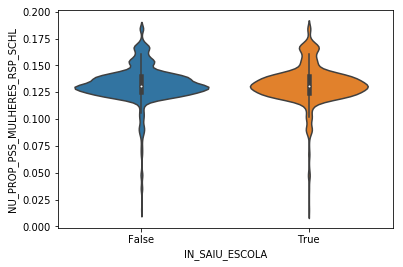

count   8187.00
mean       0.13
std        0.02
min        0.02
25%        0.13
50%        0.13
75%        0.14
max        0.18
Name: NU_PROP_PSS_MULHERES_RSP_SCHL, dtype: float64

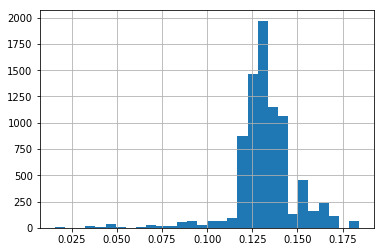

'0.0% de registros nulos'

'Variância: 0.0015544891357421875'

'Correlacao:'

...
NU_PROP_PSS_ABXO_12ANOS_SCHL ...
IN_SAIU_ESCOLA               ...

[2 rows x 2 columns]

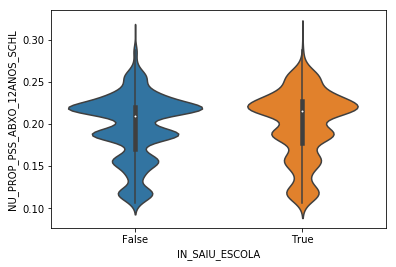

count   8187.00
mean       0.20
std        0.04
min        0.11
25%        0.17
50%        0.21
75%        0.22
max        0.30
Name: NU_PROP_PSS_ABXO_12ANOS_SCHL, dtype: float64

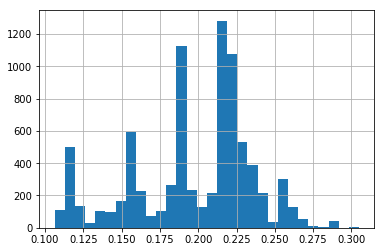

'0.0% de registros nulos'

'Variância: 0.0006628036499023438'

'Correlacao:'

...
NU_PROP_PSS_ACIMA_65ANOS_SCHL ...
IN_SAIU_ESCOLA                ...

[2 rows x 2 columns]

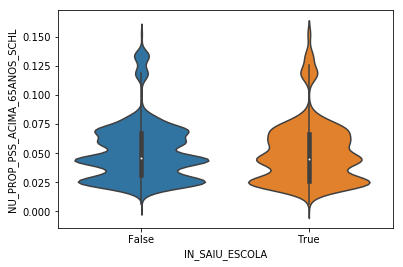

count   8187.00
mean       0.05
std        0.03
min        0.01
25%        0.03
50%        0.05
75%        0.07
max        0.15
Name: NU_PROP_PSS_ACIMA_65ANOS_SCHL, dtype: float64

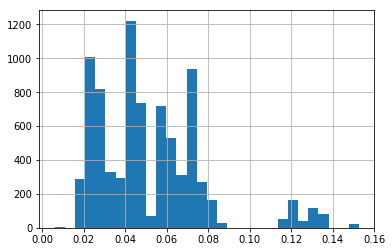

'0.0% de registros nulos'

'Variância: 6.556510925292969e-07'

'Correlacao:'

...
NU_PROP_PSS_ACIMA_90ANOS_SCHL ...
IN_SAIU_ESCOLA                ...

[2 rows x 2 columns]

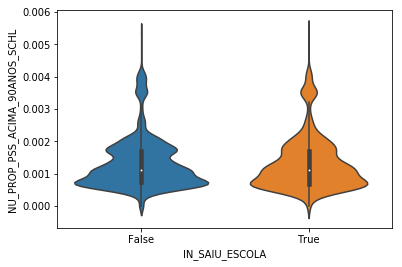

count   8187.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.01
Name: NU_PROP_PSS_ACIMA_90ANOS_SCHL, dtype: float64

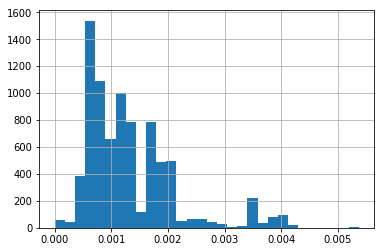

'0.0% de registros nulos'

'Variância: 203.98660139779923'

'Correlacao:'

ROTULO_ESCOLA_SCHL  IN_SAIU_ESCOLA
ROTULO_ESCOLA_SCHL                1.00            0.04
IN_SAIU_ESCOLA                    0.04            1.00

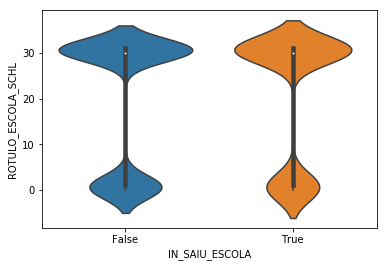

qtd   pc
31  3534 0.43
30  1815 0.22
0   1447 0.18
1    860 0.11
2    531 0.06

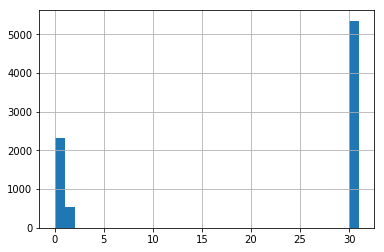

'0.0% de registros nulos'

'Variância: 0.18223921168844873'

'Correlacao:'

IN_SAIU_ESCOLA  IN_SAIU_ESCOLA
IN_SAIU_ESCOLA            1.00            1.00
IN_SAIU_ESCOLA            1.00            1.00

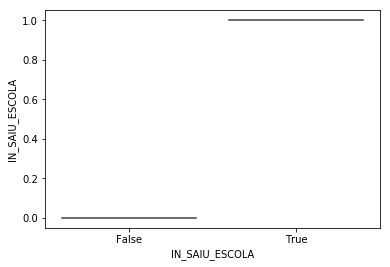

qtd   pc
False  6225 0.76
True   1962 0.24

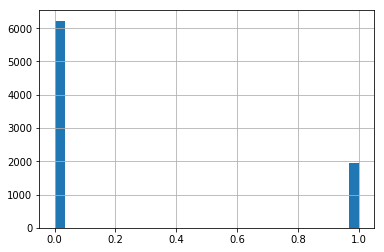

'0.0% de registros nulos'

'Variância: 0.11516371276338487'

'Correlacao:'

NU_QTD_VEZES_PROF_ESC  IN_SAIU_ESCOLA
NU_QTD_VEZES_PROF_ESC                   1.00           -0.33
IN_SAIU_ESCOLA                         -0.33            1.00

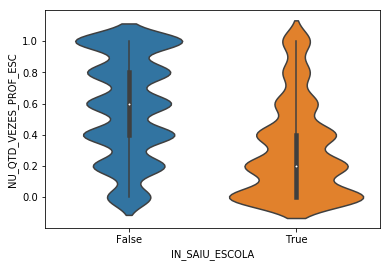

qtd   pc
0.40  1558 0.19
1.00  1517 0.19
0.20  1412 0.17
0.60  1297 0.16
0.80  1202 0.15
0.00  1201 0.15

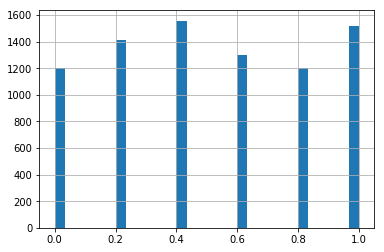

In [203]:
Visualizacao.explora_df(model_vars,var_cor=['IN_SAIU_ESCOLA'])

In [205]:
model_vars.to_csv(f'{CONST.PATH_DF_CSV}model_vars.csv')

<hr/>
    O arquivo model_vars.csv é utilizado para a EDA da questão que pretendo resolver.